In [15]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from pathlib import Path
project_root = Path.cwd().parent.parent 
print(project_root)
sys.path.append(str(project_root))


data = pandas.read_csv(f"{project_root}/data/all_leagues_combined.csv")
data.head()

/media/l1t-w1n/E/footwork/FootWork


date        season          home_team          away_team  \
0  2017-08-27 12:30:00  2017-to-2018            Chelsea            Everton   
1  2017-08-27 15:00:00  2017-to-2018          Liverpool            Arsenal   
2  2017-08-27 15:00:00  2017-to-2018  Tottenham Hotspur            Burnley   
3  2017-09-09 11:30:00  2017-to-2018    Manchester City          Liverpool   
4  2017-09-09 14:00:00  2017-to-2018            Everton  Tottenham Hotspur   

  target_result  target_home_goals  target_away_goals  home_games_played  \
0       HomeWin                  2                  0                  2   
1       HomeWin                  4                  0                  2   
2          Draw                  1                  1                  2   
3       HomeWin                  5                  0                  3   
4       AwayWin                  0                  3                  3   

   home_wins  home_draws  ...  away_avg_reds  away_cards_first_half_ratio  \
0        1.0         0.0  ...            0.5                     0.400000   
1        1.0         1.0  ...            0.0                     0.000000   
2        1.0         0.0  ...            0.0                     0.000000   
3        2.0         1.0  ...            0.0                     0.500000   
4        1.0         1.0  ...            0.0                     0.333333   

   away_venue_games  away_venue_win_ratio  away_venue_goals_avg  \
0                 1                   0.0                   1.0   
1                 1                   0.0                   0.0   
2                 1                   1.0                   3.0   
3                 1                   0.0                   3.0   
4                 1                   1.0                   2.0   

   away_venue_conceded_avg  away_clean_sheets_ratio  away_scoring_ratio  \
0                      1.0                 0.500000                 1.0   
1                      1.0                 0.000000                 0.5   
2                      2.0                 0.000000                 0.5   
3                      3.0                 0.666667                 1.0   
4                      0.0                 0.333333                 1.0   

   away_comeback_ratio  away_lead_loss_ratio  
0                  0.0                   0.0  
1                  0.0                   0.0  
2                  0.0                   0.0  
3                  0.0                   0.0  
4                  0.0                   0.0  

[5 rows x 75 columns]

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

def create_feature_groups(columns: List[str]) -> dict:
    """
    Organizes features into logical groups for more structured analysis.
    Each group represents a different aspect of football matches.
    """
    groups = {
        # Basic match information
        'match_info': ['date', 'season', 'home_team', 'away_team'],
        
        # Actual match outcomes
        'target_variables': ['target_result', 'target_home_goals', 'target_away_goals'],
        
        # Team performance indicators
        'performance_metrics': [col for col in columns if any(x in col for x in ['wins', 'draws', 'losses', 'points', 'games_played'])],
        
        # Goal-related statistics
        'goal_stats': [col for col in columns if 'goals' in col and 'target' not in col],
        
        # Shooting statistics
        'shot_stats': [col for col in columns if 'shot' in col],
        
        # Ball possession metrics
        'possession_stats': [col for col in columns if 'possession' in col],
        
        # Set piece statistics
        'set_pieces': [col for col in columns if 'corner' in col],
        
        # Disciplinary records
        'disciplinary': [col for col in columns if any(x in col for x in ['foul', 'yellow', 'red', 'card'])],
        
        # Venue-specific performance
        'venue_specific': [col for col in columns if 'venue' in col],
        
        # Form and efficiency indicators
        'form_indicators': [col for col in columns if any(x in col for x in ['ratio', 'recent', 'efficiency'])]
    }
    return groups

def plot_categorical_distribution(data: pd.DataFrame, column: str, title_prefix: str = "Distribution of"):
    """
    Creates a bar plot for categorical variables with improved readability.
    """
    plt.figure(figsize=(12, 6))
    
    # Create the bar plot
    ax = sns.countplot(data=data, x=column)
    
    # Improve the appearance
    plt.title(f"{title_prefix} {column.replace('_', ' ').title()}", pad=20)
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on top of each bar
    for i in ax.containers:
        ax.bar_label(i, padding=3)
    
    plt.tight_layout()
    plt.show()

def plot_numerical_distribution(data: pd.DataFrame, column: str, title_prefix: str = "Distribution of"):
    """
    Creates both histogram and boxplot for numerical variables with statistical annotations.
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5))
    
    # Histogram with KDE
    sns.histplot(data=data[column], ax=ax1, kde=True)
    ax1.set_title(f"{title_prefix} {column.replace('_', ' ').title()}")
    
    # Add statistical annotations
    stats_text = f'Mean: {data[column].mean():.2f}\n'
    stats_text += f'Median: {data[column].median():.2f}\n'
    stats_text += f'Std: {data[column].std():.2f}'
    ax1.text(0.95, 0.95, stats_text,
             transform=ax1.transAxes,
             verticalalignment='top',
             horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Boxplot
    sns.boxplot(data=data[column], ax=ax2)
    ax2.set_title(f"Boxplot of {column.replace('_', ' ').title()}")
    
    plt.tight_layout()
    plt.show()

def plot_group_distributions(data: pd.DataFrame, group_name: str, columns: List[str]):
    """
    Plots distributions for all columns in a group with progress tracking.
    """
    print(f"\n=== Analyzing {group_name.replace('_', ' ').title()} ===")
    print(f"Number of features in this group: {len(columns)}")
    
    for i, col in enumerate(columns, 1):
        print(f"Processing feature {i}/{len(columns)}: {col}")
        
        if data[col].dtype in ['int64', 'float64']:
            plot_numerical_distribution(data, col)
        else:
            plot_categorical_distribution(data, col)
        
        plt.close()  # Free up memory

def analyze_dataset(data: pd.DataFrame):
    """
    Main analysis function that processes the entire dataset and provides insights.
    """
    # Basic dataset information
    print("Dataset Overview:")
    print(f"Total number of matches: {len(data)}")
    print(f"Time period: {data['date'].min()} to {data['date'].max()}")
    print(f"Number of features: {len(data.columns)}")
    
    # Create and analyze feature groups
    groups = create_feature_groups(data.columns)
    
    # Process each group
    for group_name, columns in groups.items():
        plot_group_distributions(data, group_name, columns)
    
    # Display summary statistics for numerical columns
    print("\n=== Summary Statistics for Numerical Features ===")
    print(data.select_dtypes(include=['int64', 'float64']).describe())

# To use the functions, simply run:
# analyze_dataset(data)

Dataset Overview:
Total number of matches: 9224
Time period: 2010-08-14 17:00:00 to 2024-05-19 19:00:00
Number of features: 75

=== Analyzing Match Info ===
Number of features in this group: 4
Processing feature 1/4: date


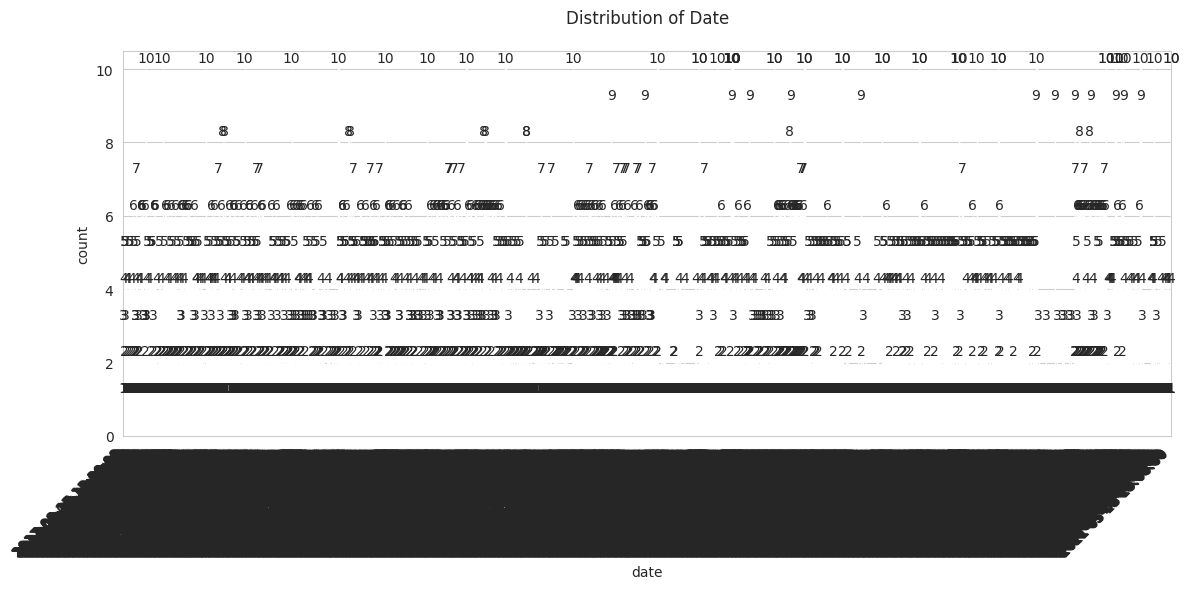

Processing feature 2/4: season


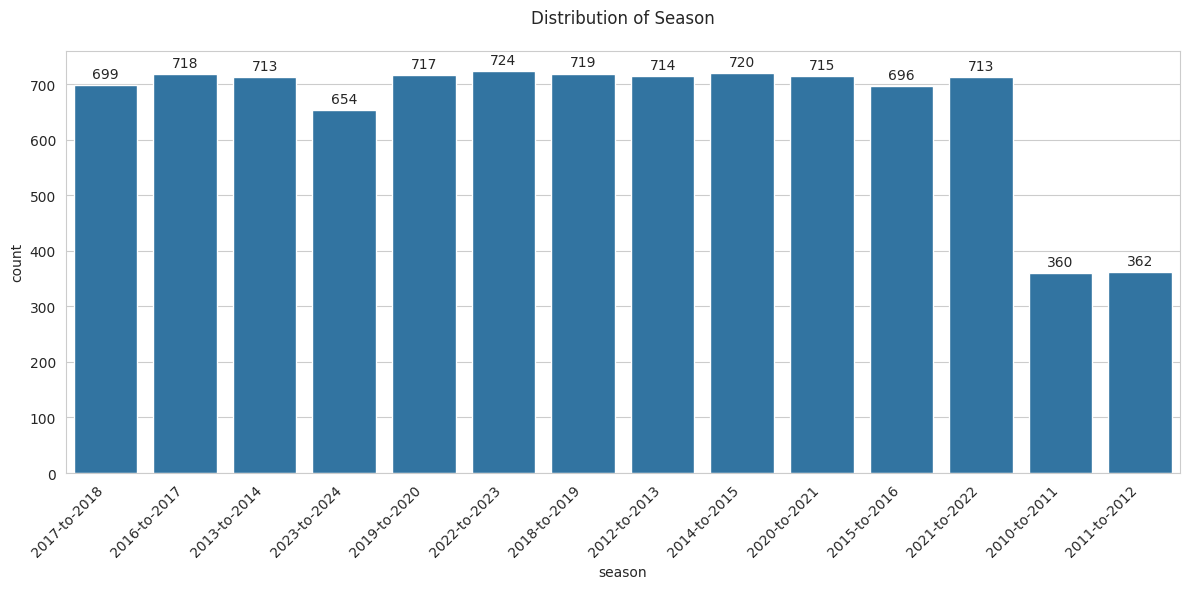

Processing feature 3/4: home_team


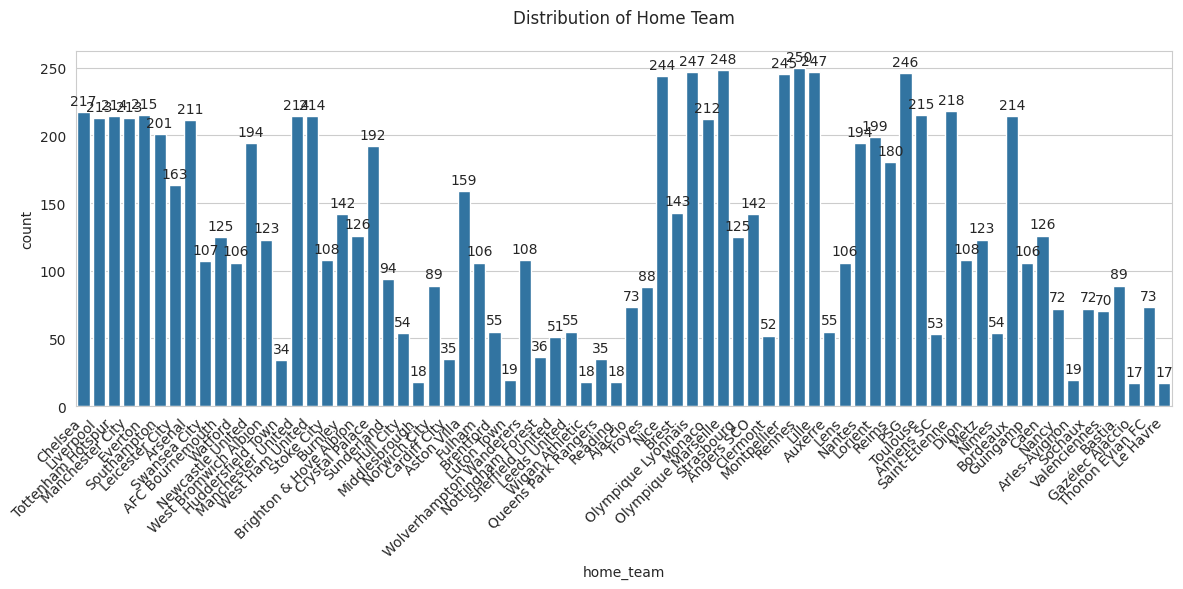

Processing feature 4/4: away_team


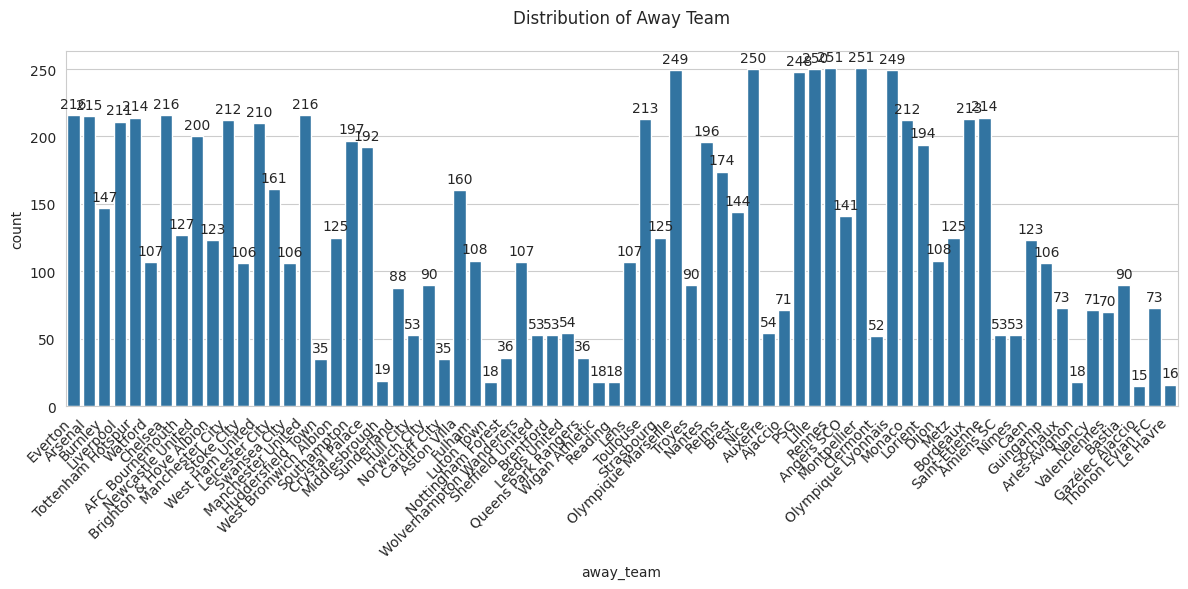


=== Analyzing Target Variables ===
Number of features in this group: 3
Processing feature 1/3: target_result


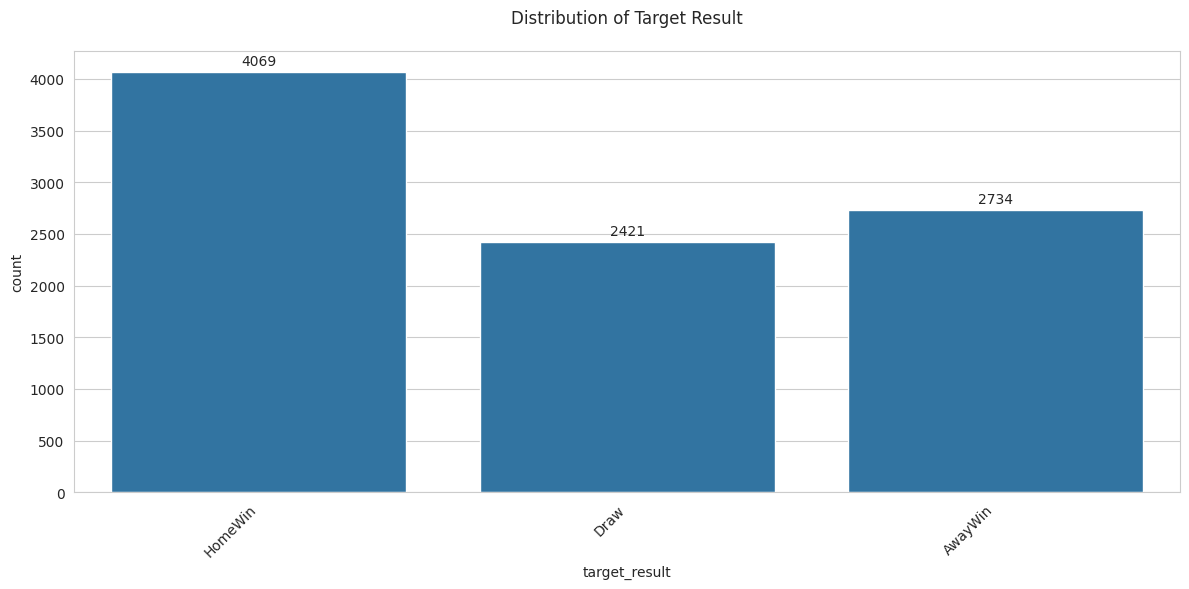

Processing feature 2/3: target_home_goals


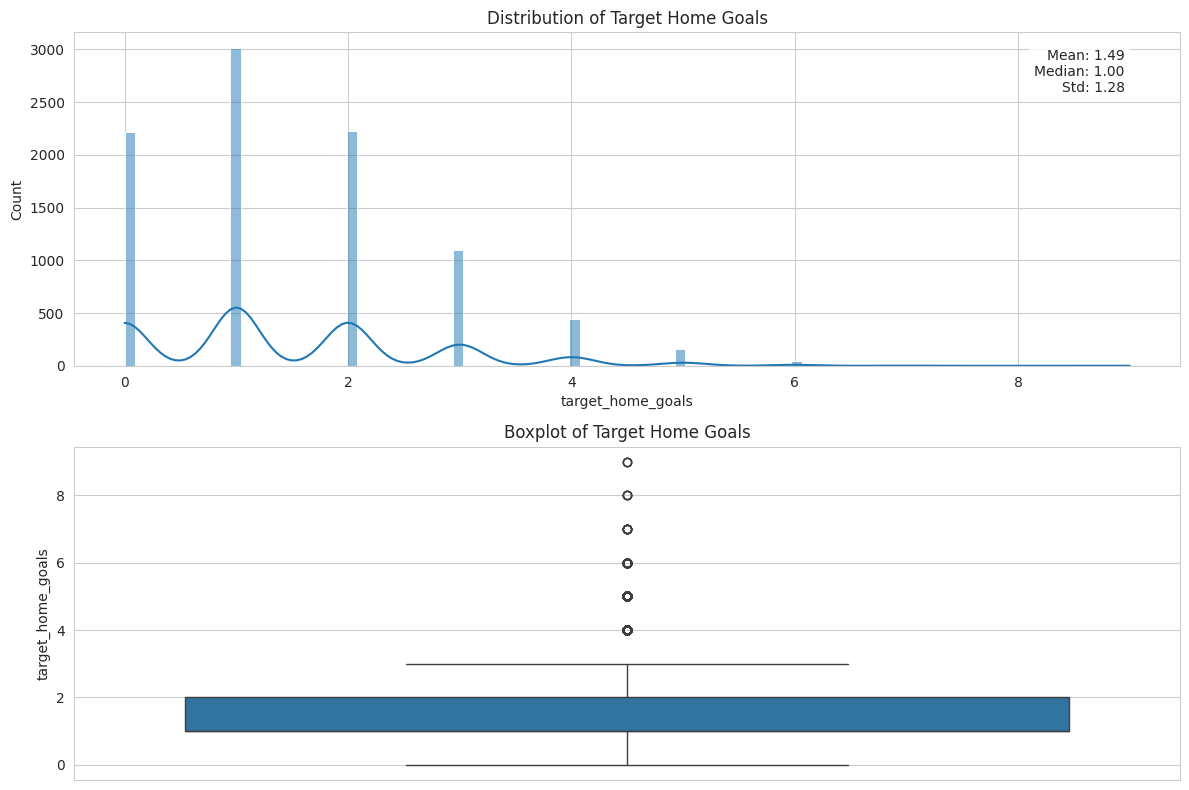

Processing feature 3/3: target_away_goals


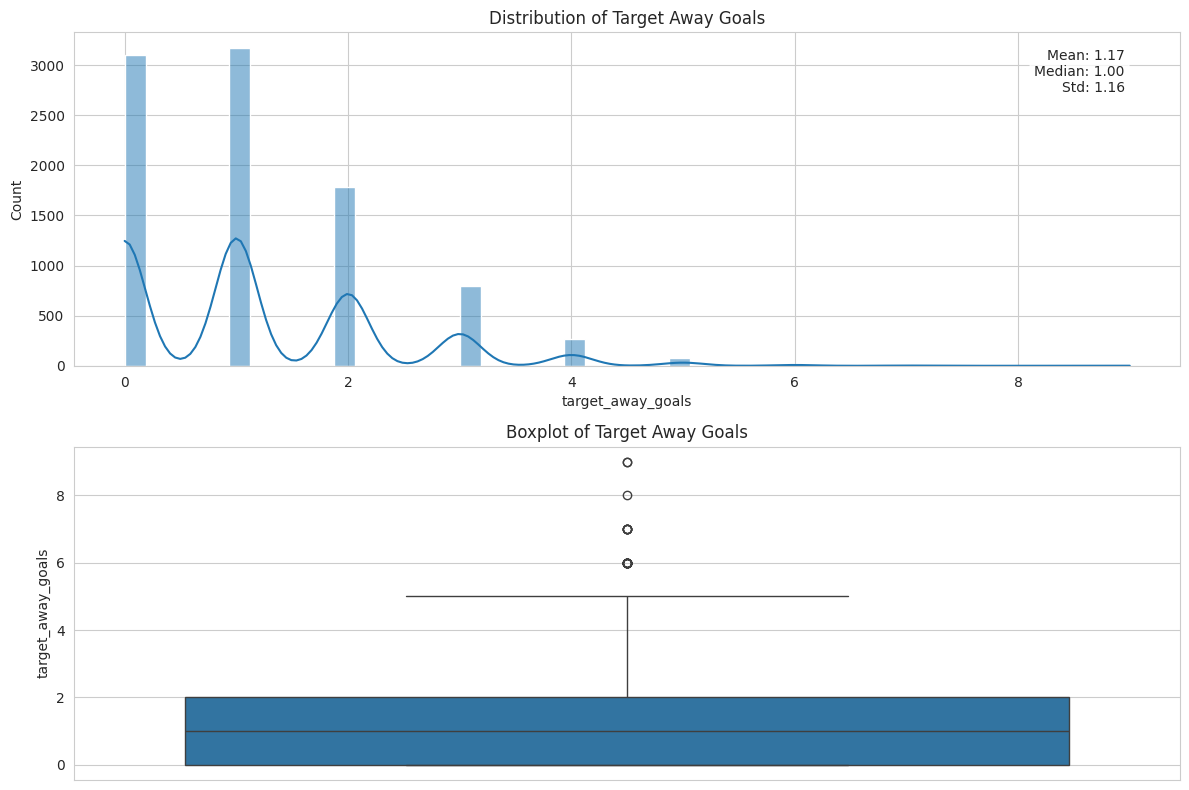


=== Analyzing Performance Metrics ===
Number of features in this group: 12
Processing feature 1/12: home_games_played


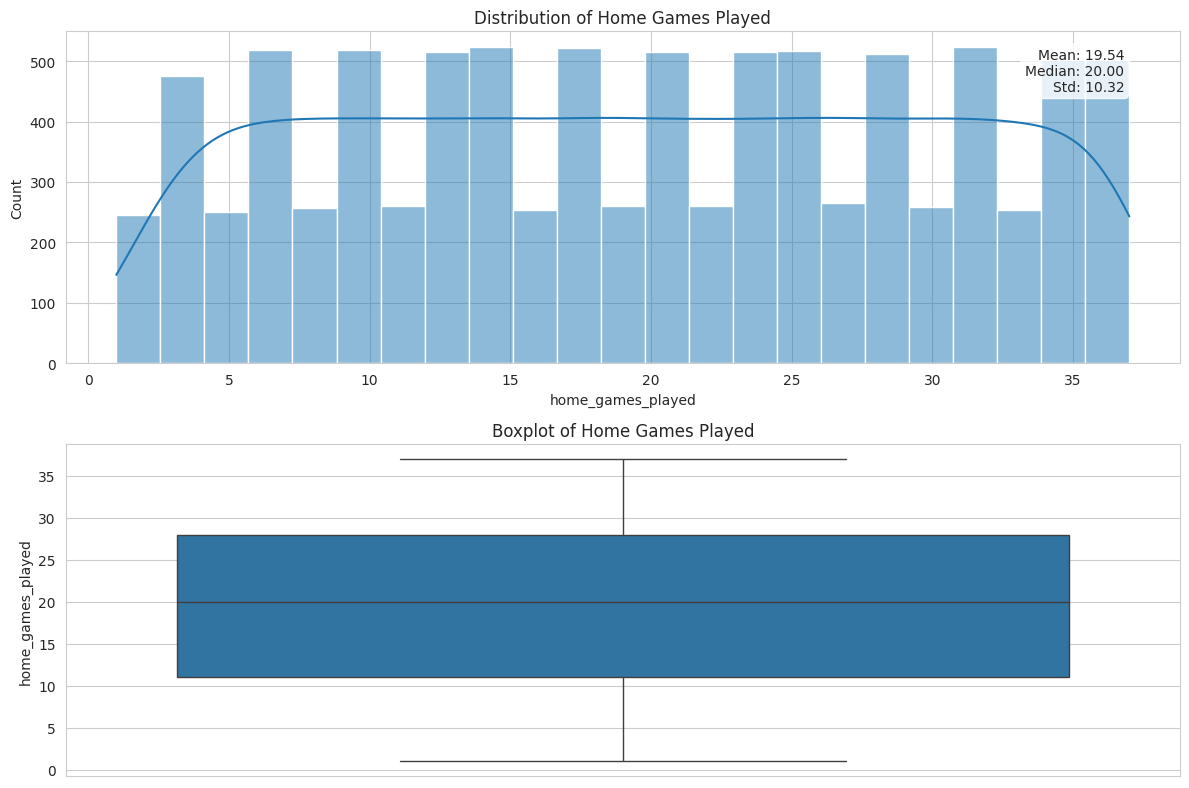

Processing feature 2/12: home_wins


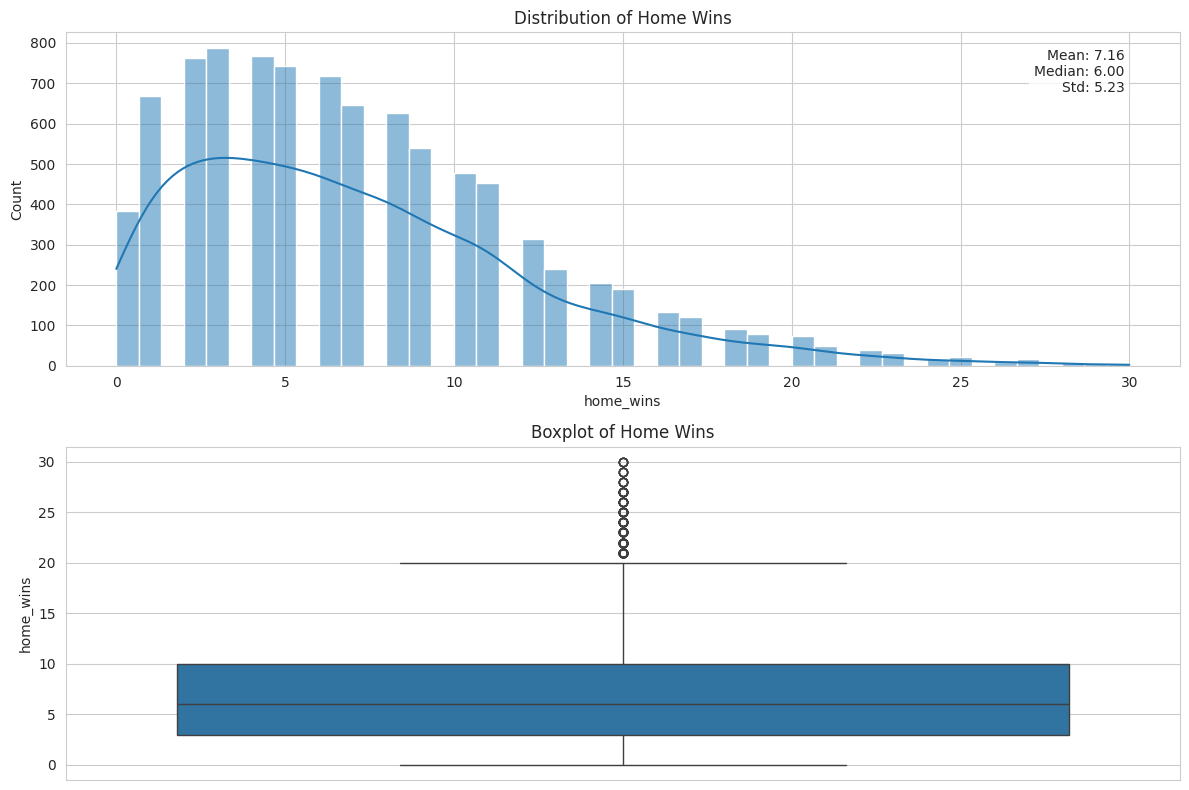

Processing feature 3/12: home_draws


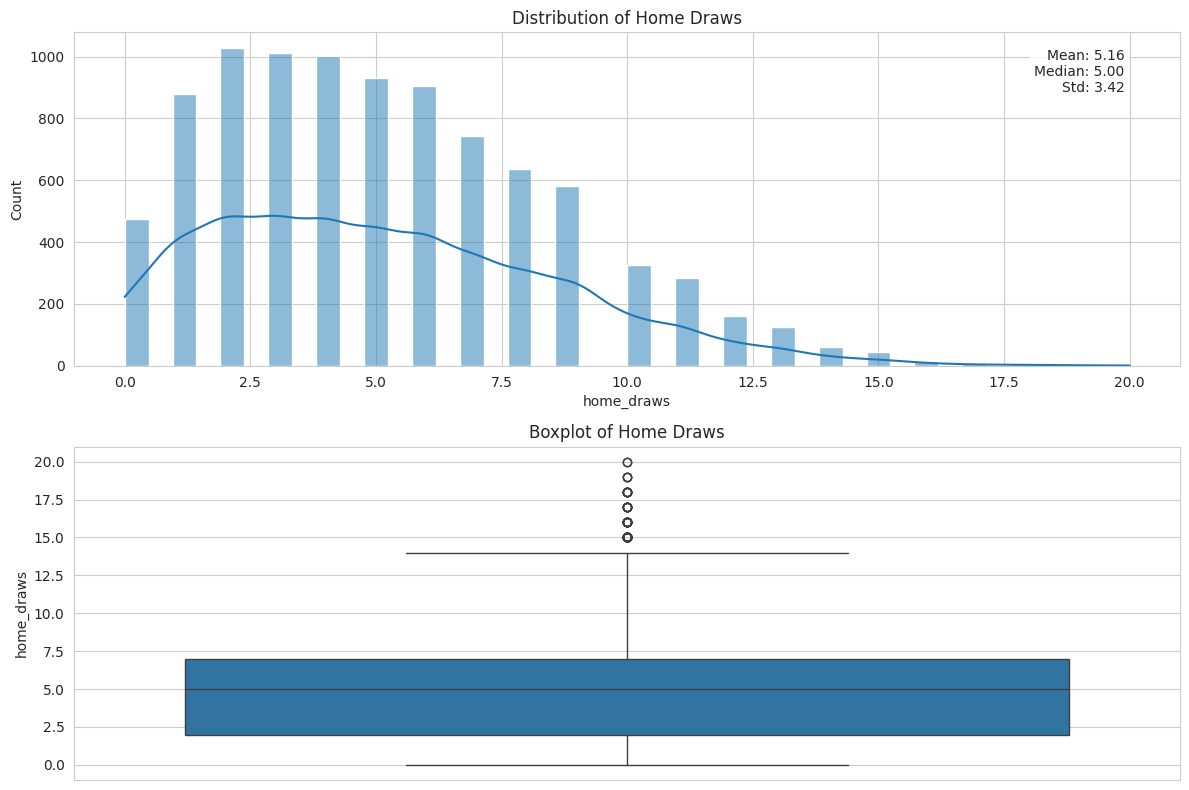

Processing feature 4/12: home_losses


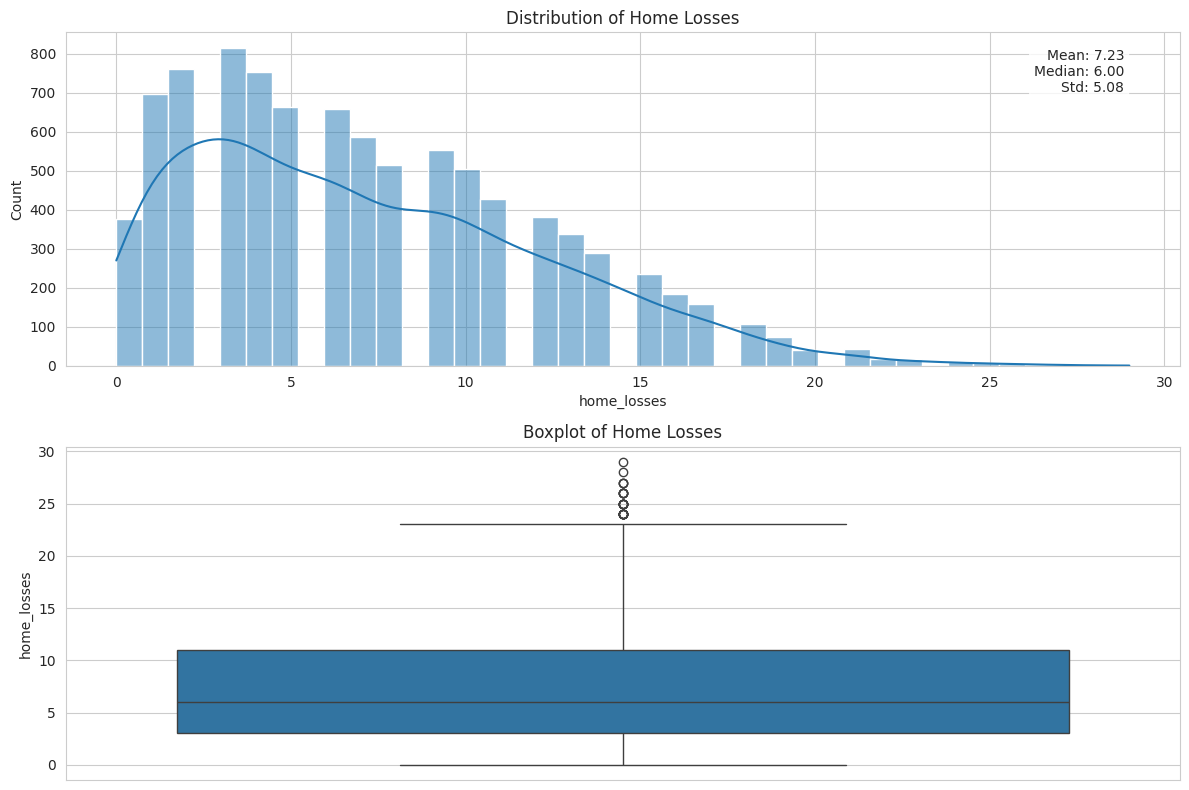

Processing feature 5/12: home_points_per_game


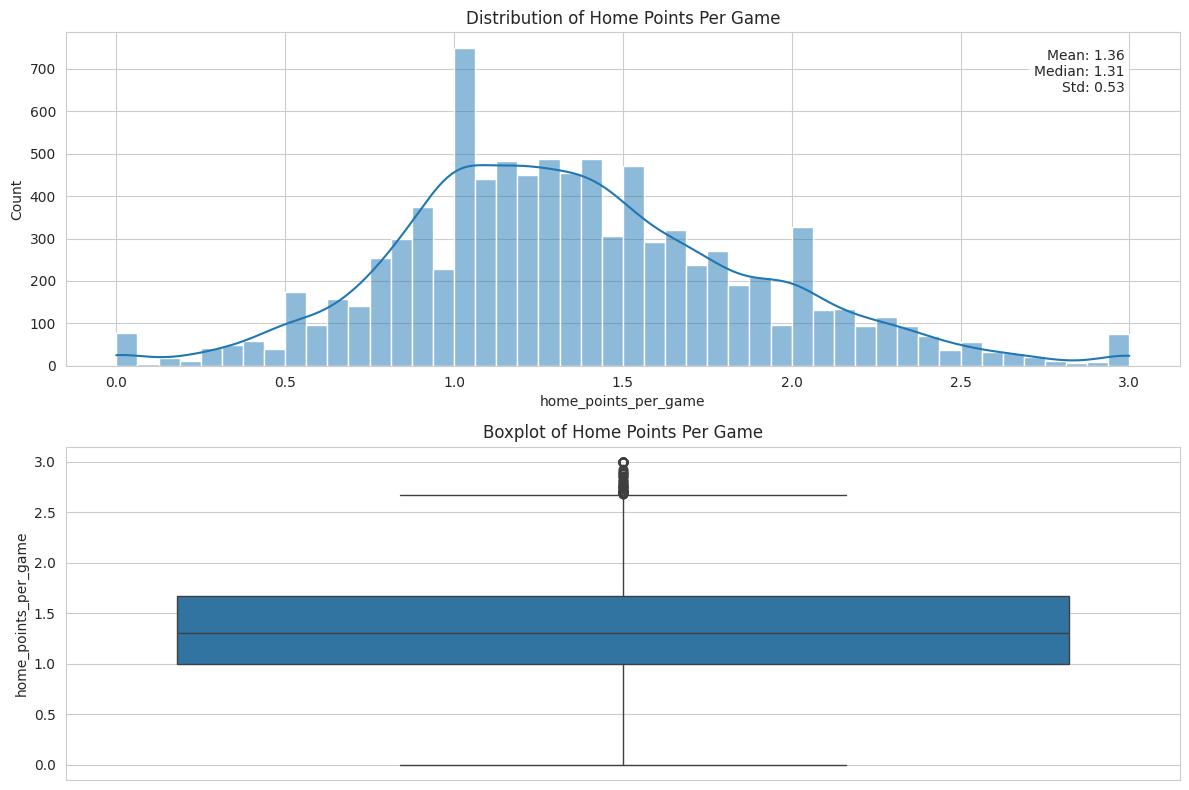

Processing feature 6/12: home_recent_points_per_game


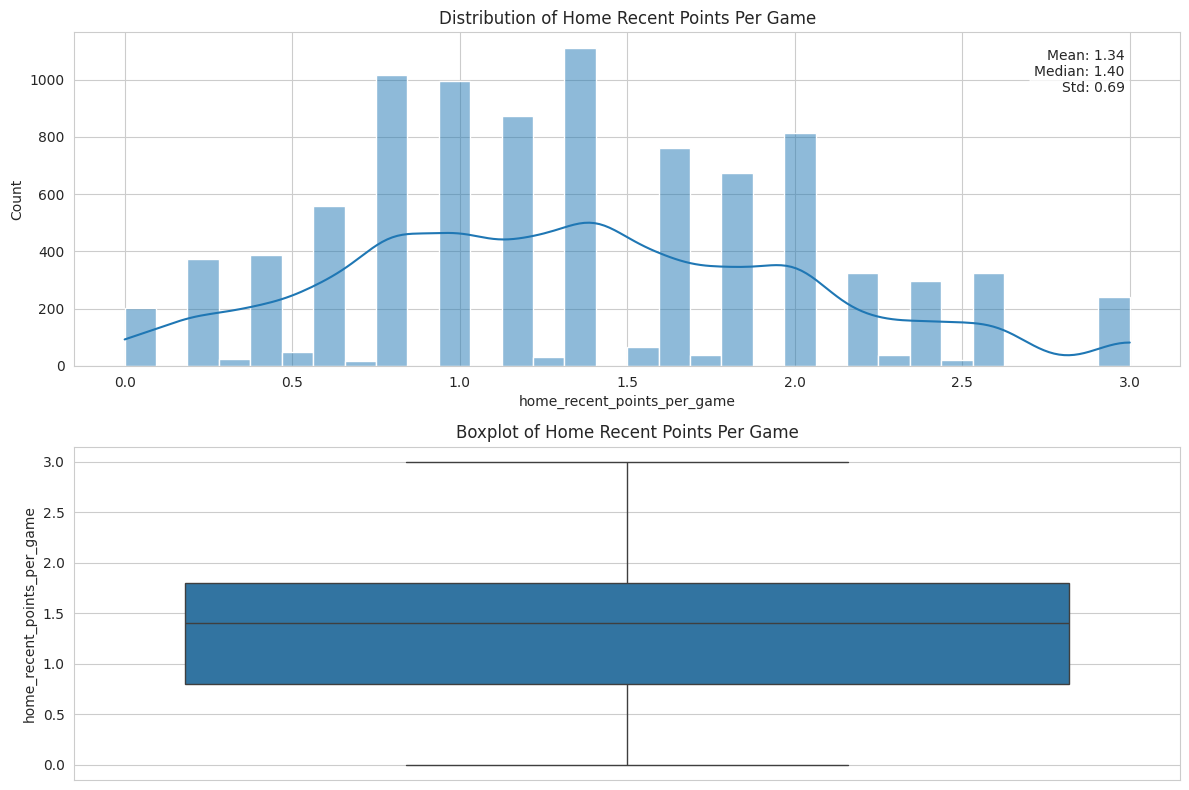

Processing feature 7/12: away_games_played


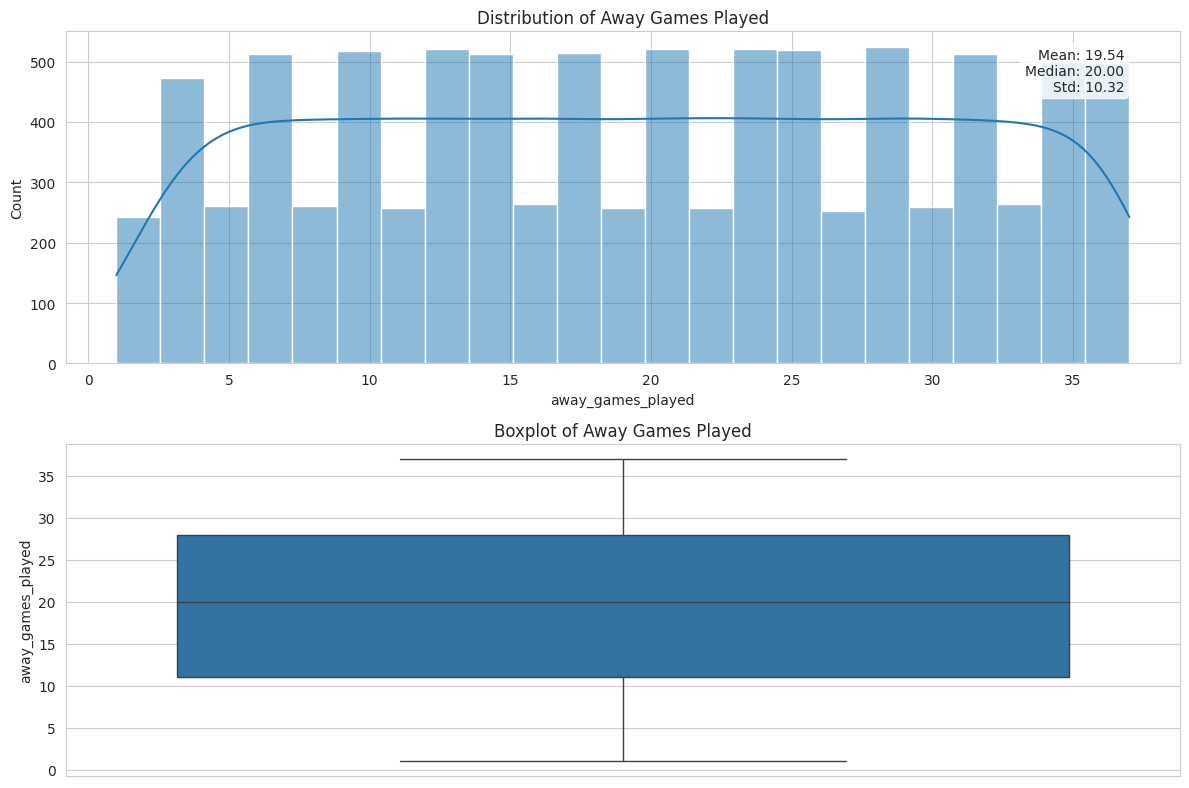

Processing feature 8/12: away_wins


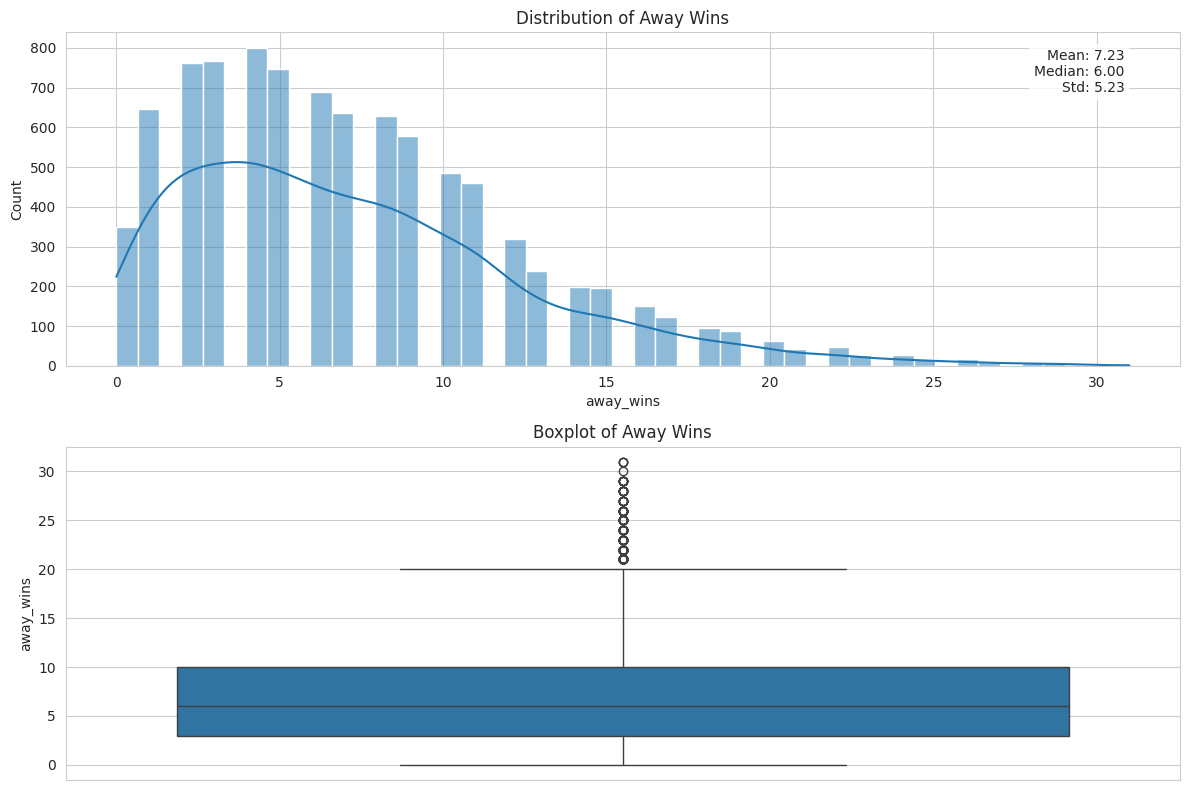

Processing feature 9/12: away_draws


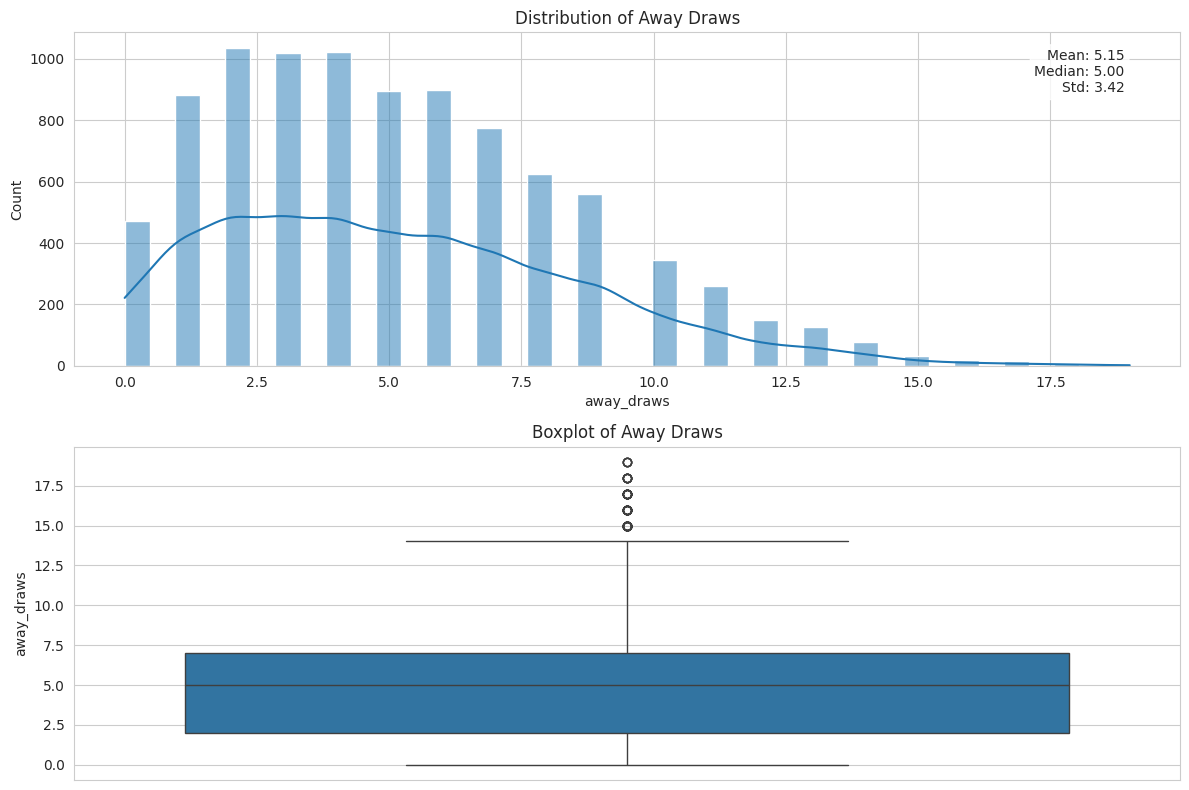

Processing feature 10/12: away_losses


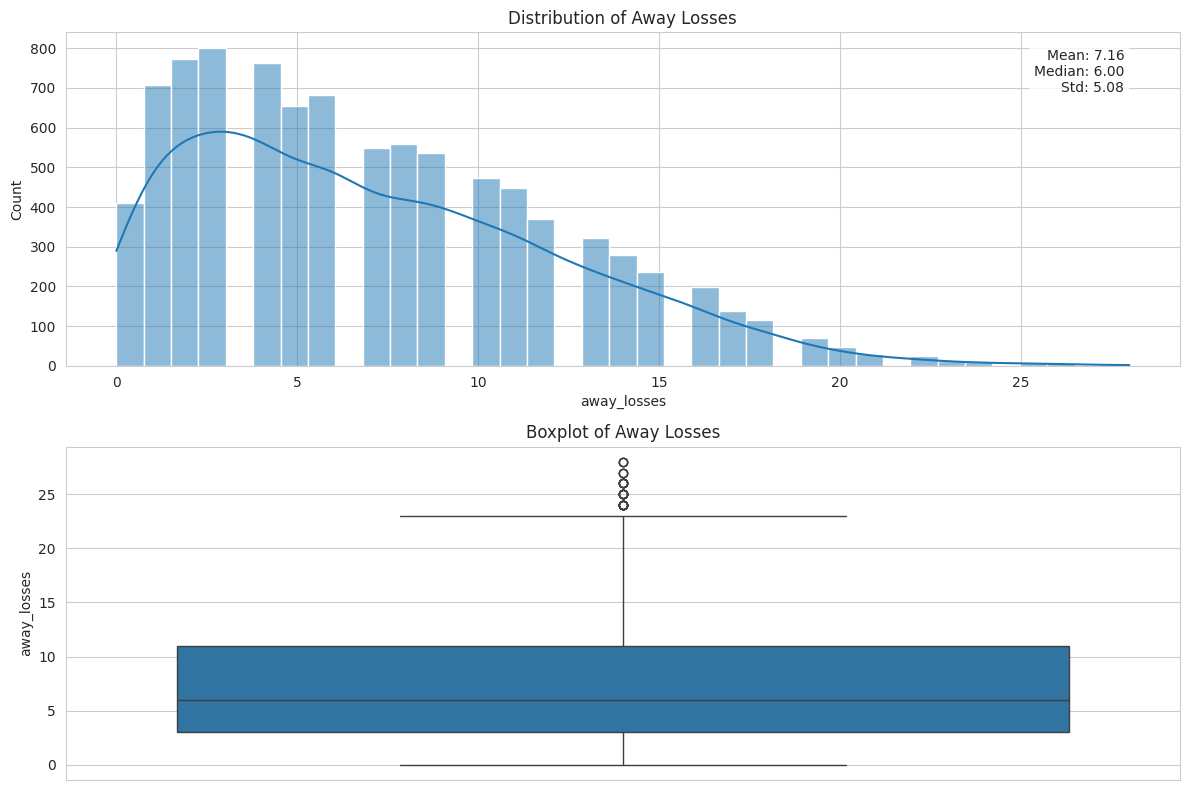

Processing feature 11/12: away_points_per_game


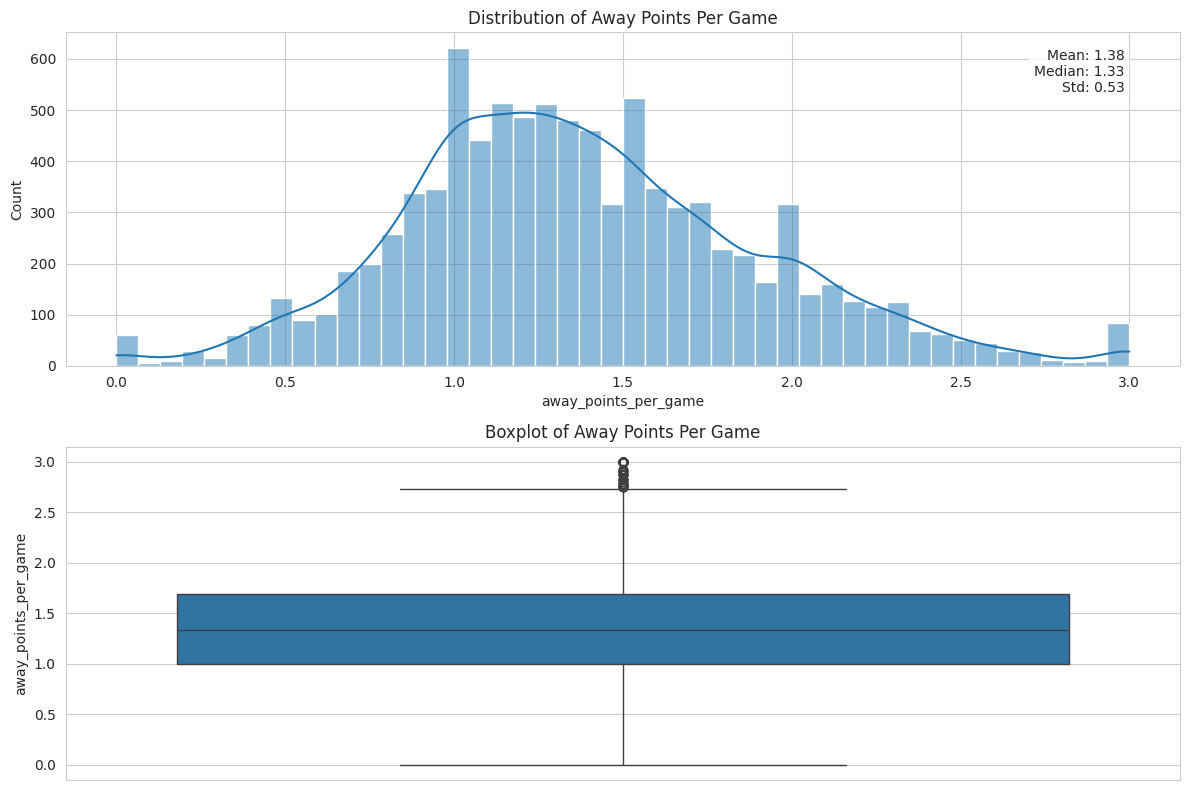

Processing feature 12/12: away_recent_points_per_game


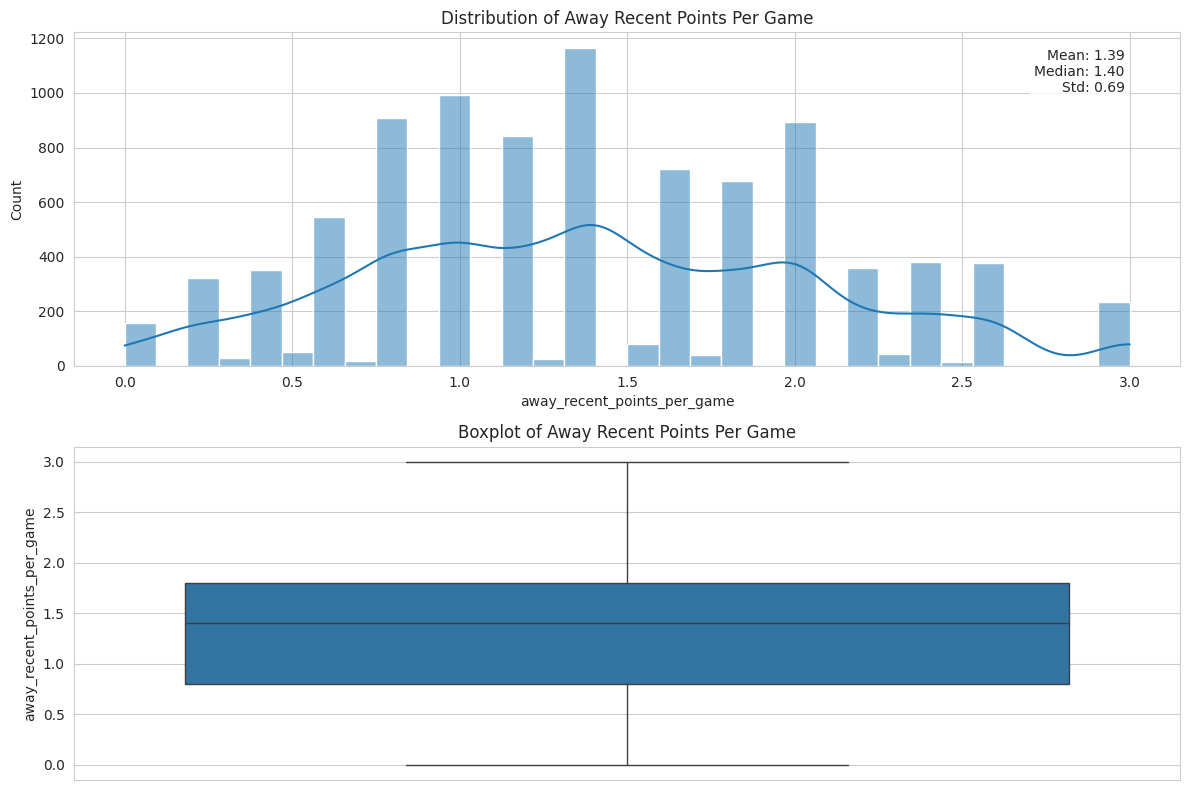


=== Analyzing Goal Stats ===
Number of features in this group: 14
Processing feature 1/14: home_avg_goals_scored


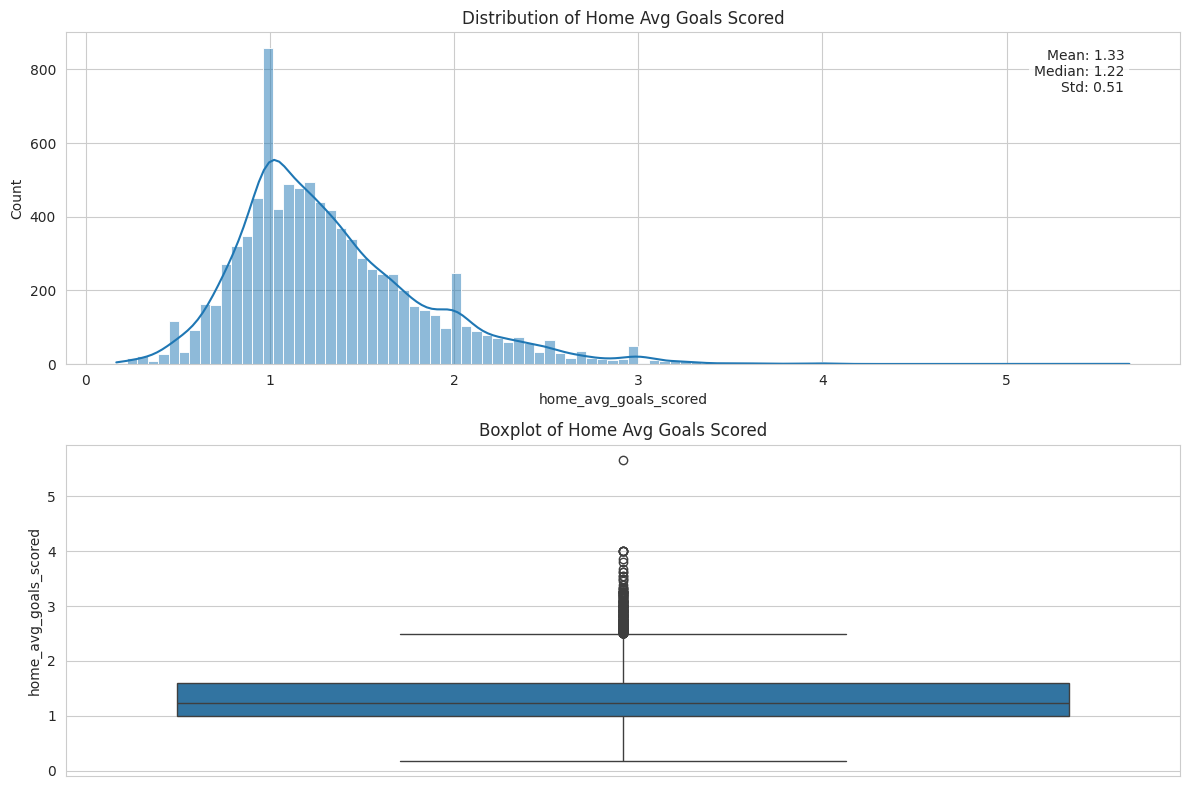

Processing feature 2/14: home_avg_goals_conceded


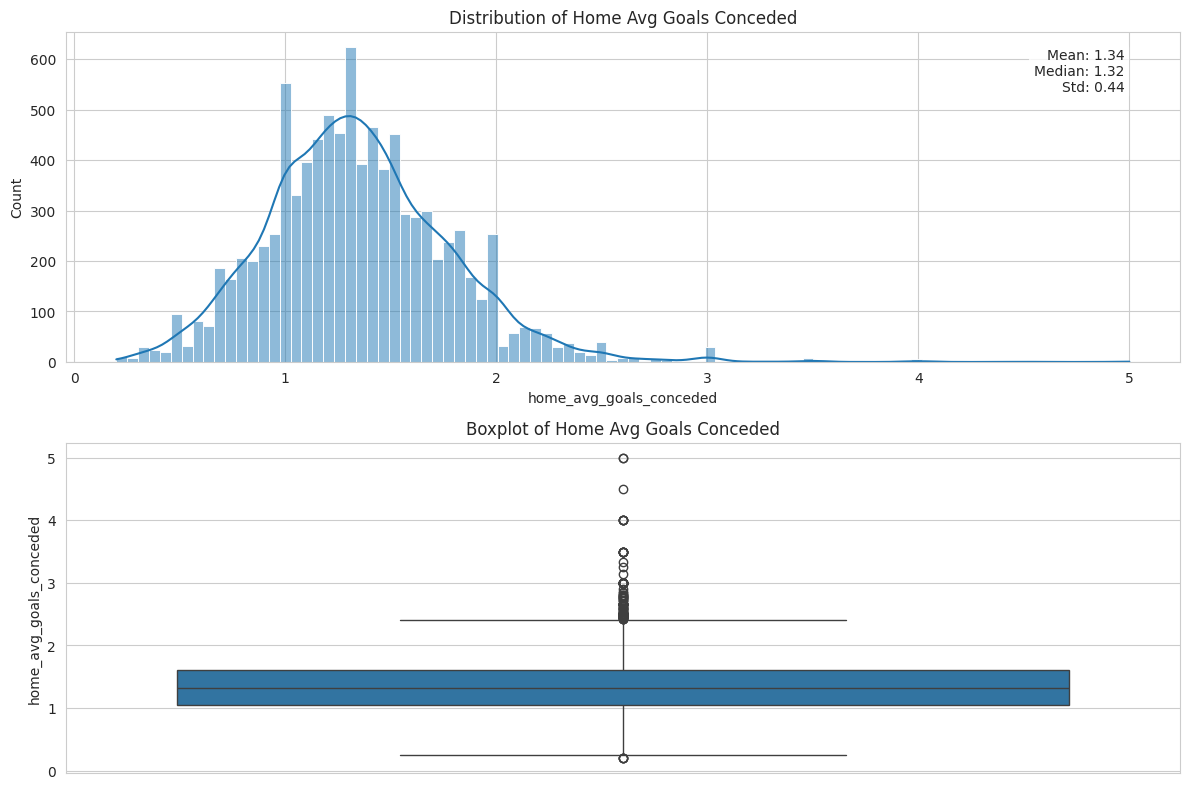

Processing feature 3/14: home_goals_scored_first_half_ratio


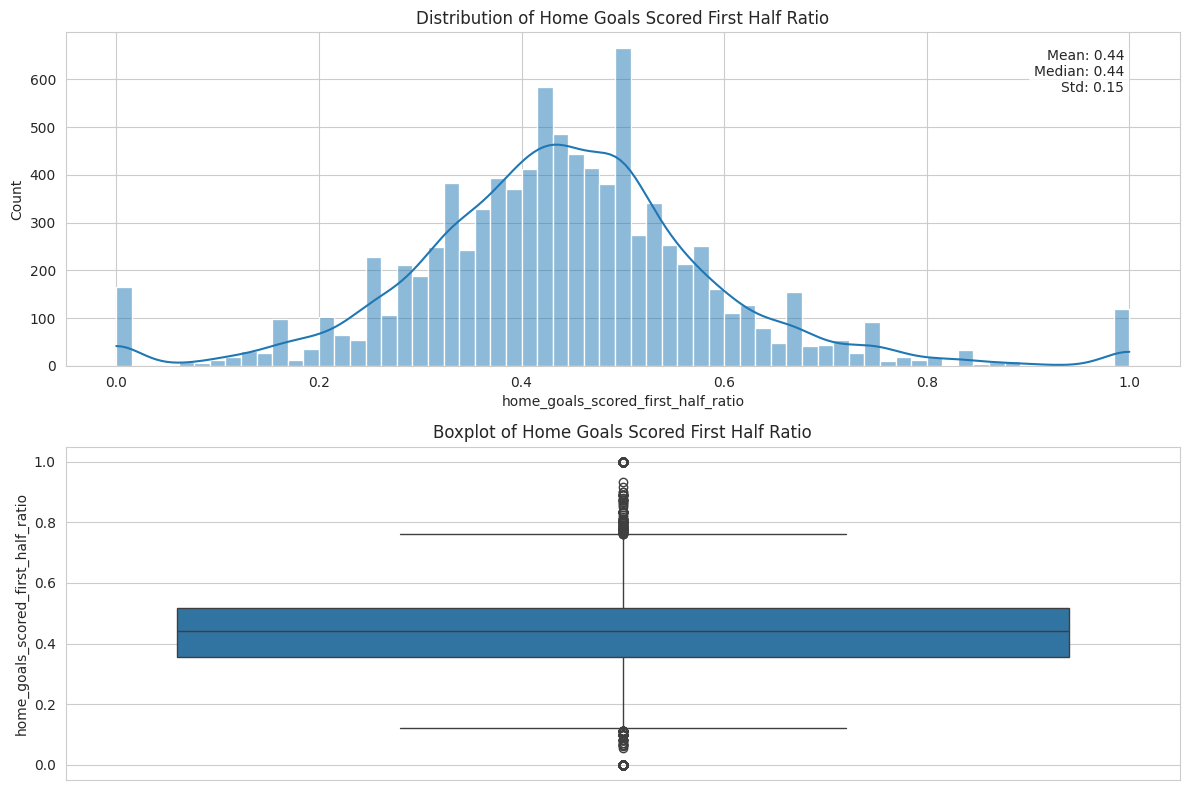

Processing feature 4/14: home_goals_conceded_first_half_ratio


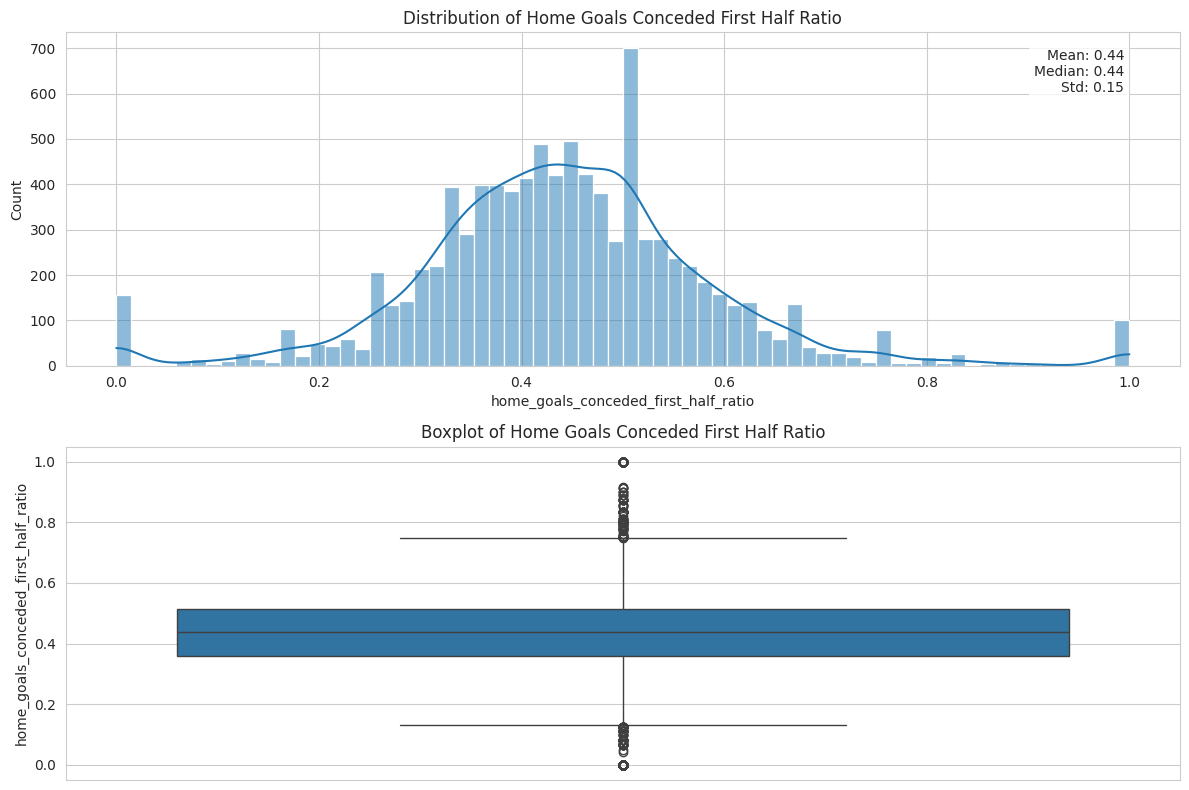

Processing feature 5/14: home_recent_goals_scored


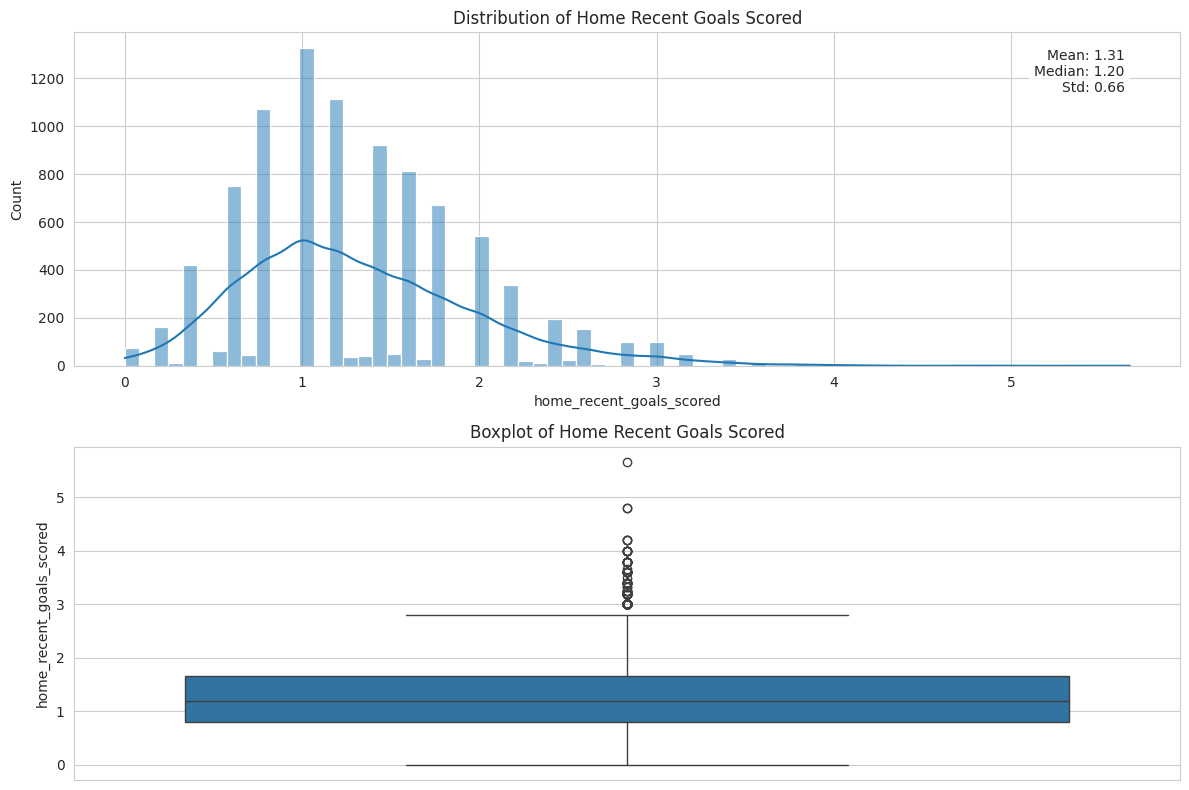

Processing feature 6/14: home_recent_goals_conceded


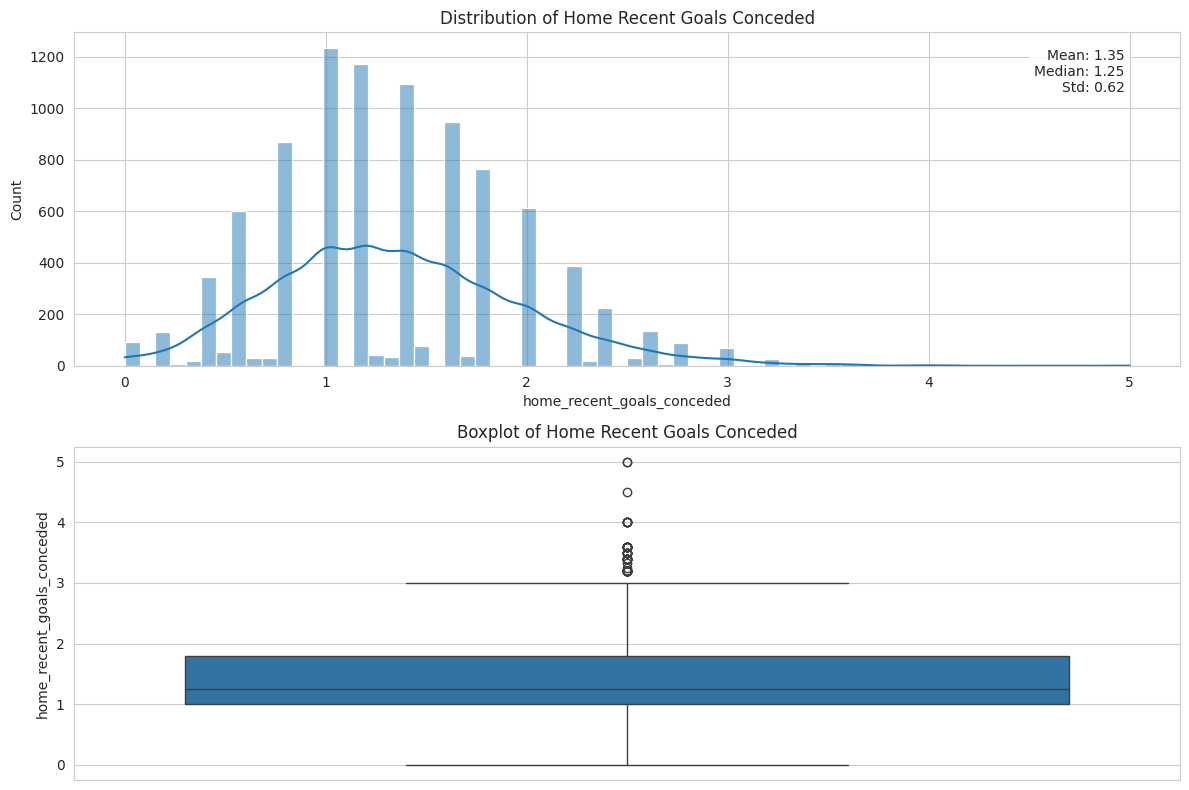

Processing feature 7/14: home_venue_goals_avg


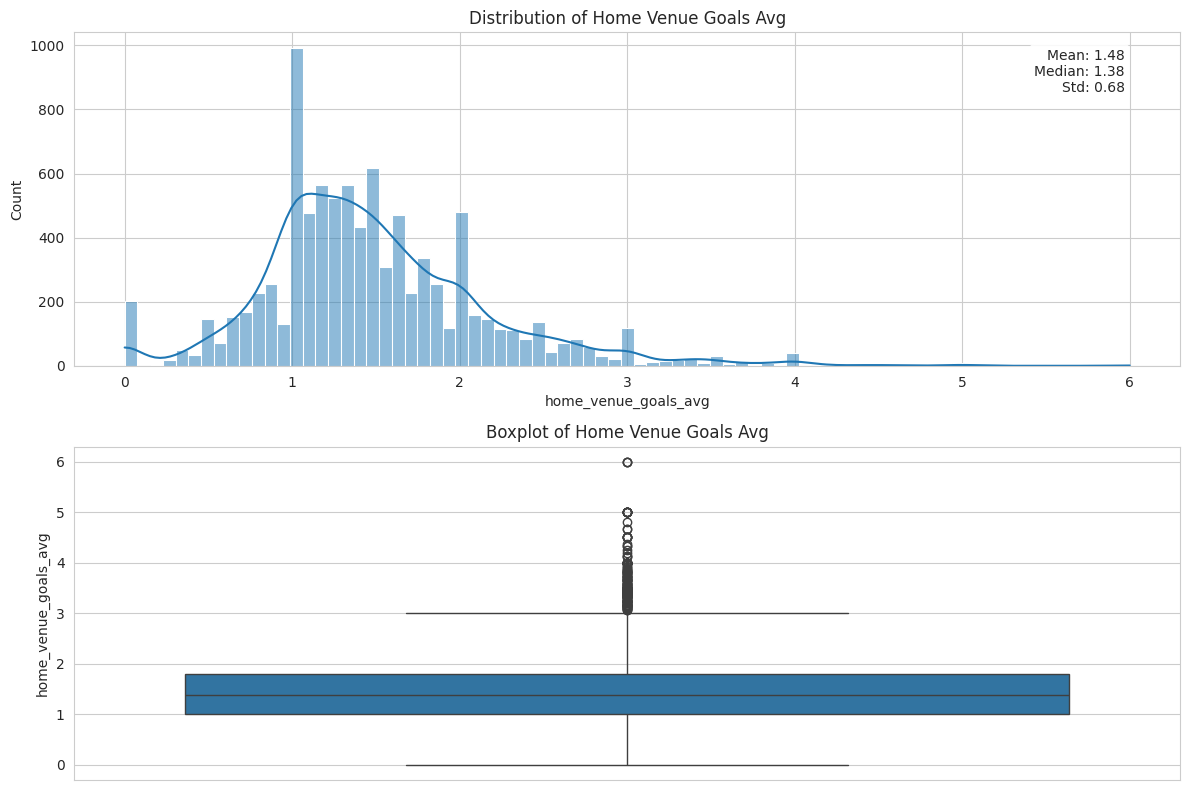

Processing feature 8/14: away_avg_goals_scored


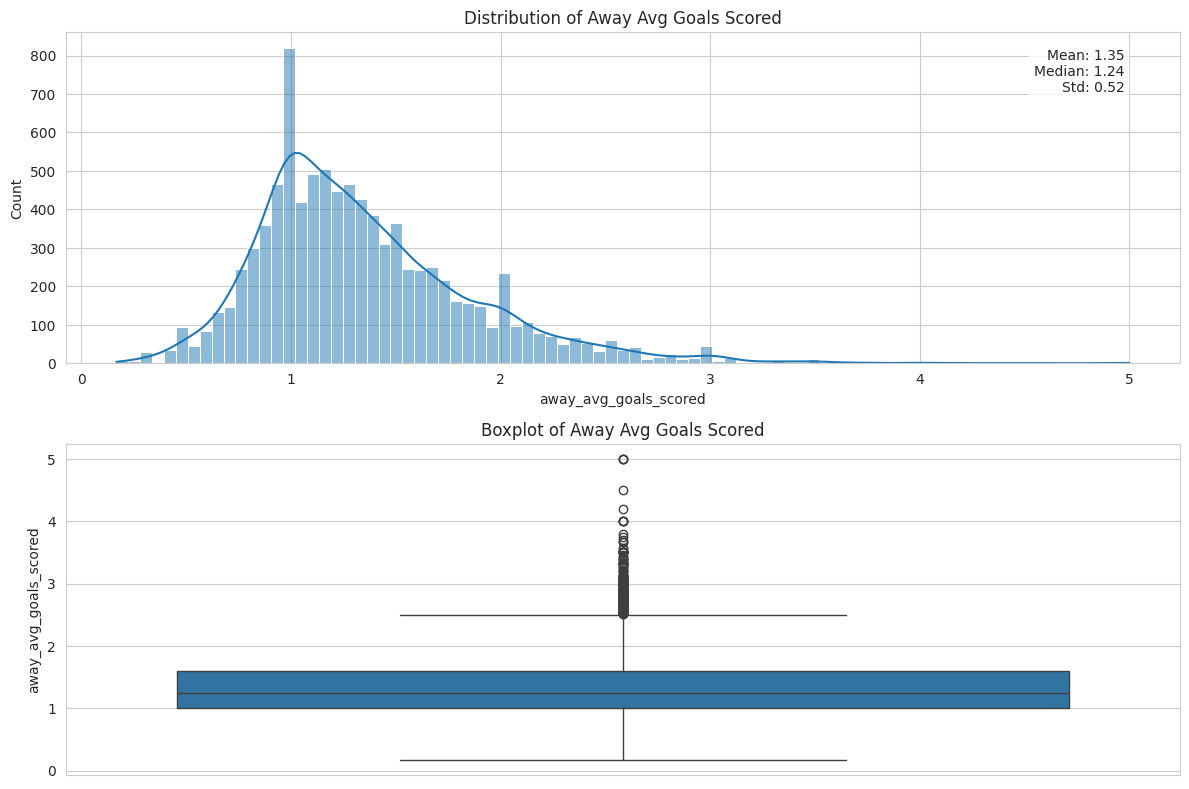

Processing feature 9/14: away_avg_goals_conceded


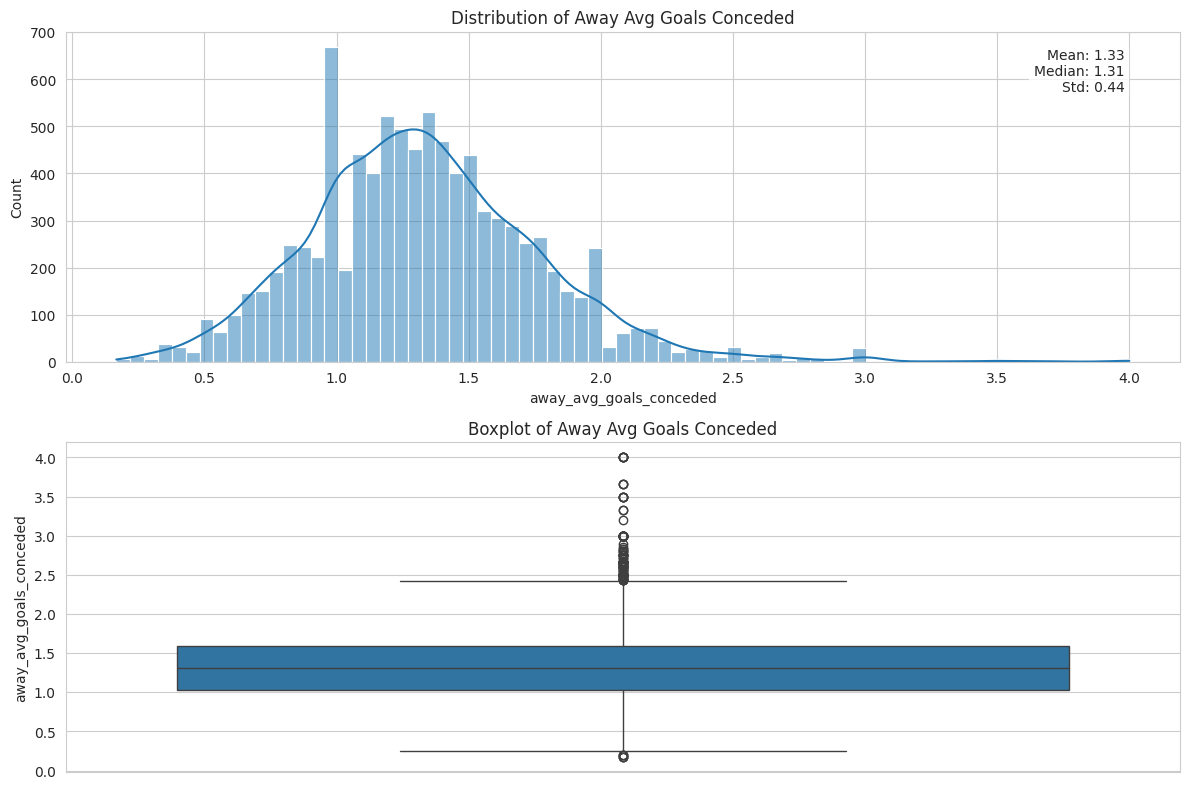

Processing feature 10/14: away_goals_scored_first_half_ratio


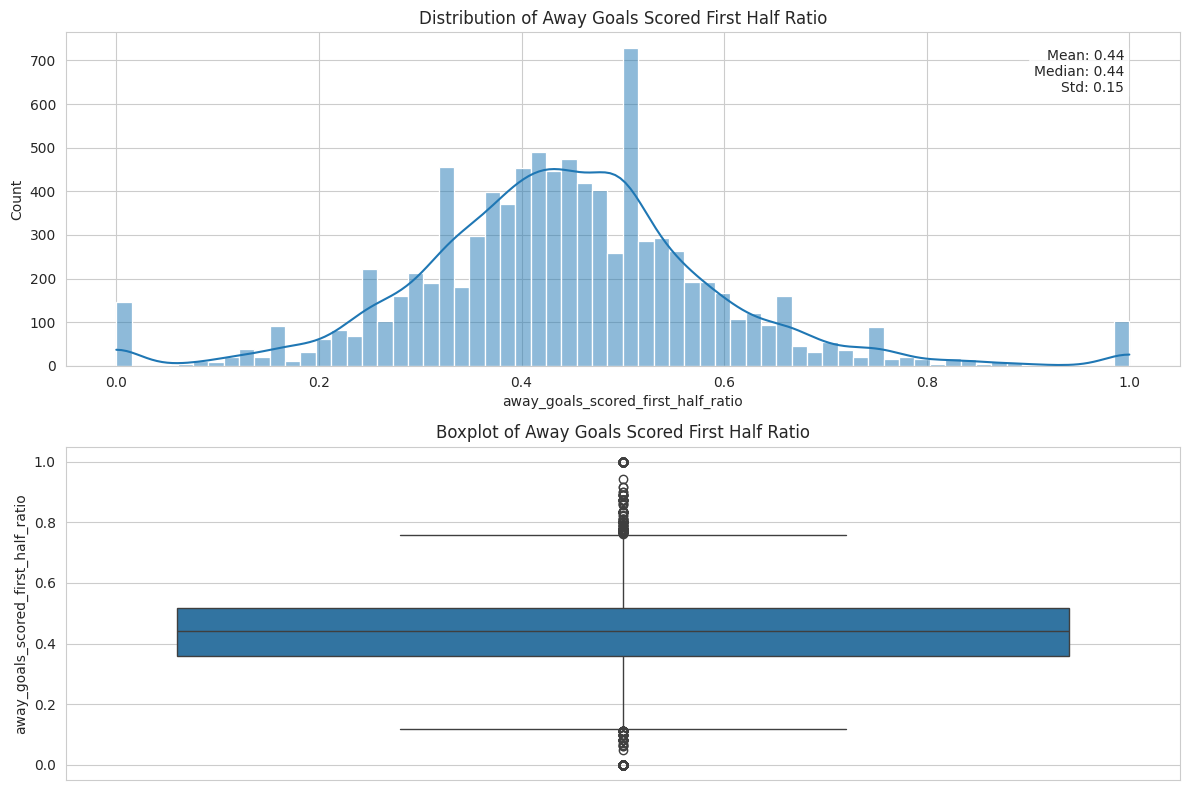

Processing feature 11/14: away_goals_conceded_first_half_ratio


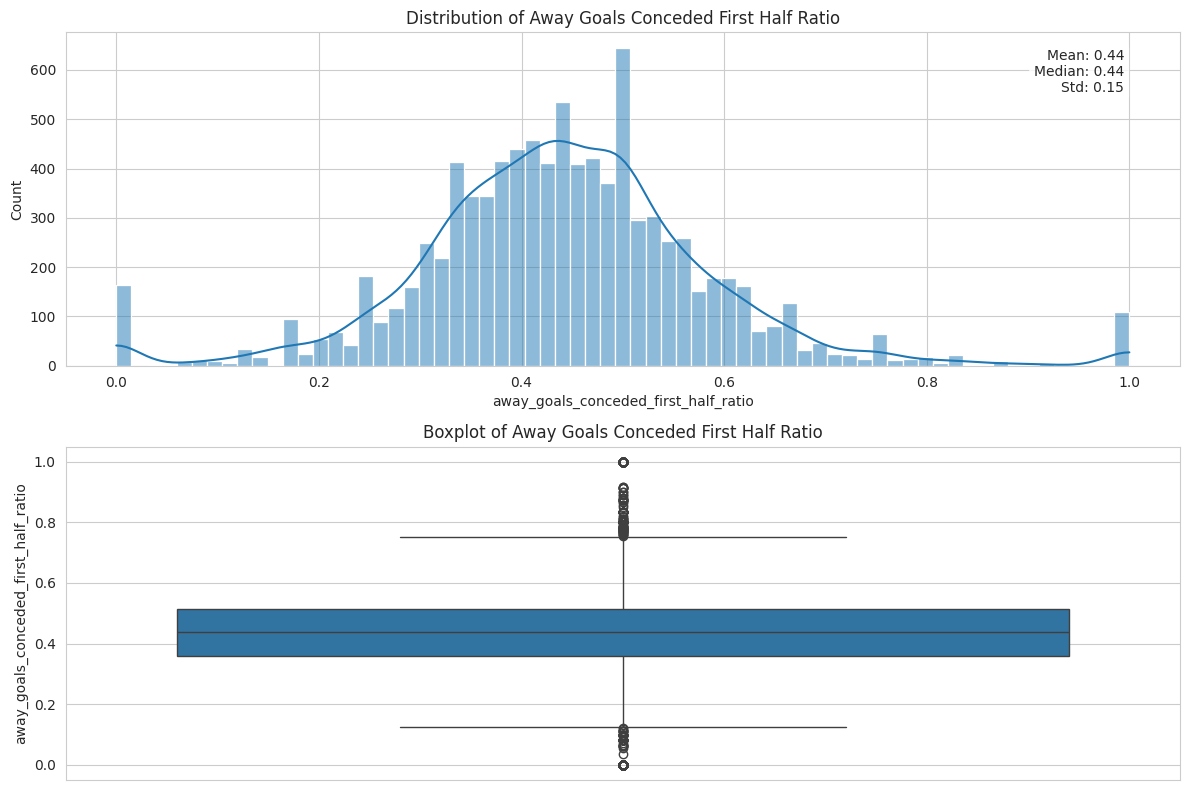

Processing feature 12/14: away_recent_goals_scored


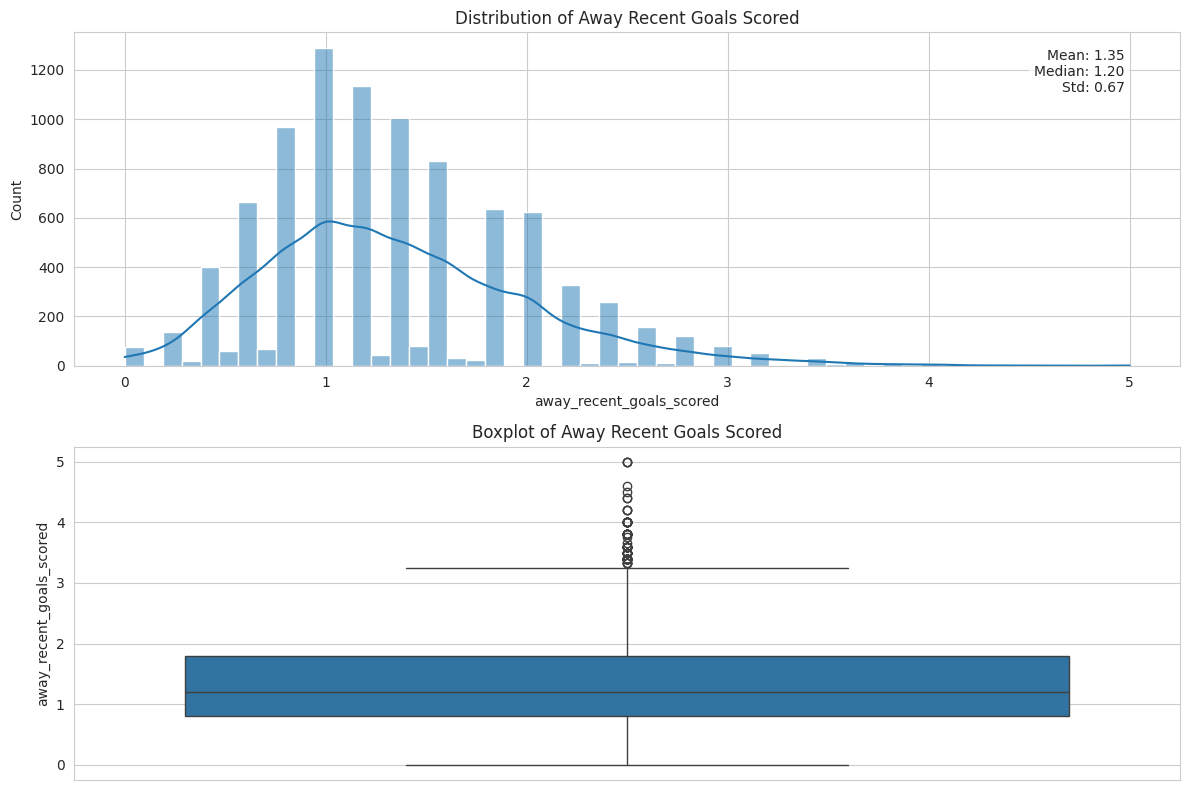

Processing feature 13/14: away_recent_goals_conceded


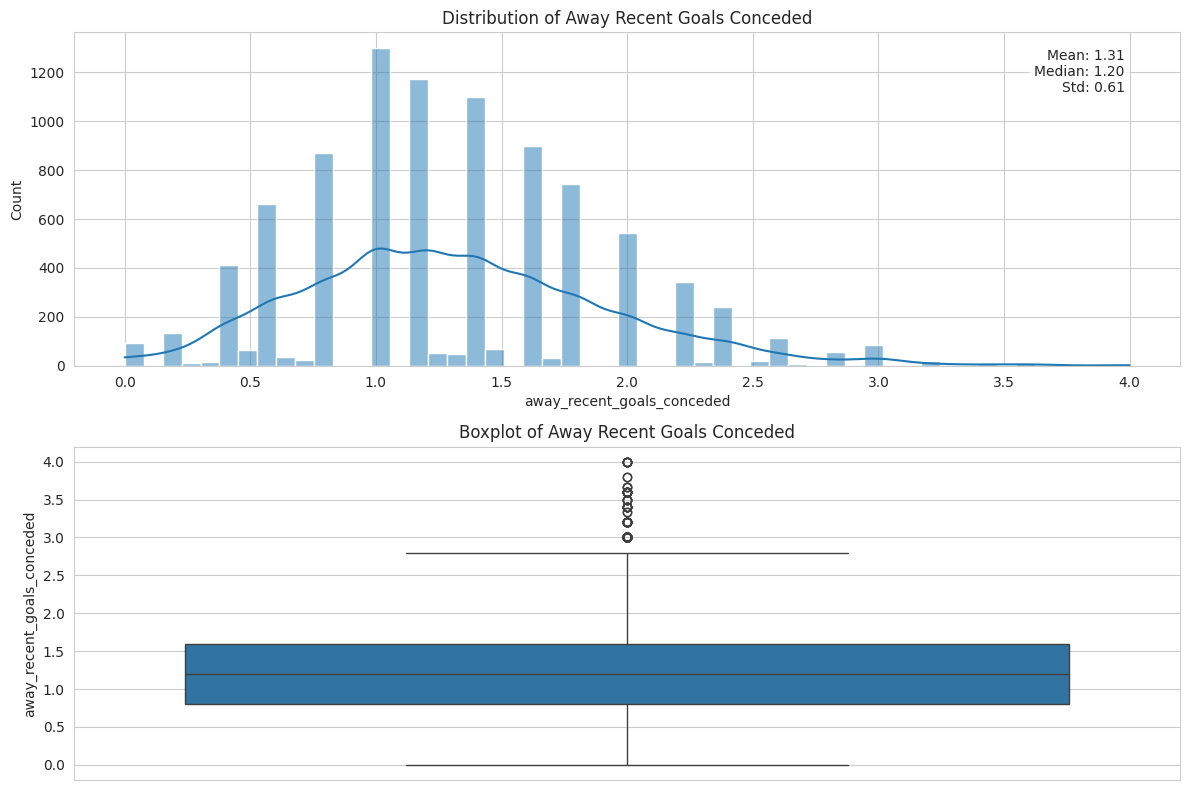

Processing feature 14/14: away_venue_goals_avg


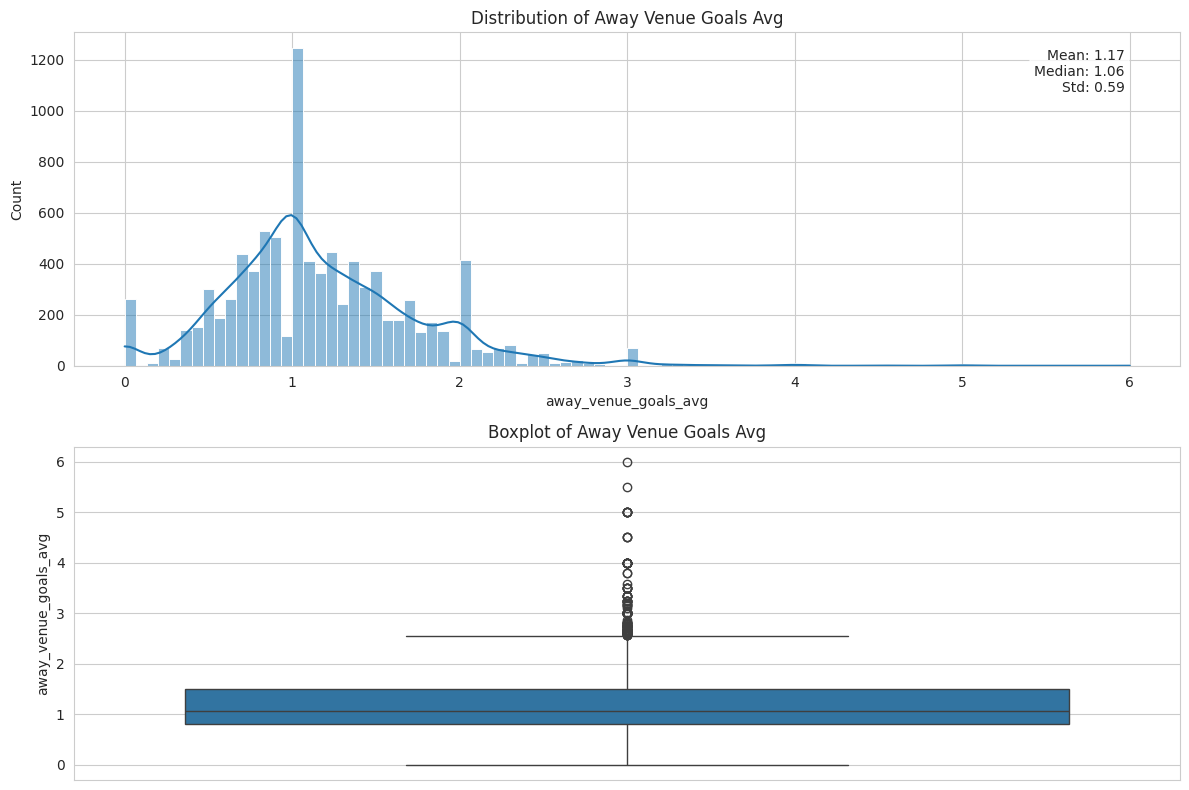


=== Analyzing Shot Stats ===
Number of features in this group: 8
Processing feature 1/8: home_shot_conversion_rate


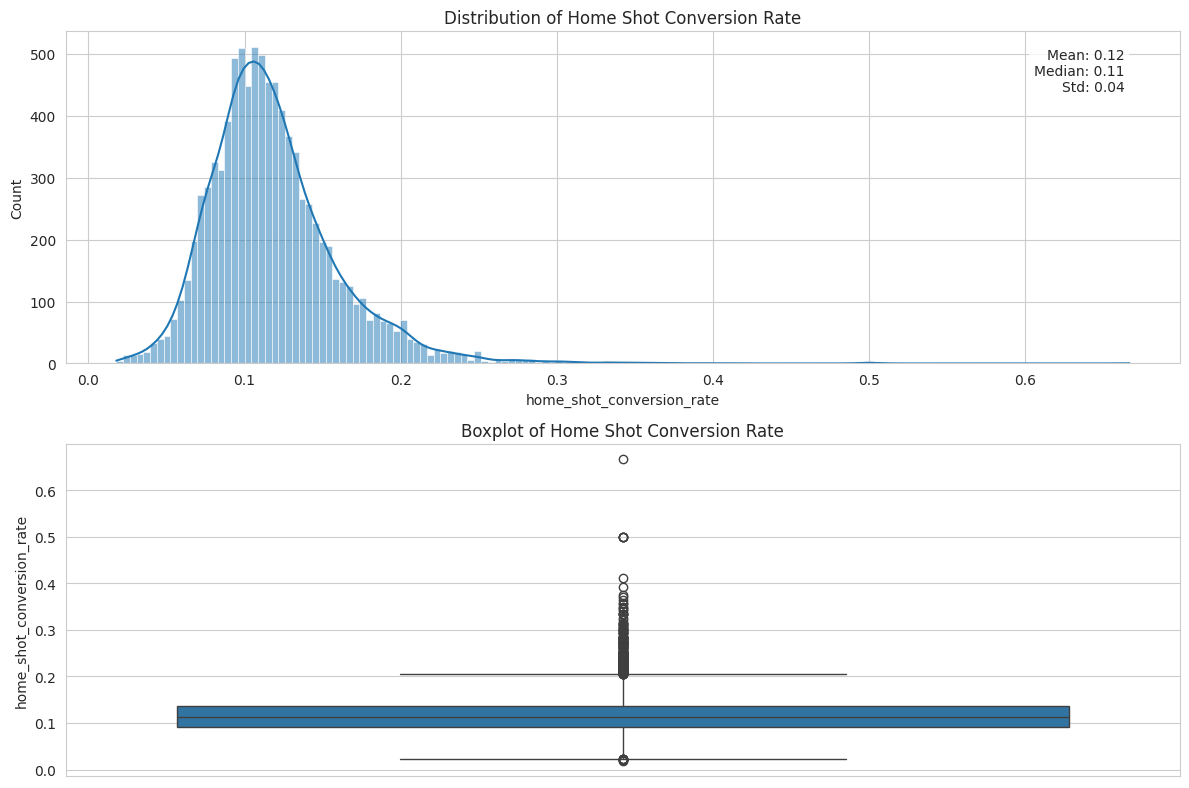

Processing feature 2/8: home_shots_on_target_ratio


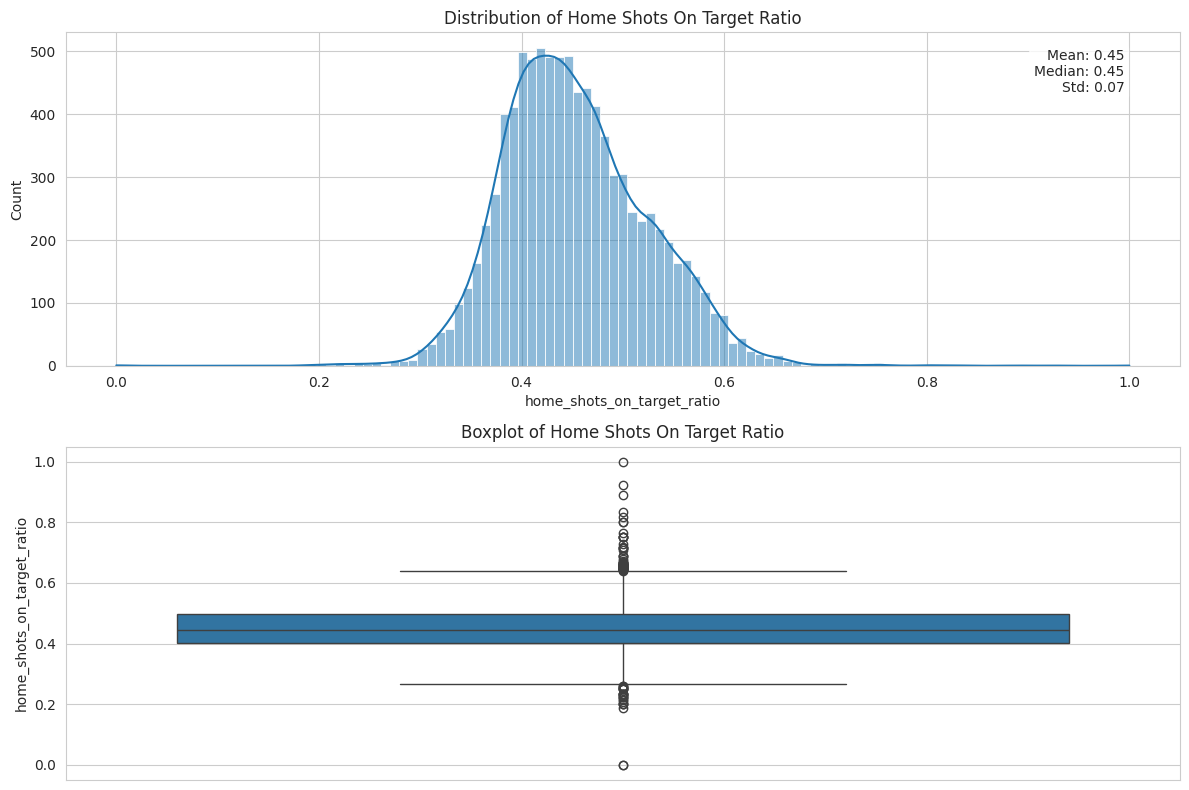

Processing feature 3/8: home_avg_shots_per_game


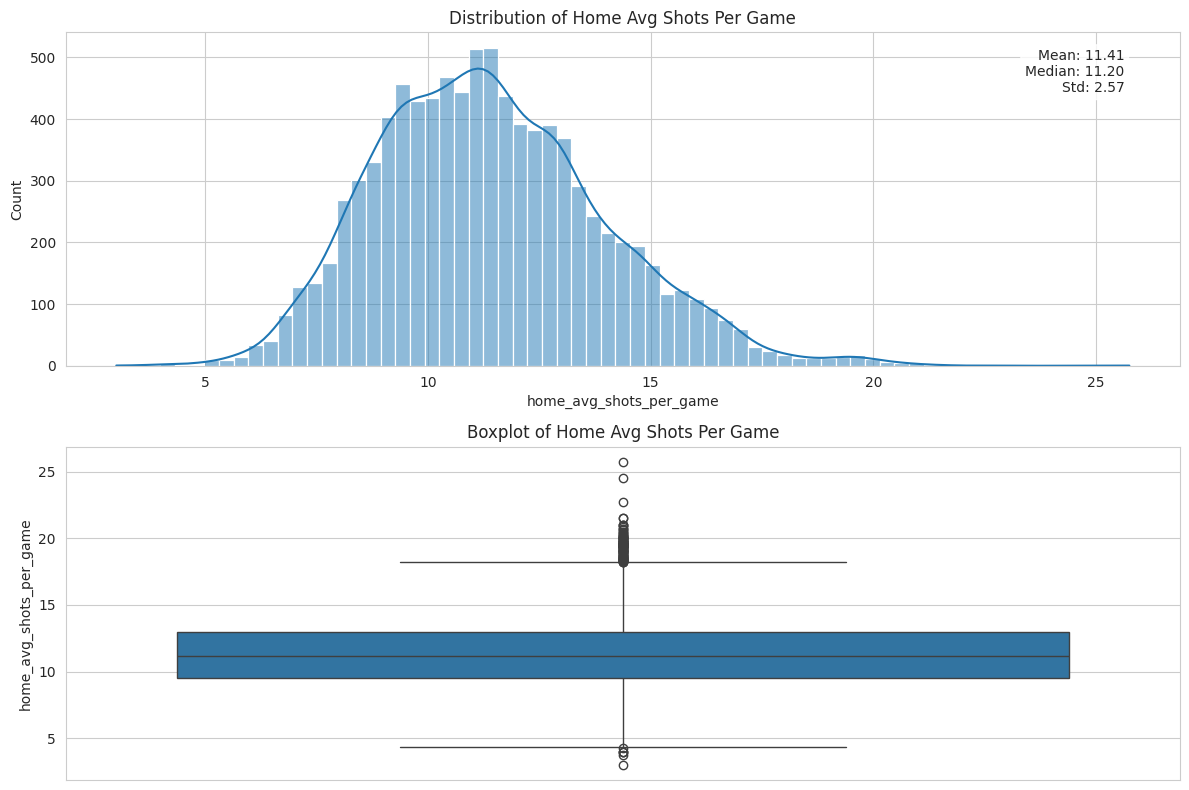

Processing feature 4/8: home_avg_shots_on_target


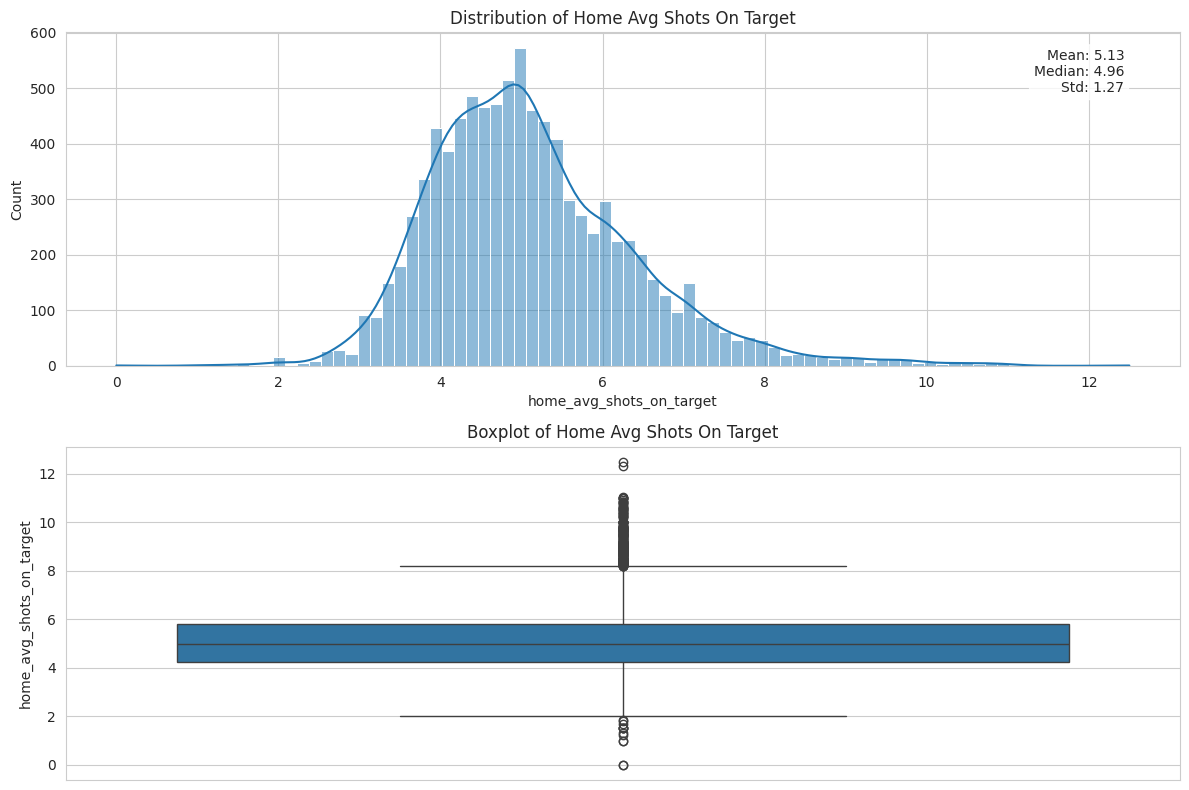

Processing feature 5/8: away_shot_conversion_rate


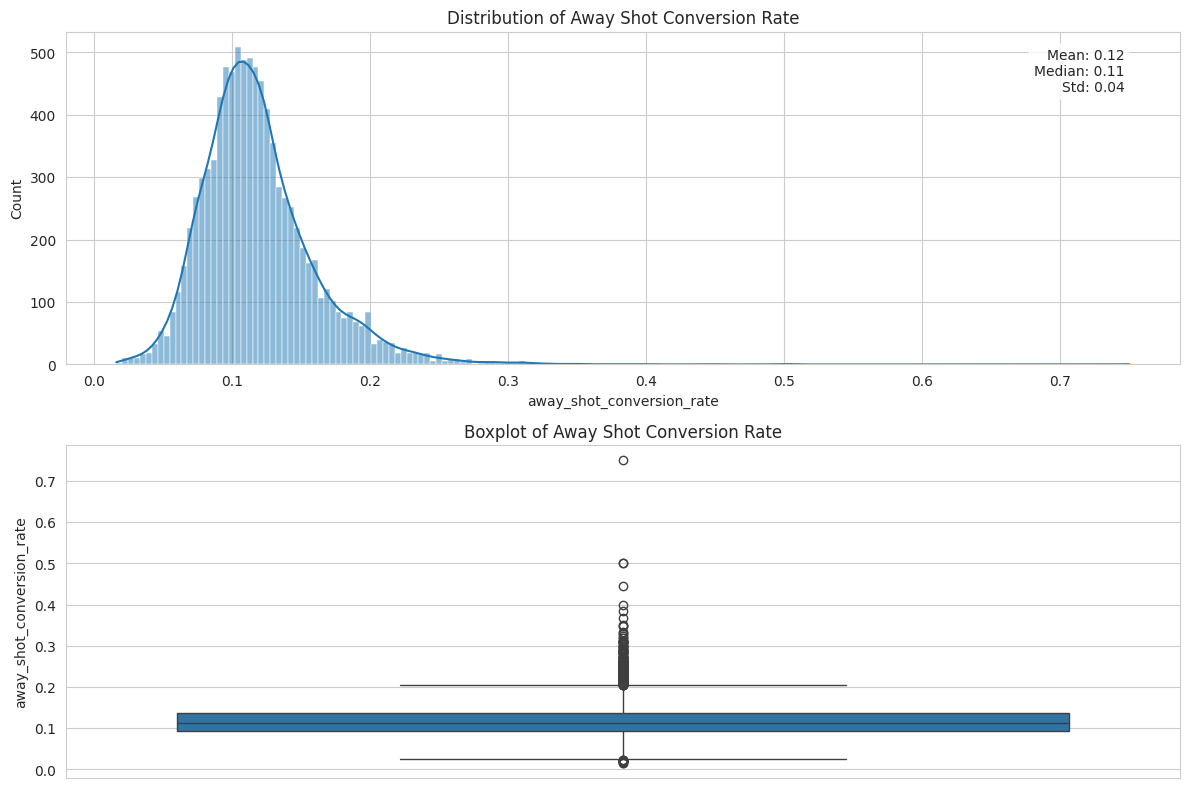

Processing feature 6/8: away_shots_on_target_ratio


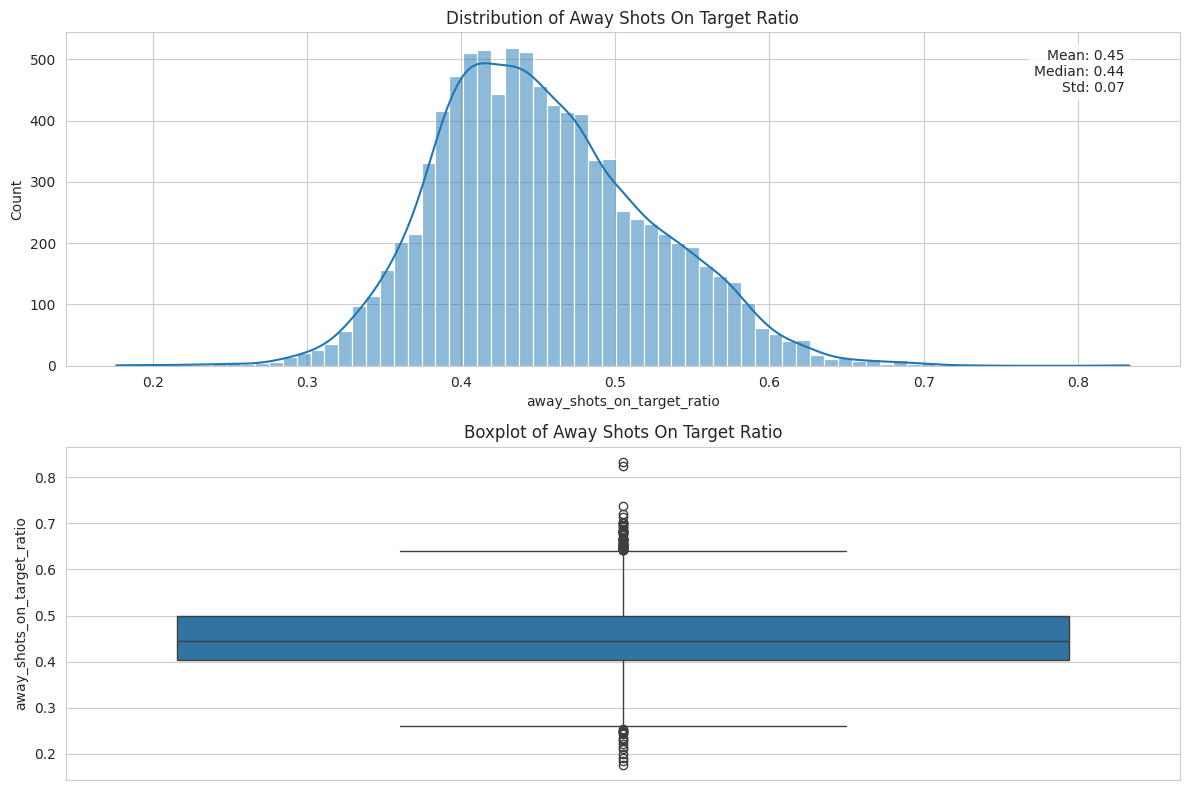

Processing feature 7/8: away_avg_shots_per_game


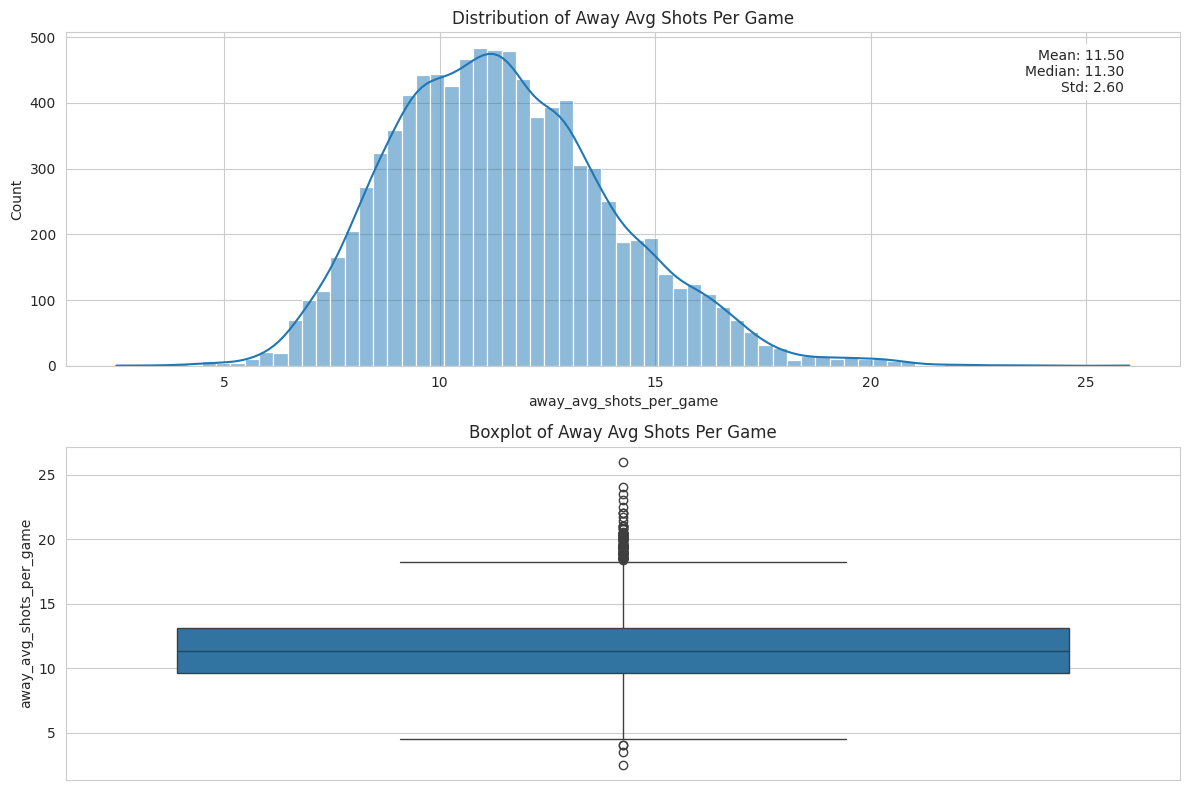

Processing feature 8/8: away_avg_shots_on_target


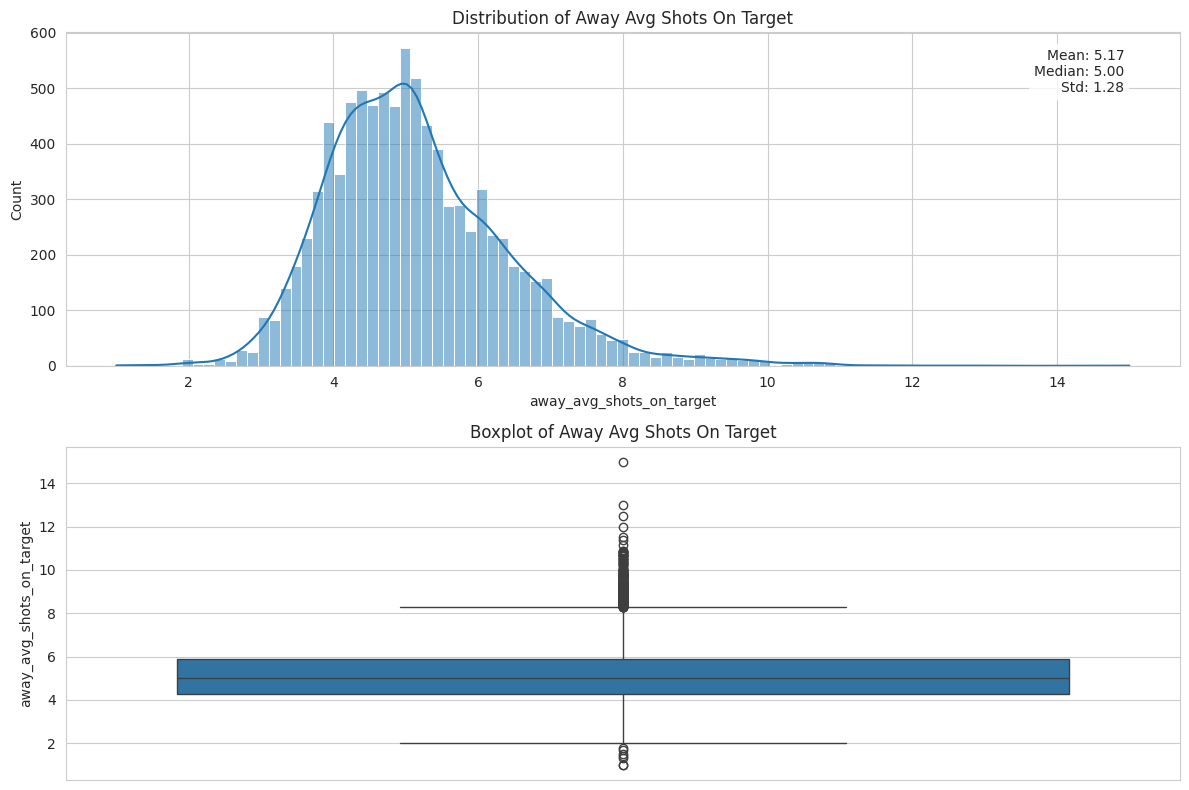


=== Analyzing Possession Stats ===
Number of features in this group: 4
Processing feature 1/4: home_avg_possession


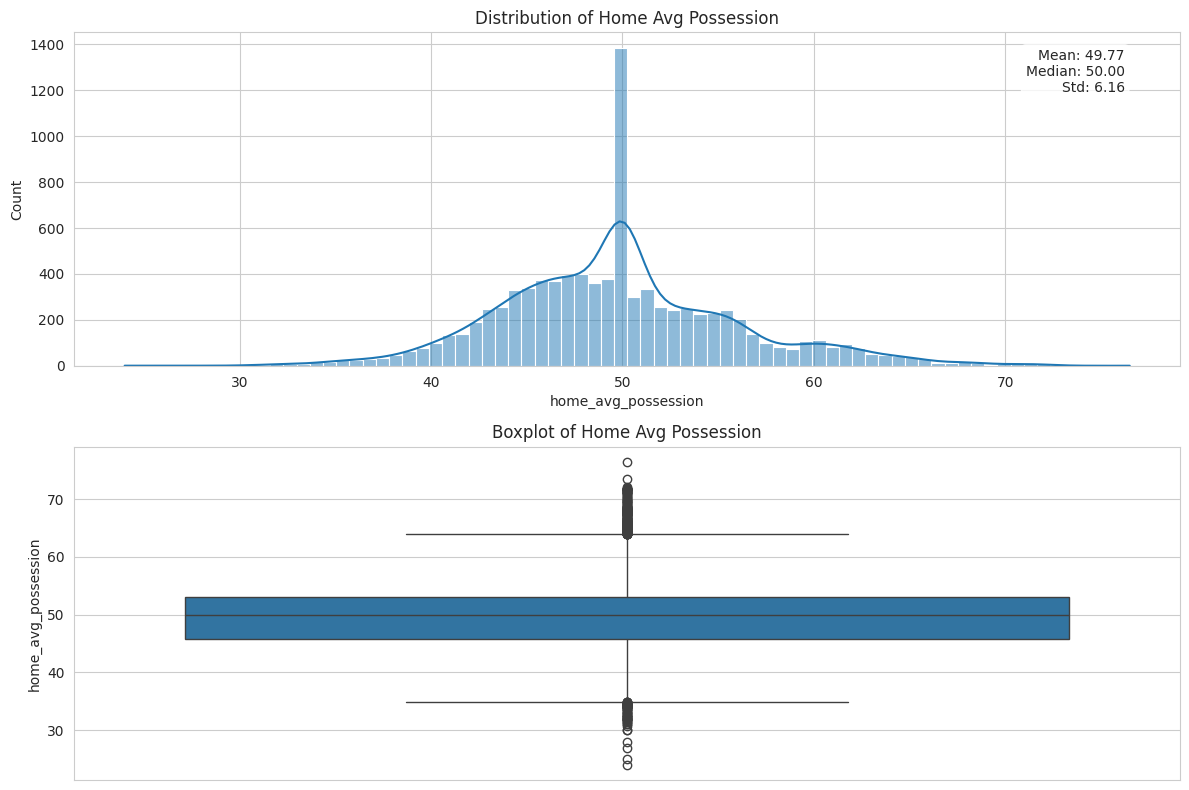

Processing feature 2/4: home_possession_efficiency


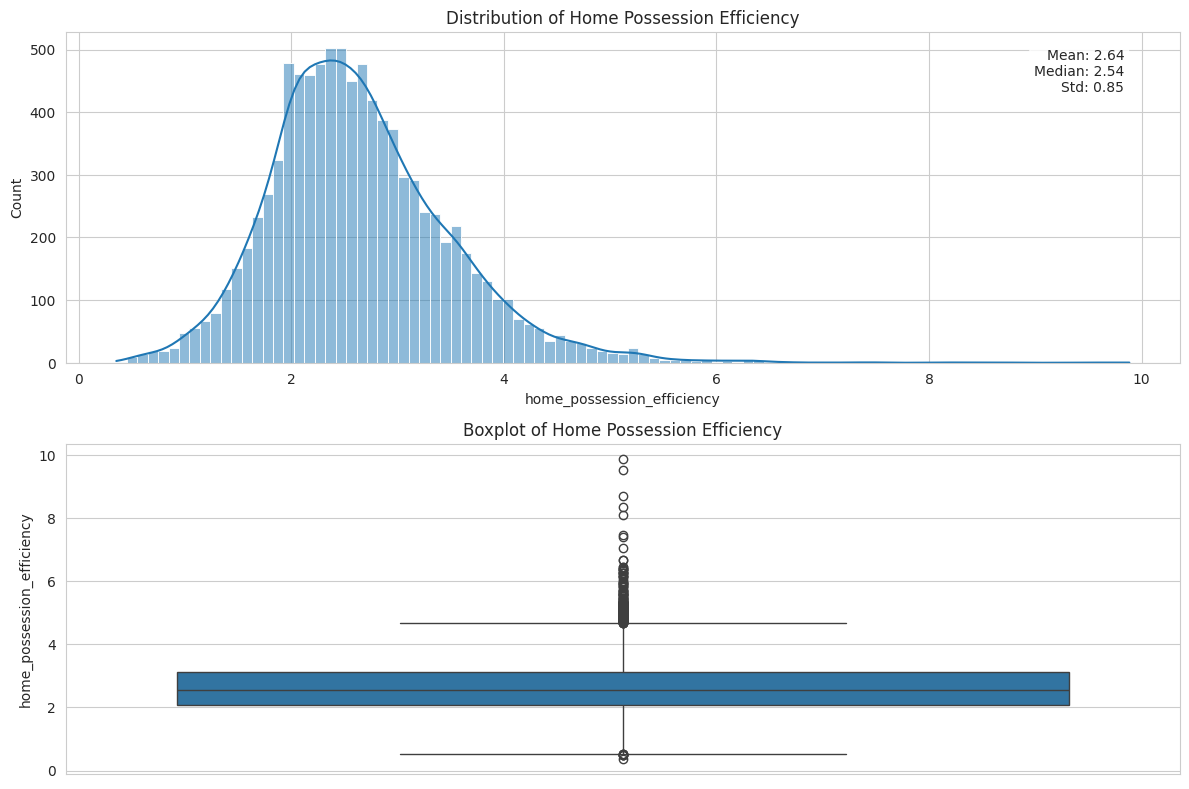

Processing feature 3/4: away_avg_possession


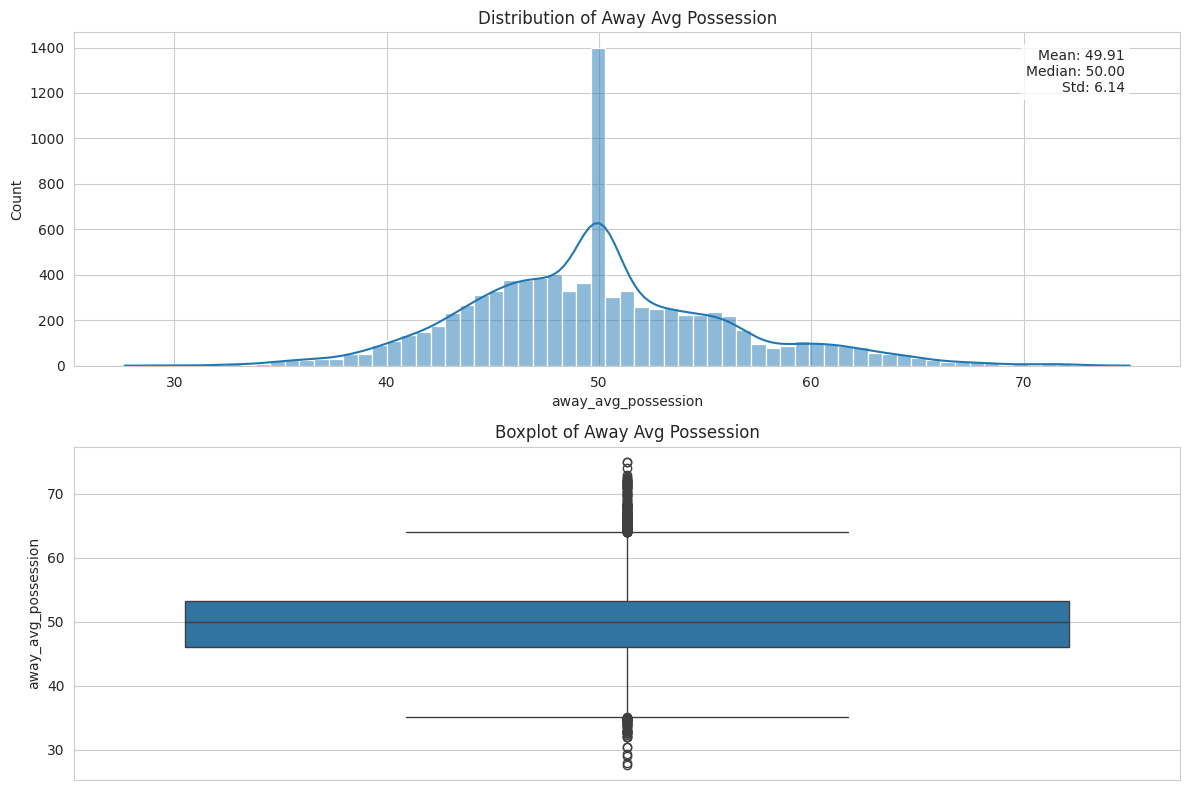

Processing feature 4/4: away_possession_efficiency


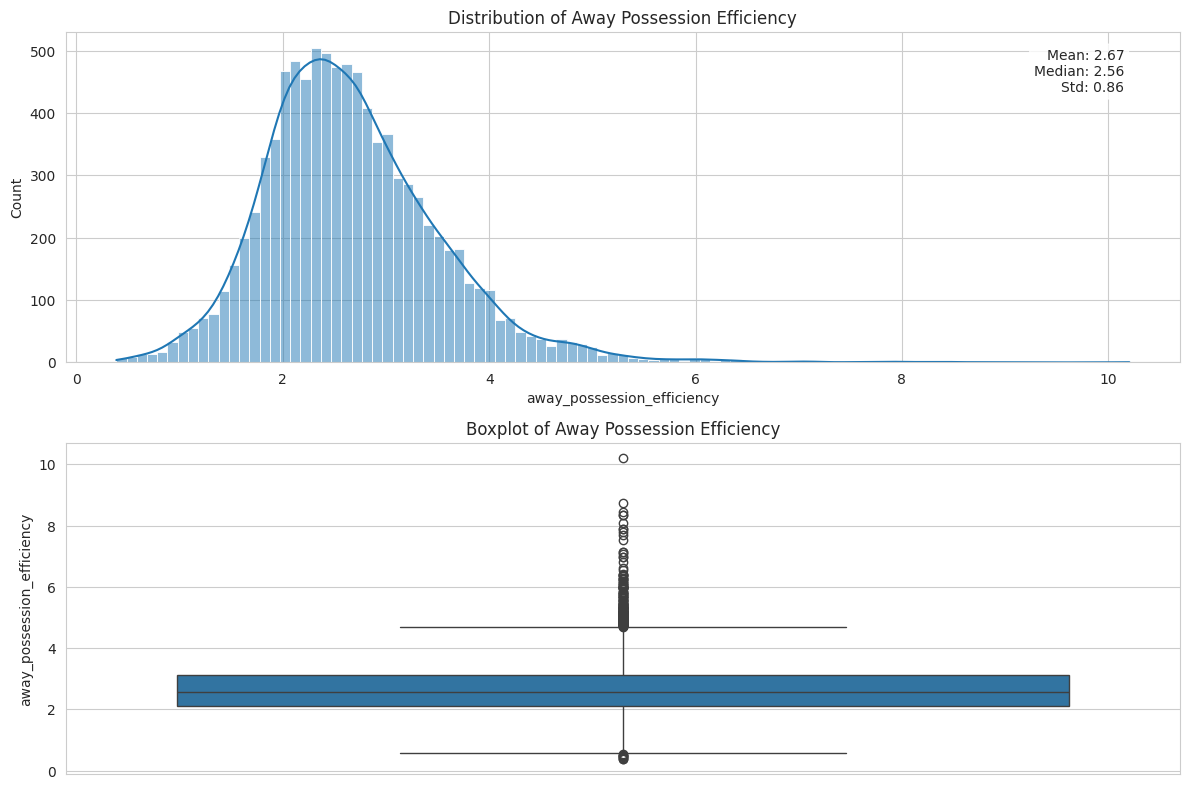


=== Analyzing Set Pieces ===
Number of features in this group: 4
Processing feature 1/4: home_avg_corners_for


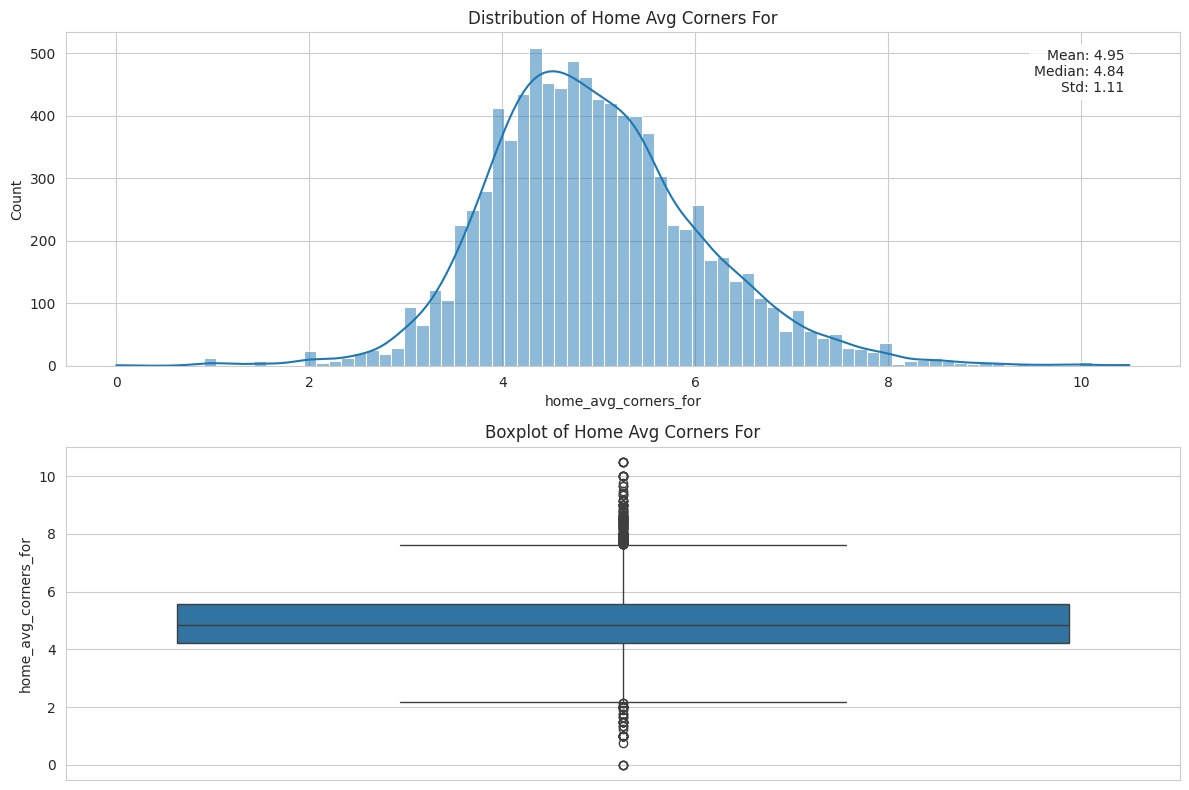

Processing feature 2/4: home_corner_efficiency


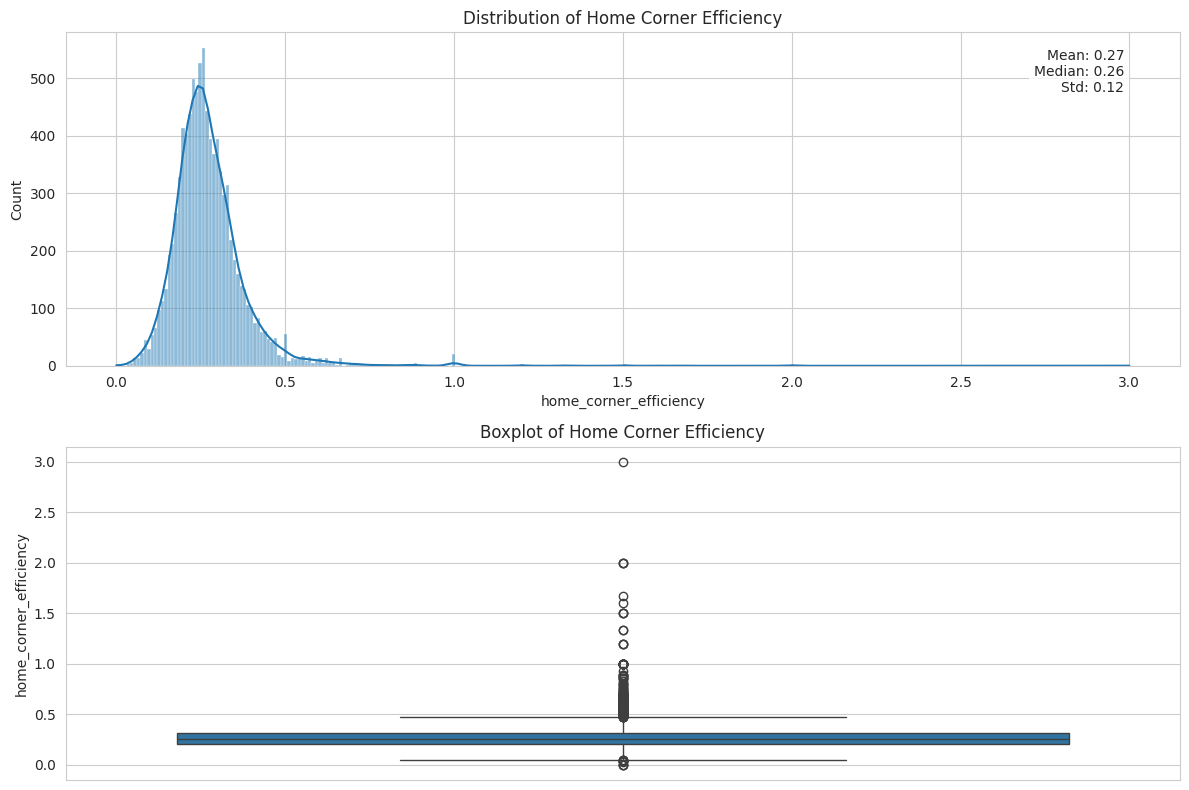

Processing feature 3/4: away_avg_corners_for


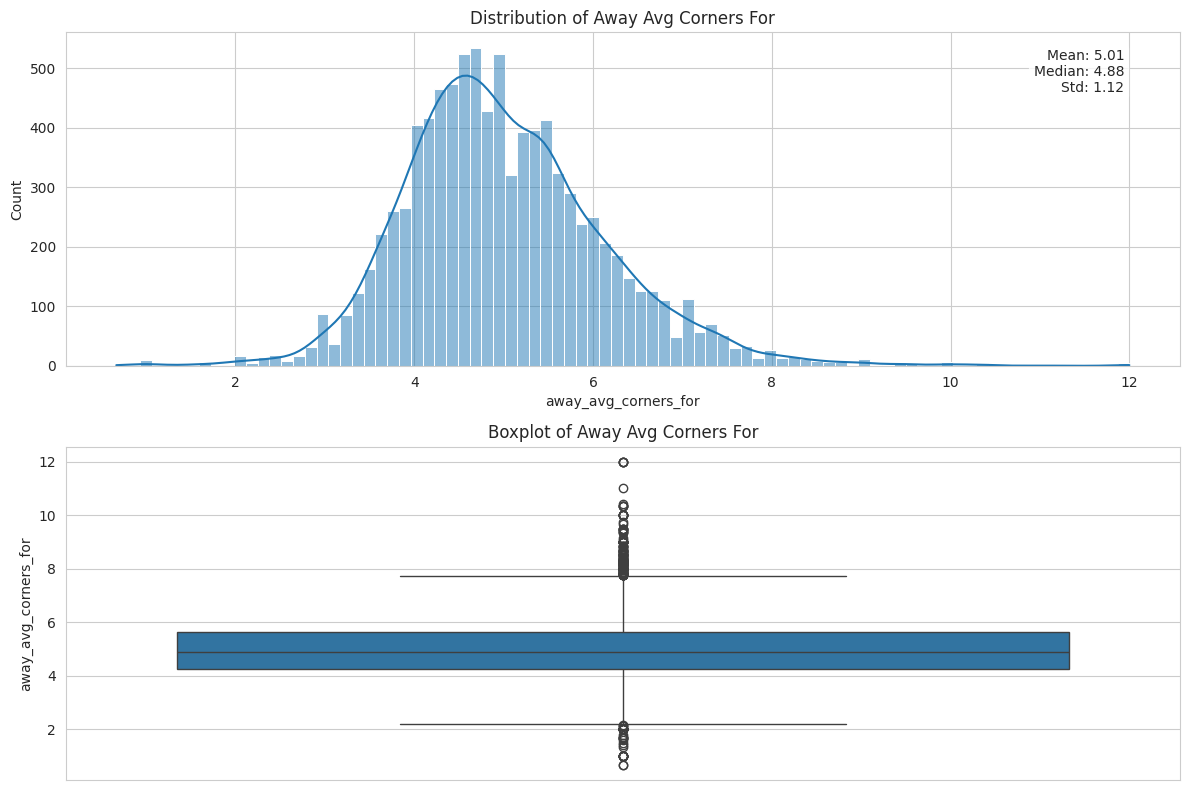

Processing feature 4/4: away_corner_efficiency


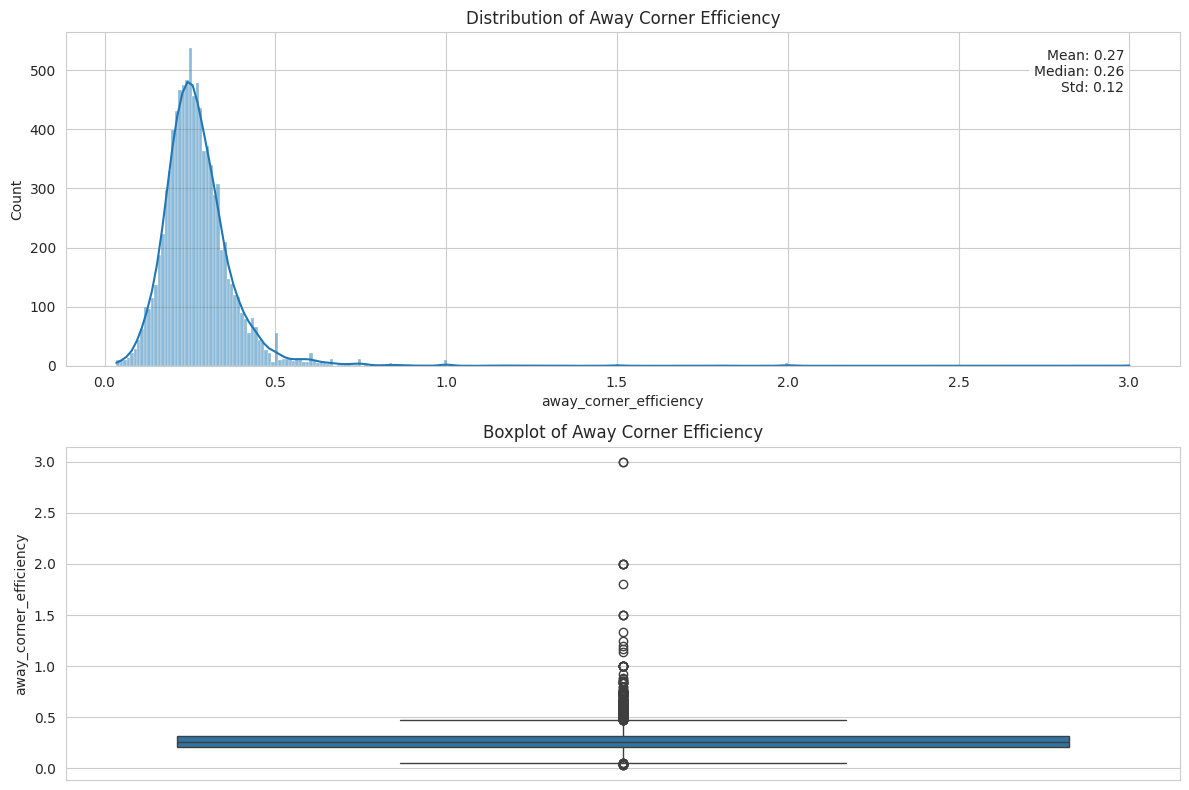


=== Analyzing Disciplinary ===
Number of features in this group: 14
Processing feature 1/14: home_avg_goals_scored


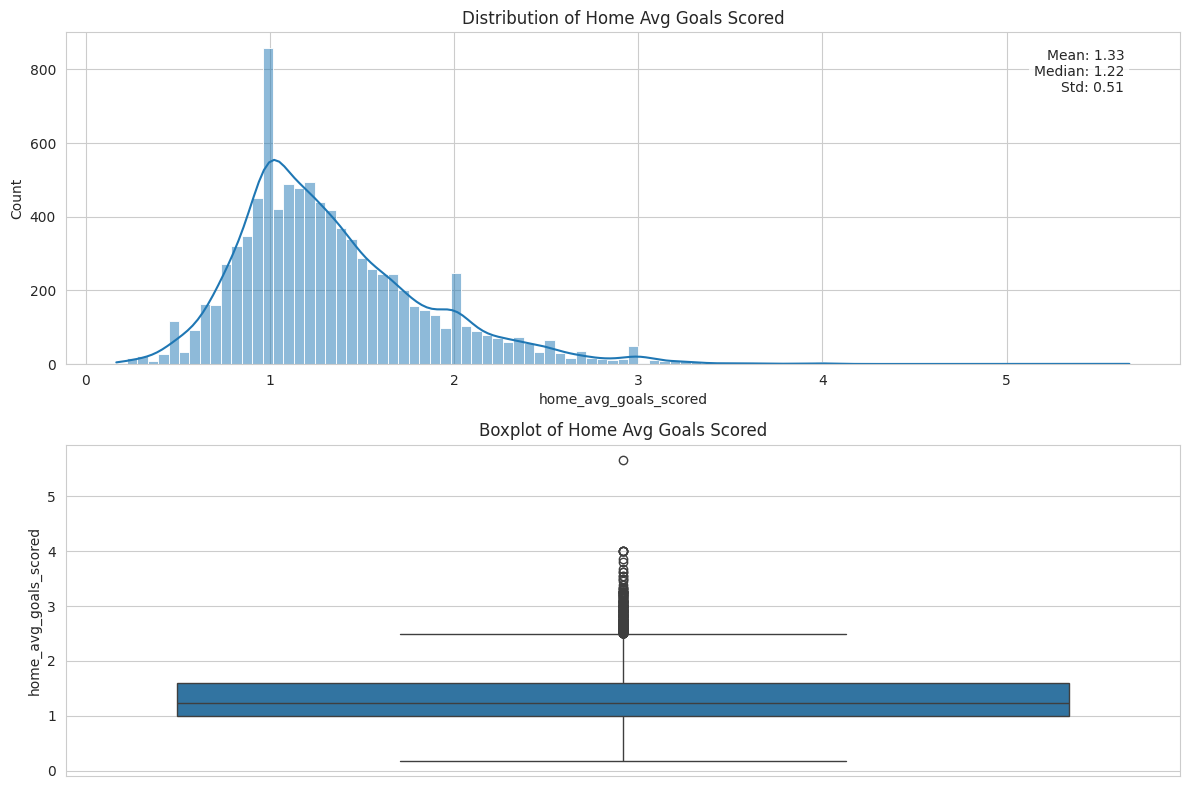

Processing feature 2/14: home_goals_scored_first_half_ratio


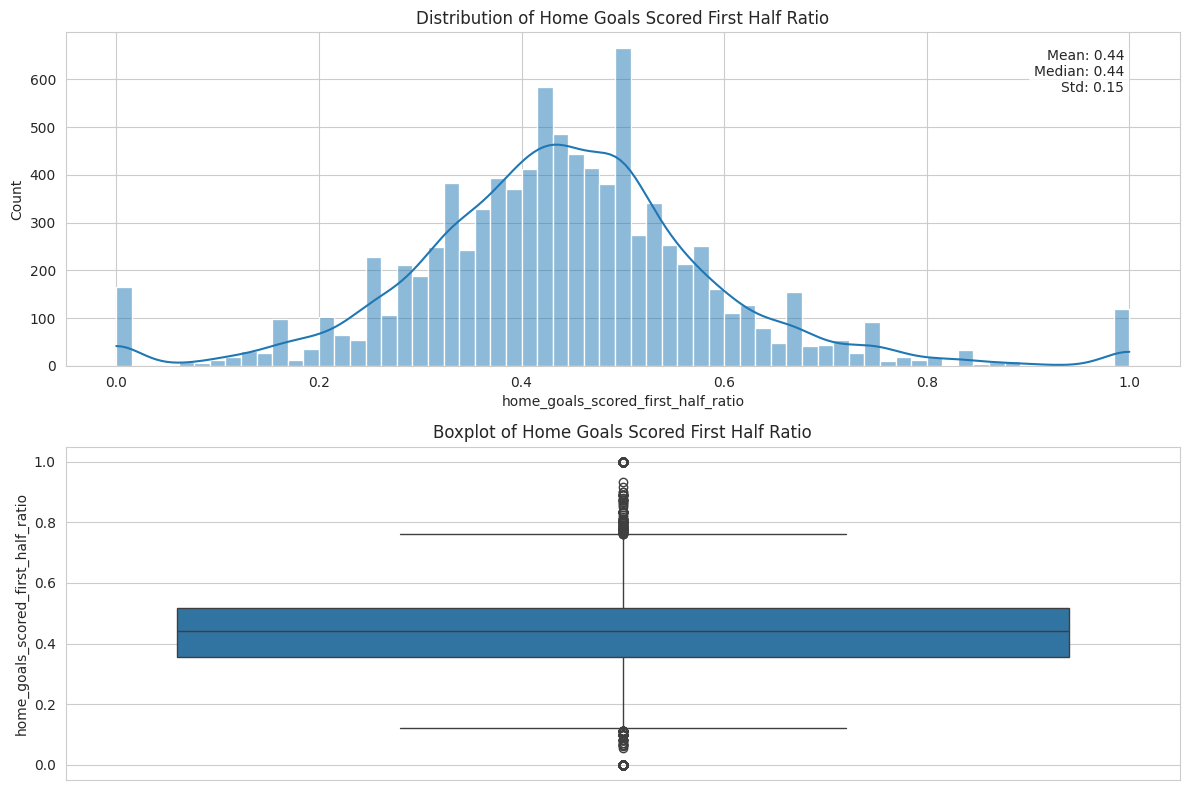

Processing feature 3/14: home_recent_goals_scored


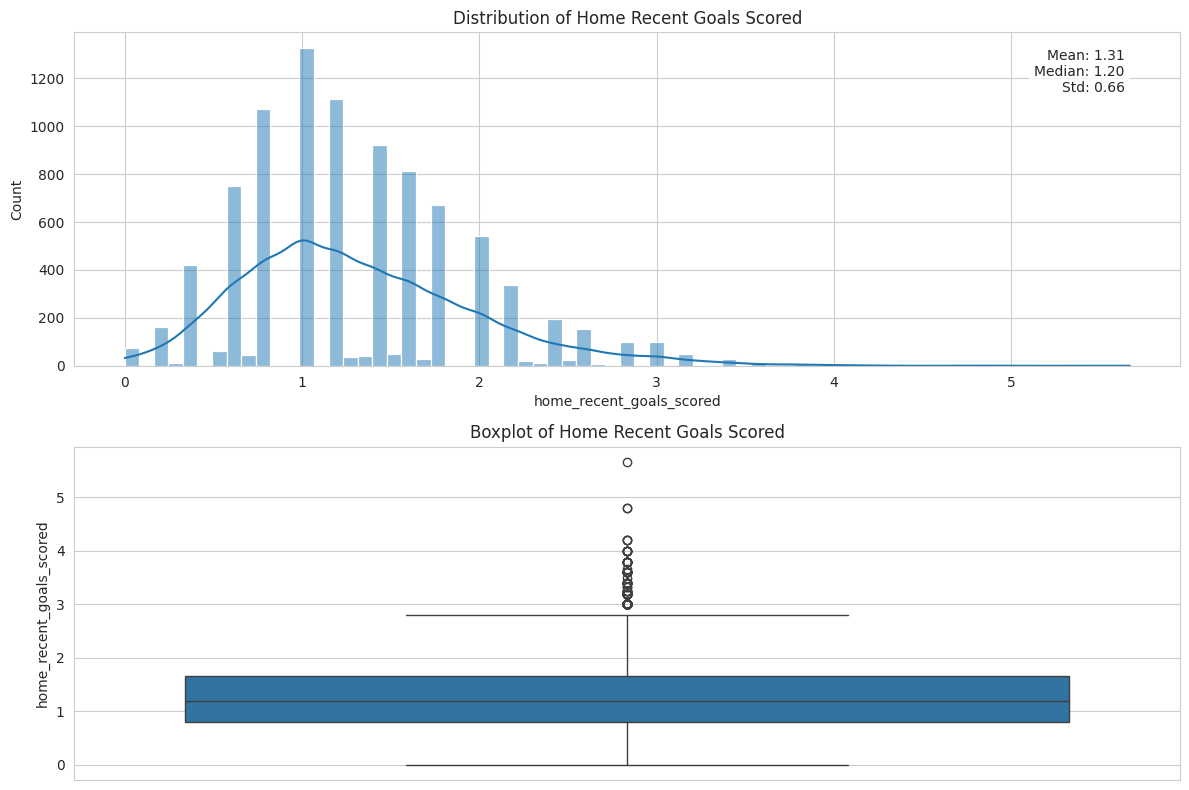

Processing feature 4/14: home_avg_fouls_committed


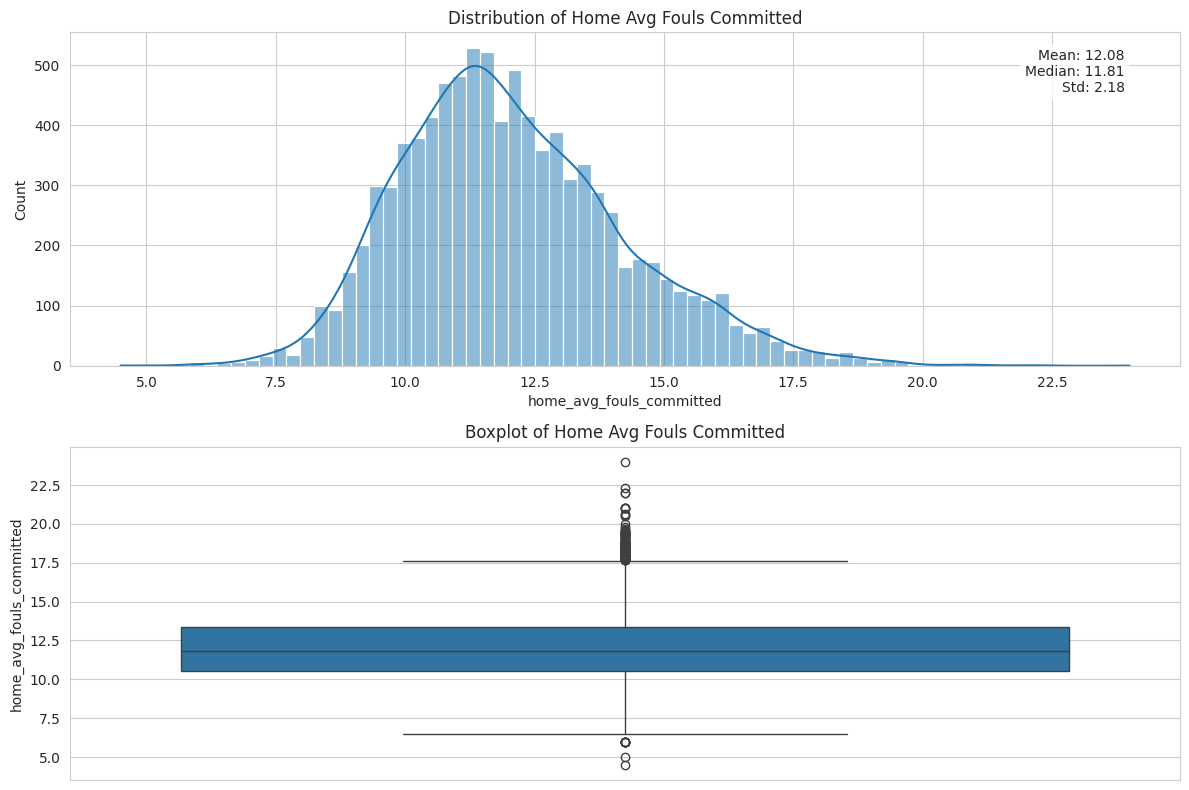

Processing feature 5/14: home_avg_yellows


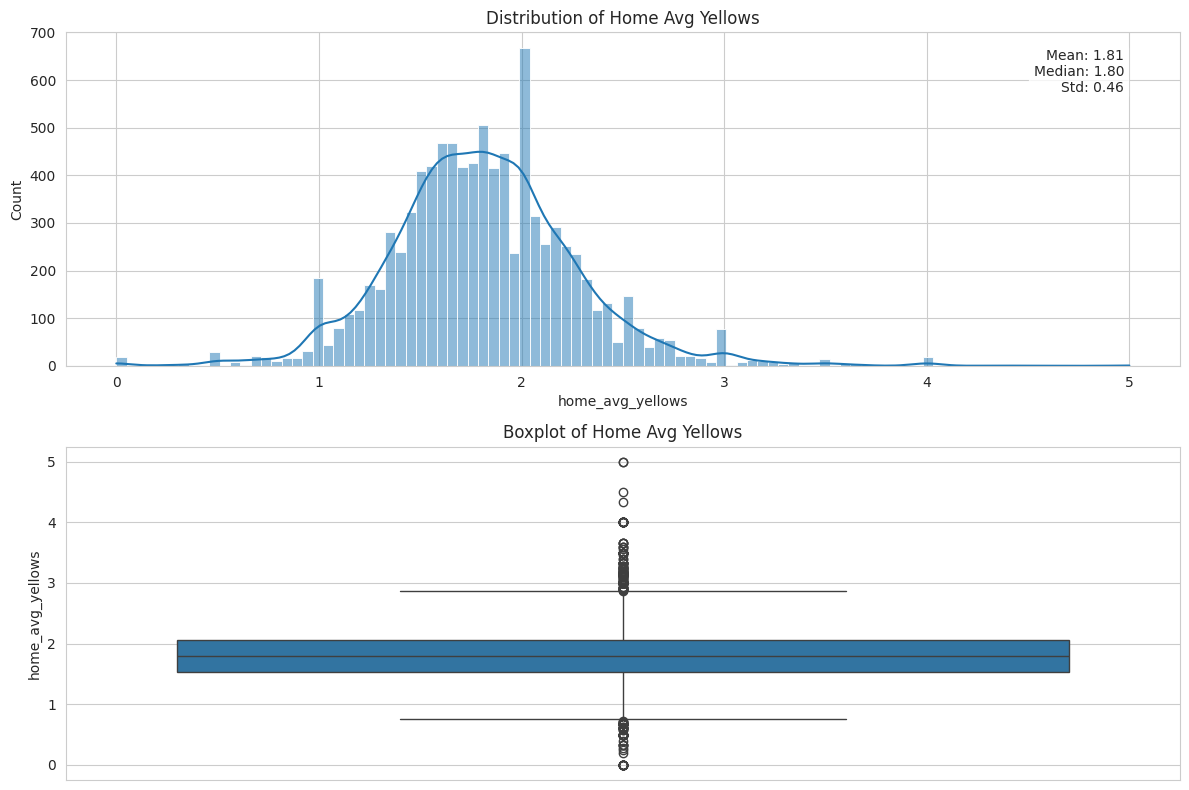

Processing feature 6/14: home_avg_reds


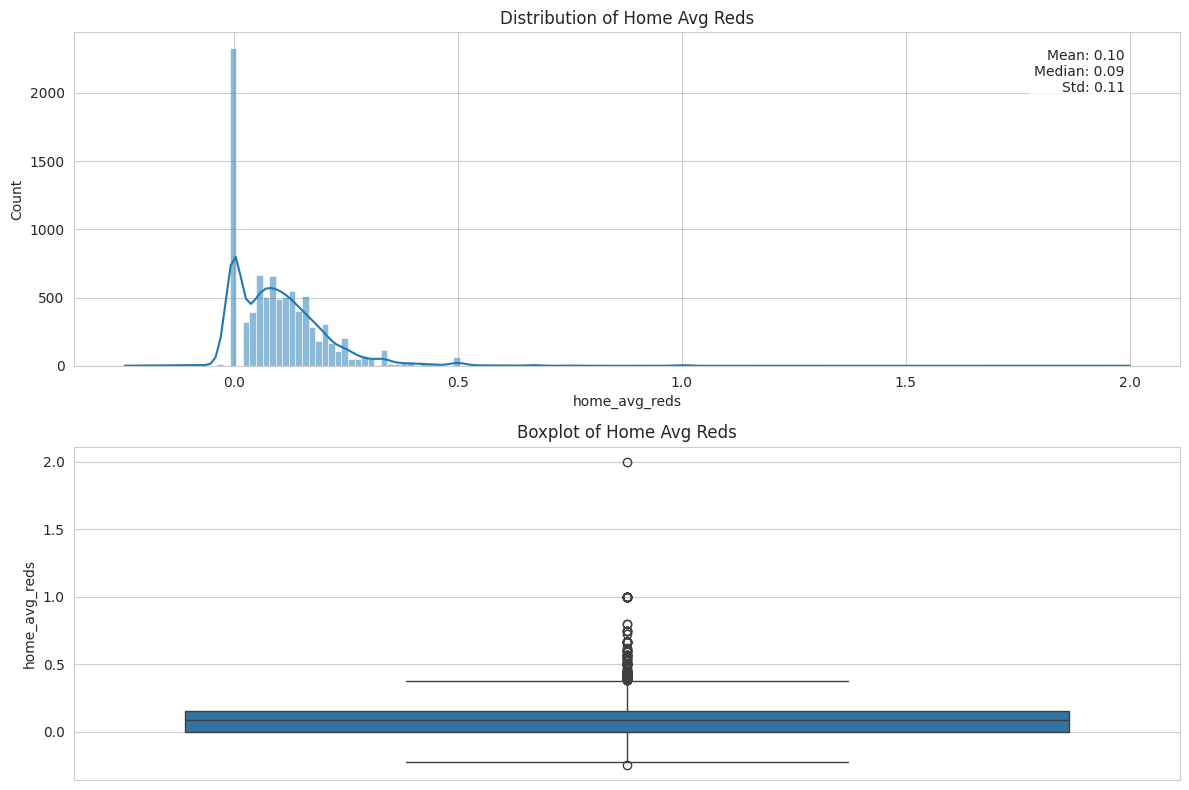

Processing feature 7/14: home_cards_first_half_ratio


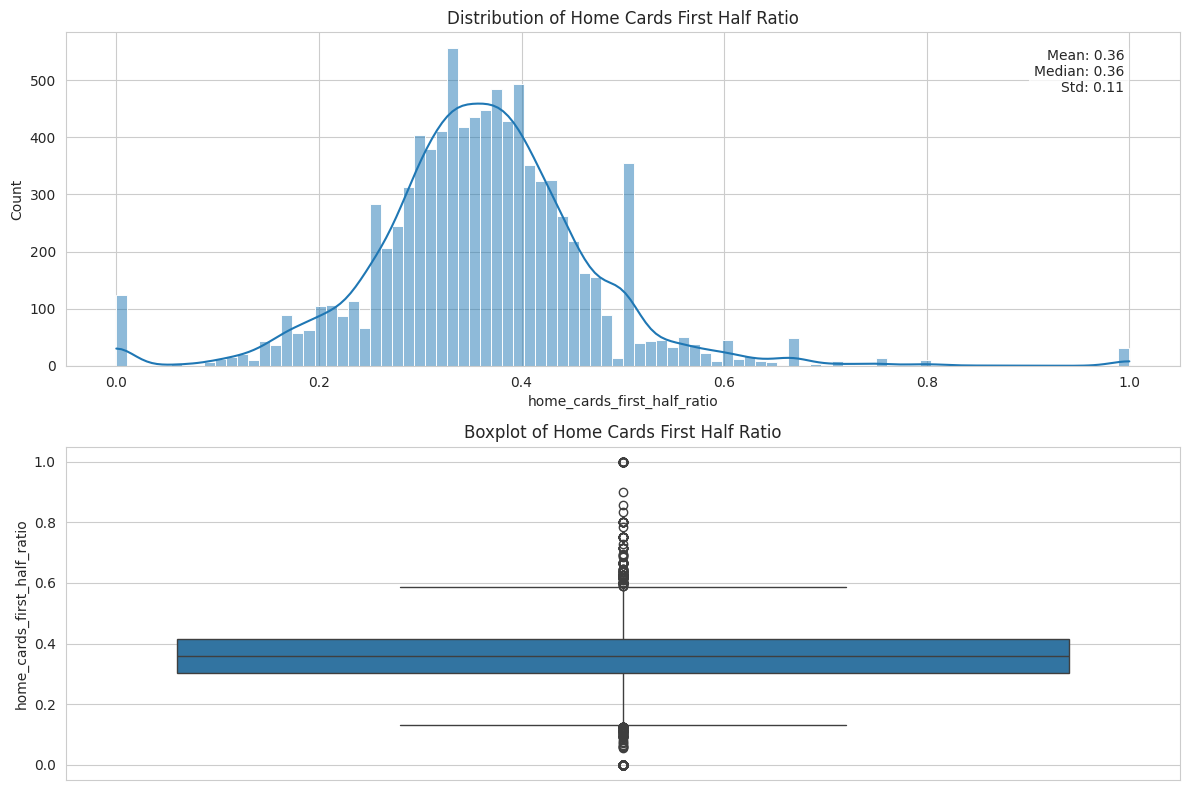

Processing feature 8/14: away_avg_goals_scored


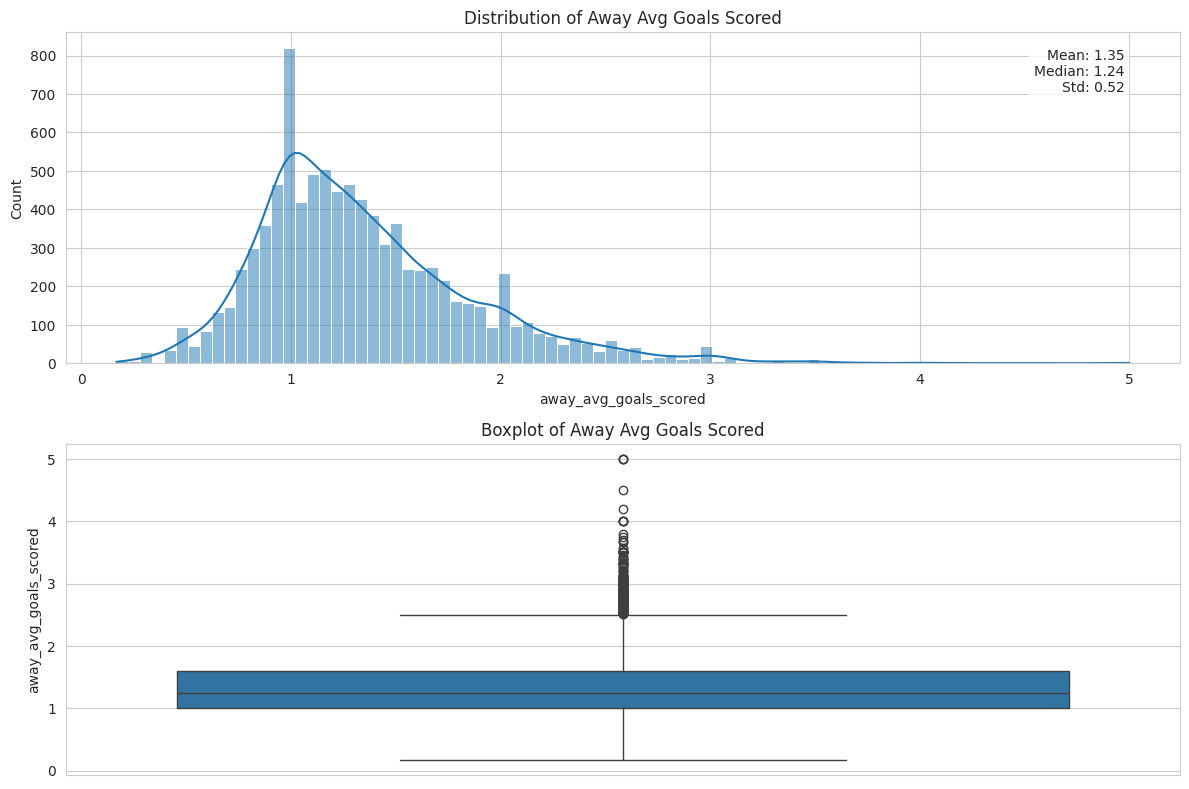

Processing feature 9/14: away_goals_scored_first_half_ratio


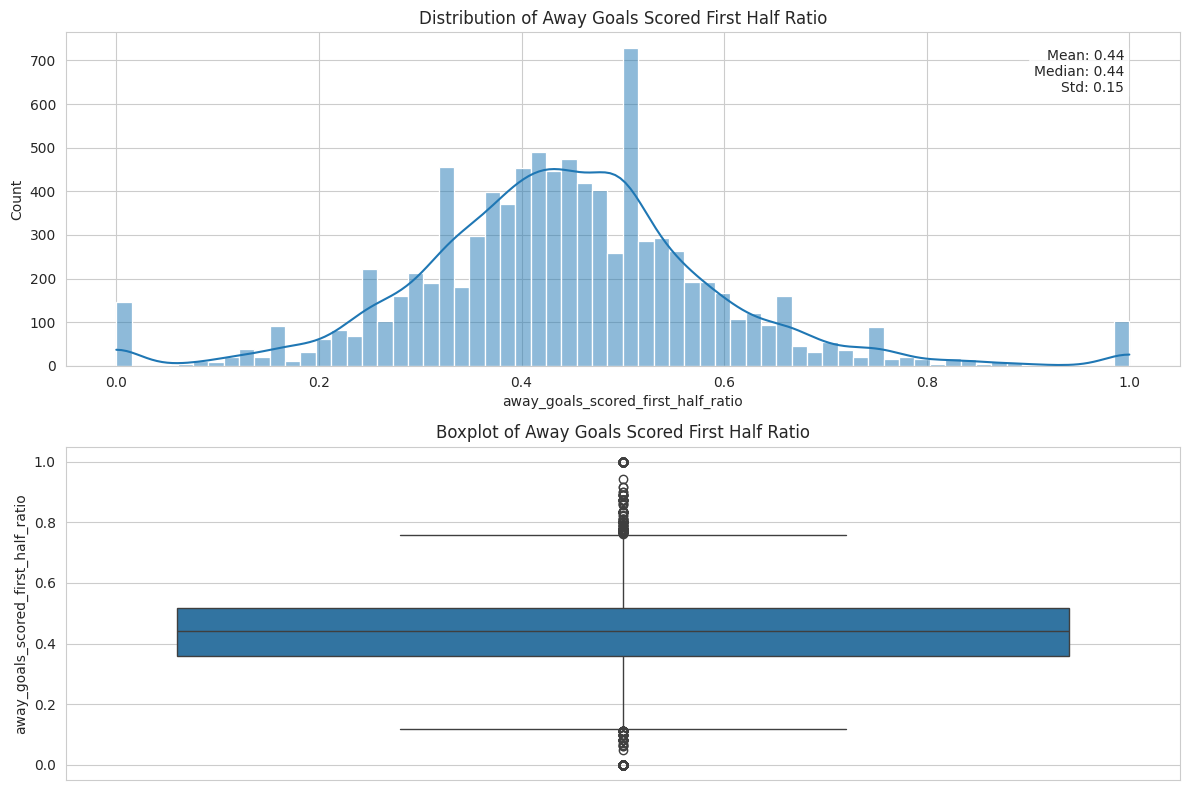

Processing feature 10/14: away_recent_goals_scored


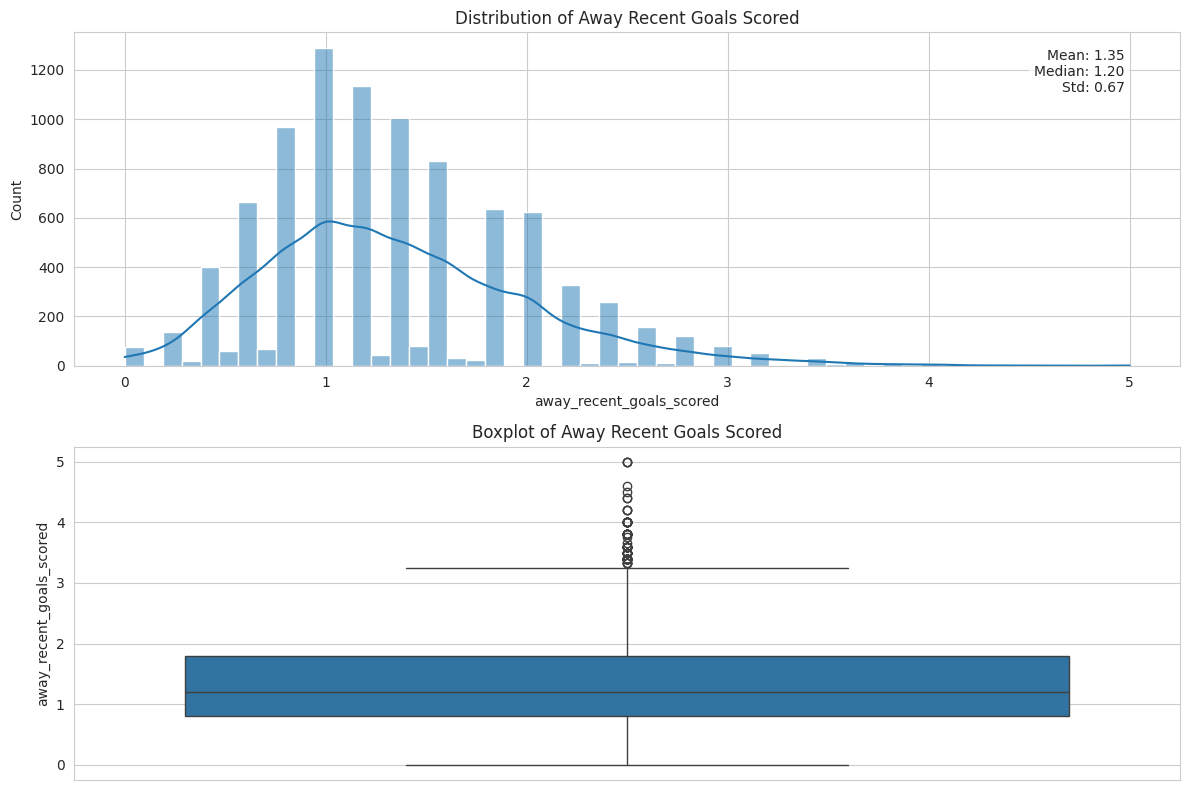

Processing feature 11/14: away_avg_fouls_committed


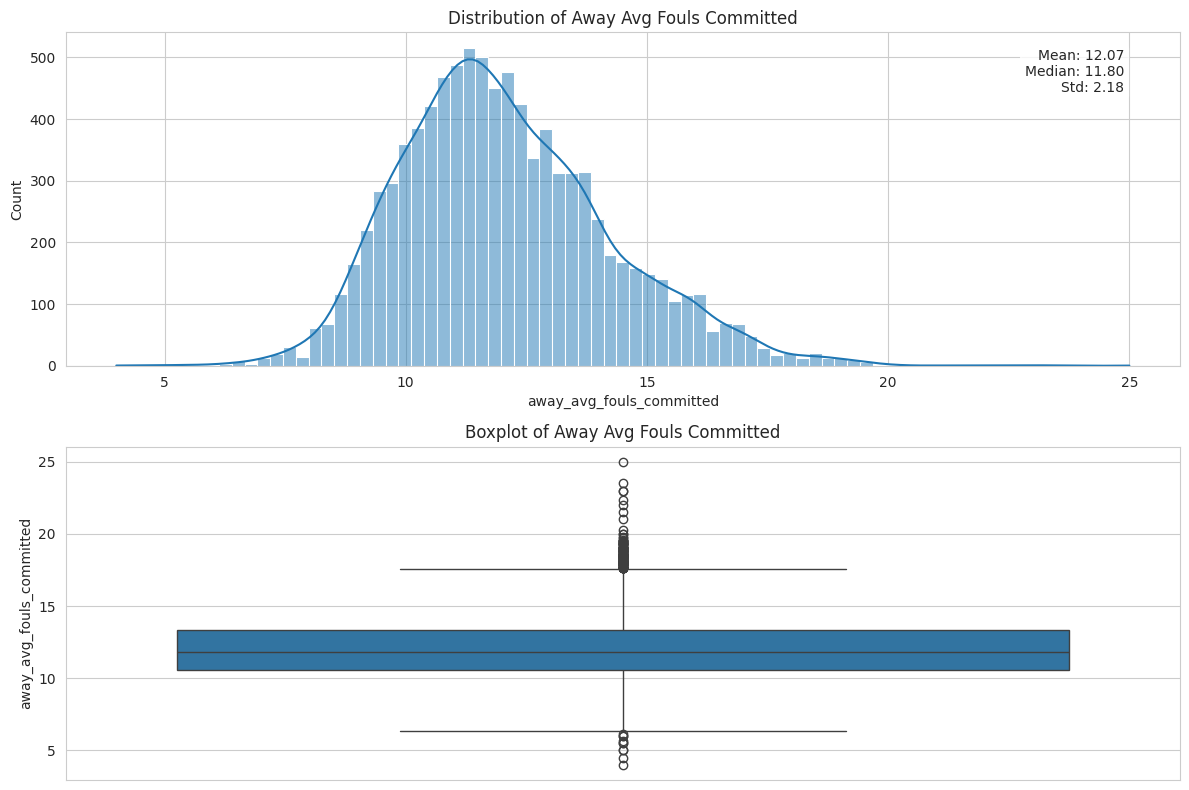

Processing feature 12/14: away_avg_yellows


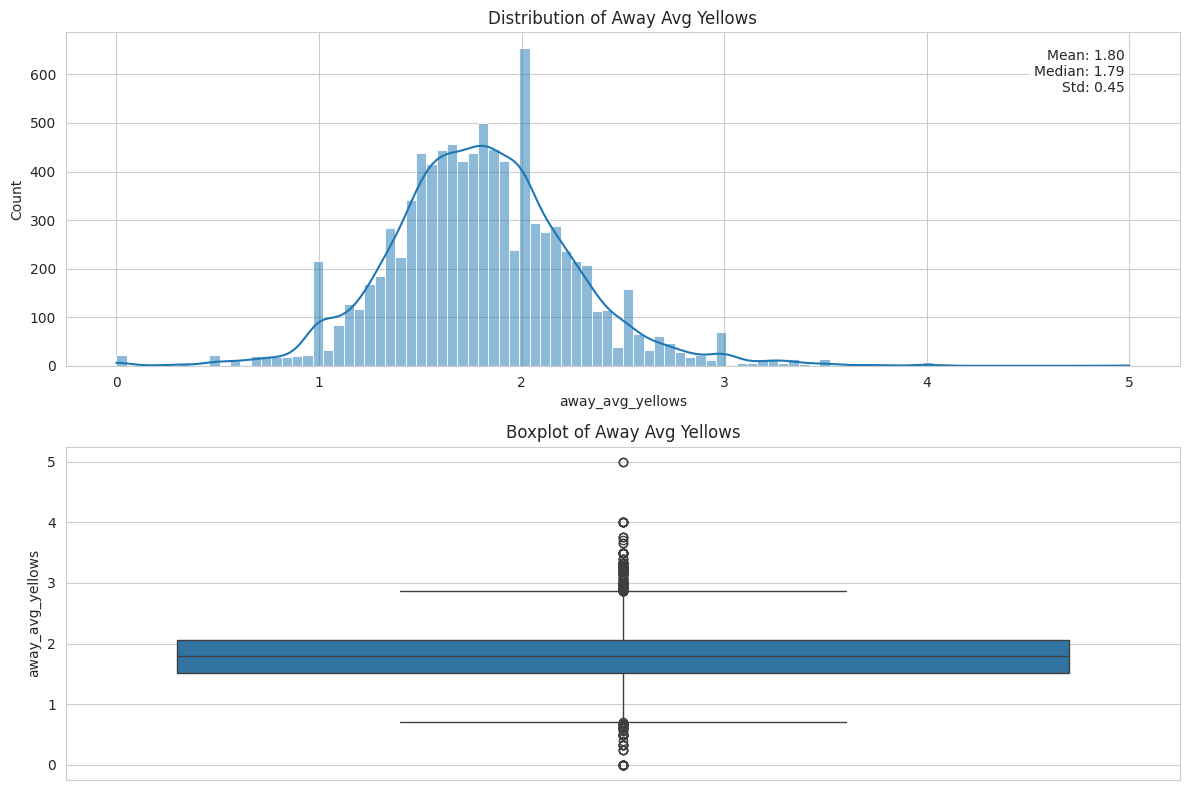

Processing feature 13/14: away_avg_reds


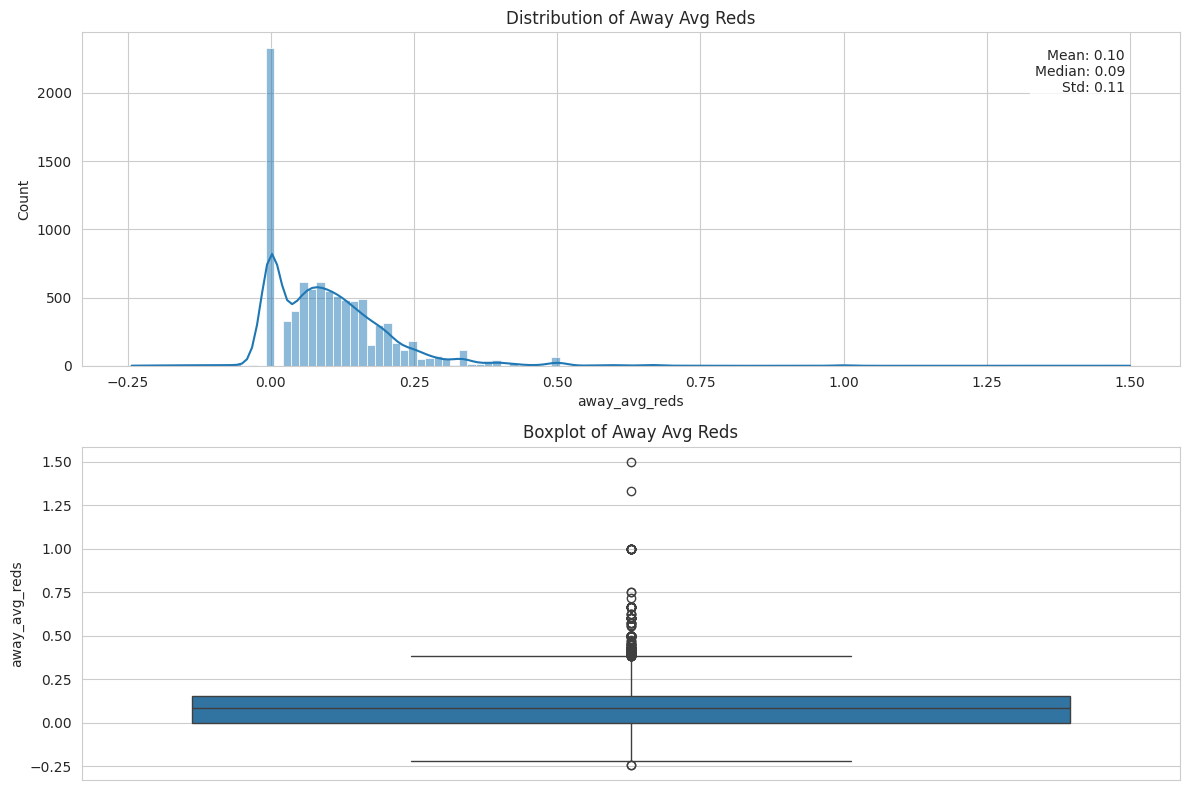

Processing feature 14/14: away_cards_first_half_ratio


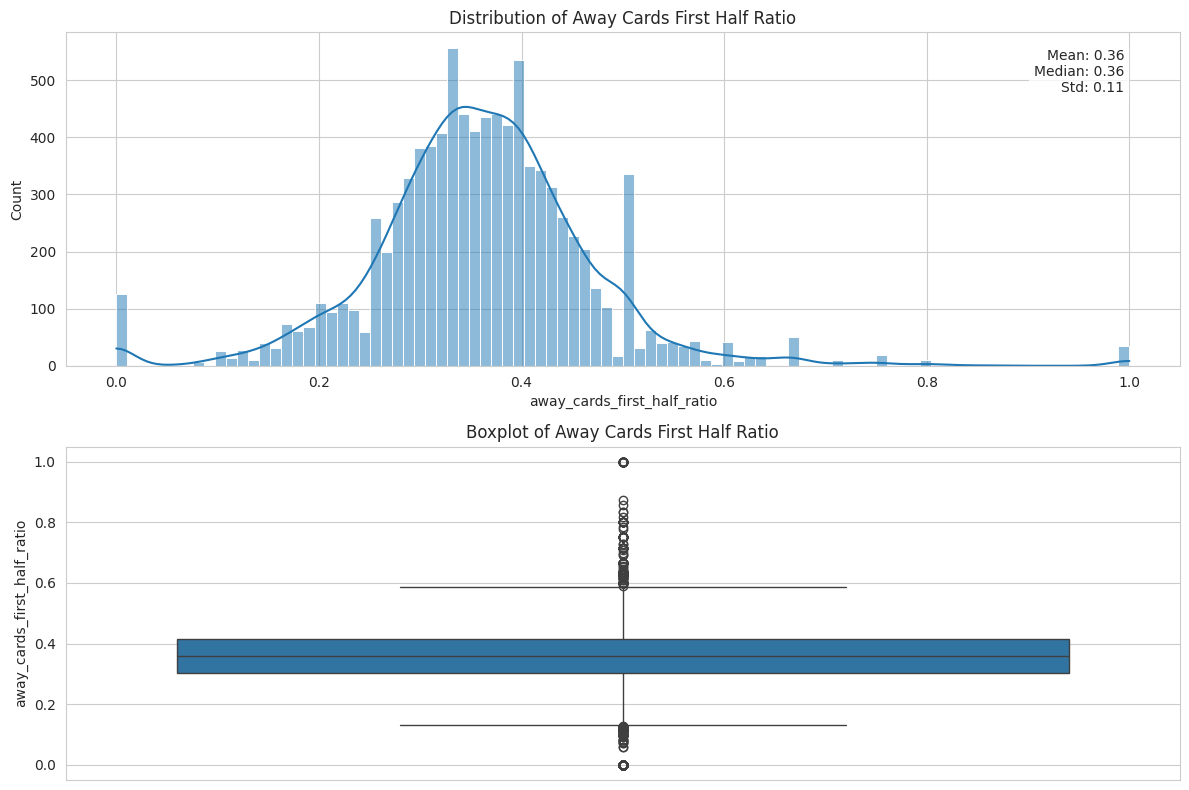


=== Analyzing Venue Specific ===
Number of features in this group: 8
Processing feature 1/8: home_venue_games


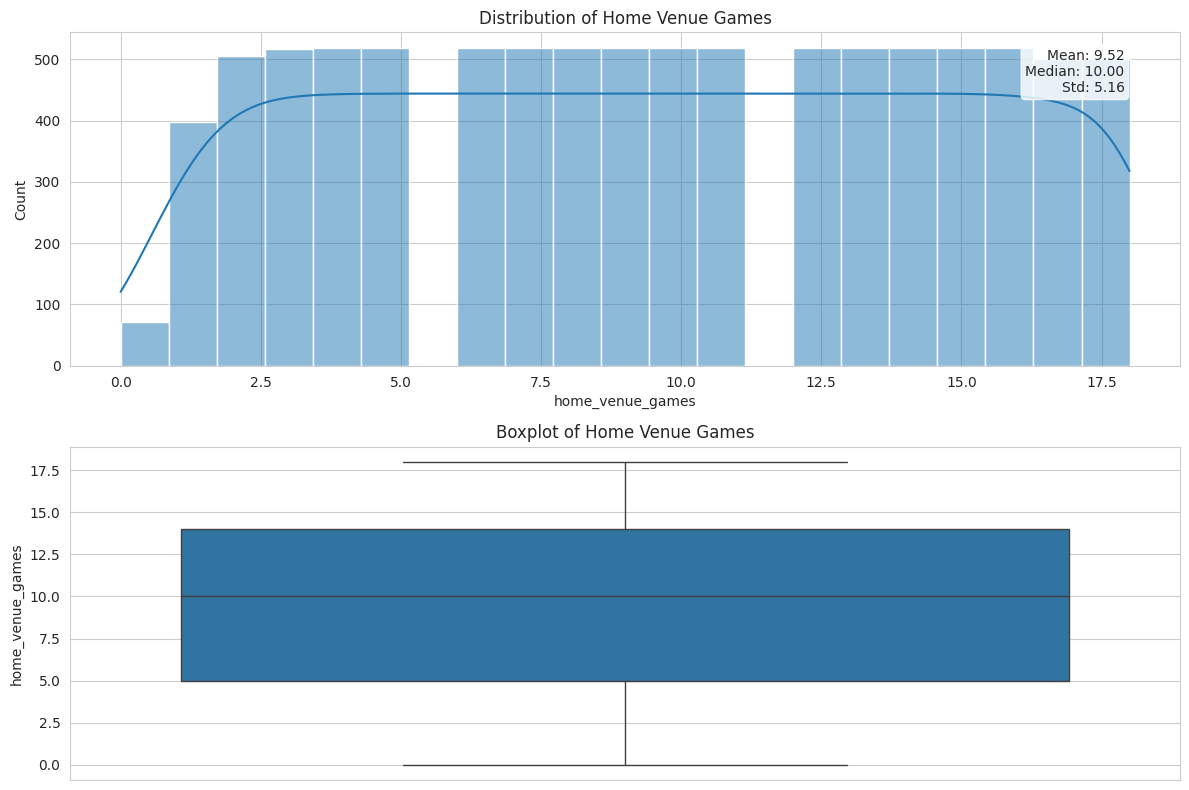

Processing feature 2/8: home_venue_win_ratio


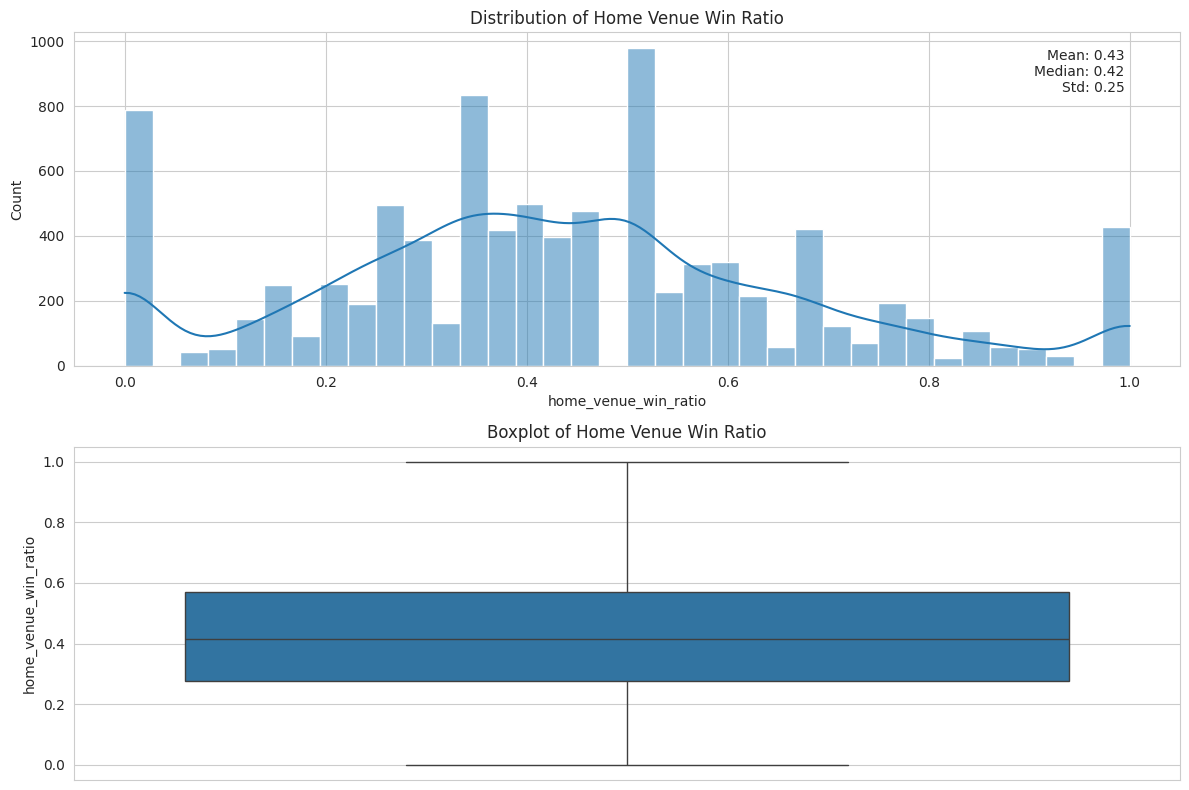

Processing feature 3/8: home_venue_goals_avg


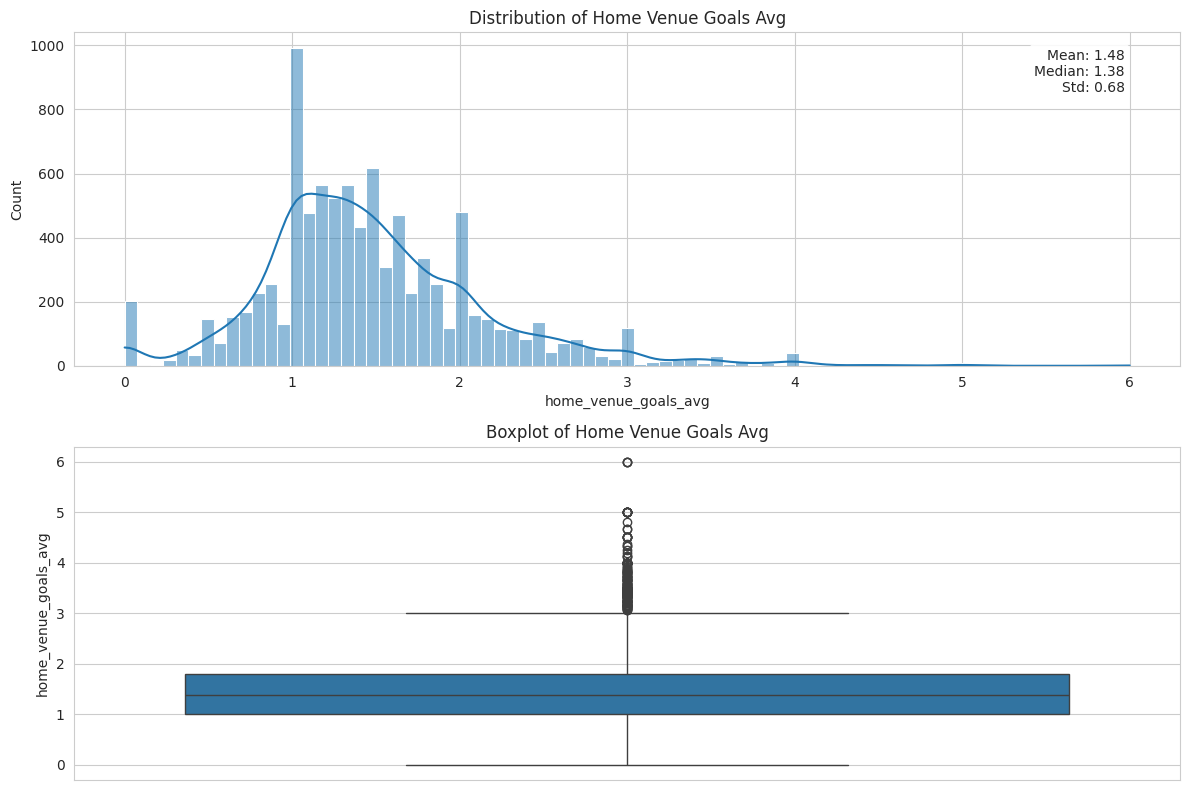

Processing feature 4/8: home_venue_conceded_avg


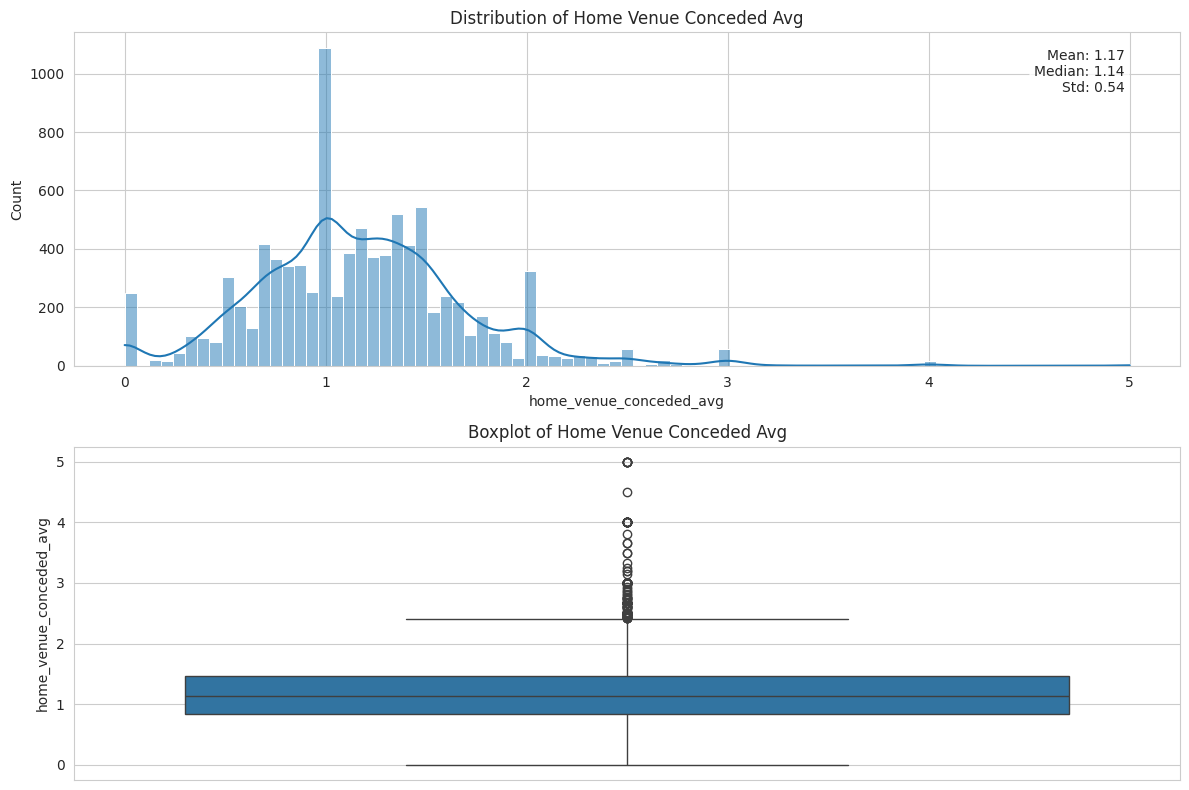

Processing feature 5/8: away_venue_games


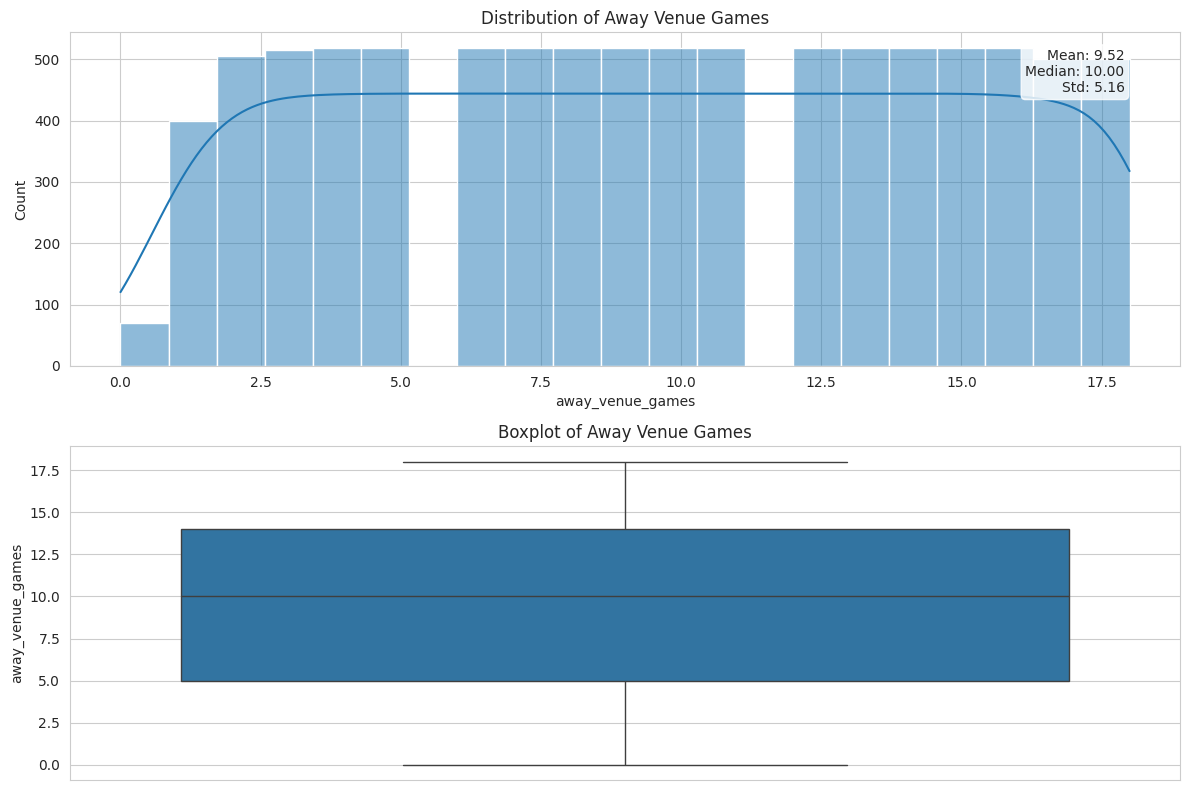

Processing feature 6/8: away_venue_win_ratio


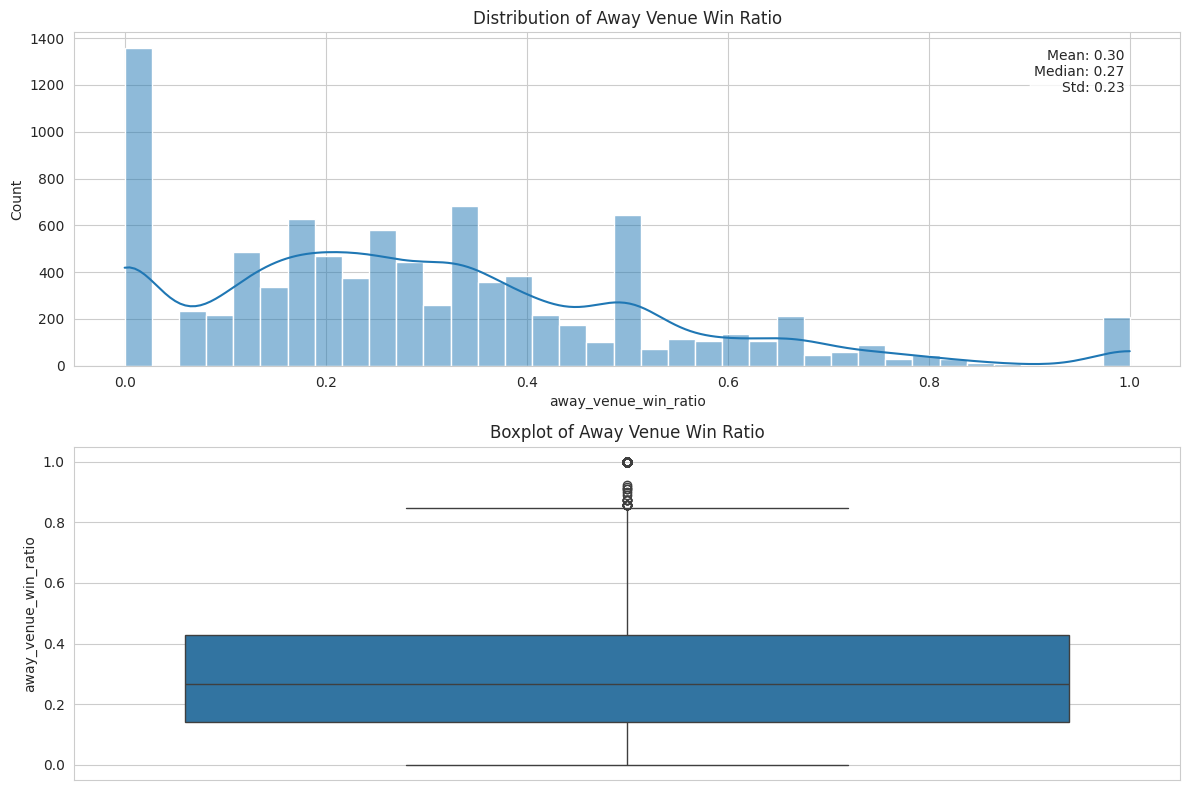

Processing feature 7/8: away_venue_goals_avg


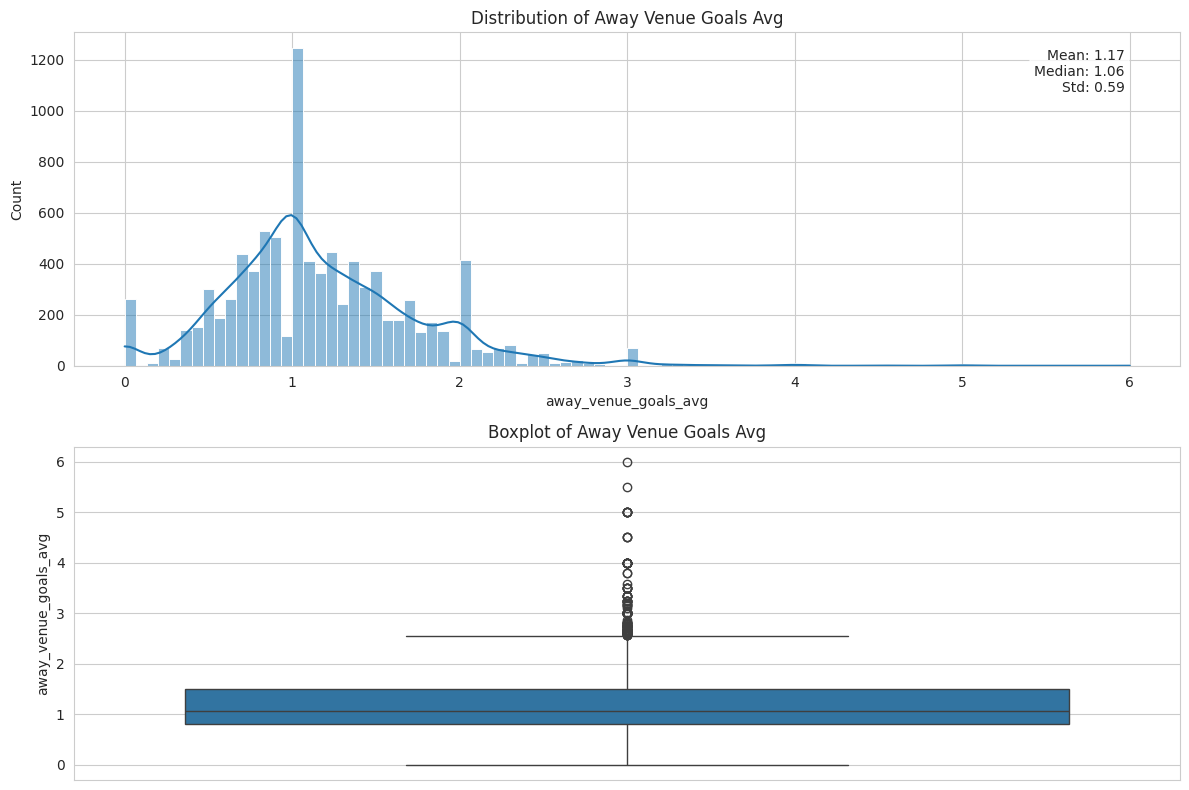

Processing feature 8/8: away_venue_conceded_avg


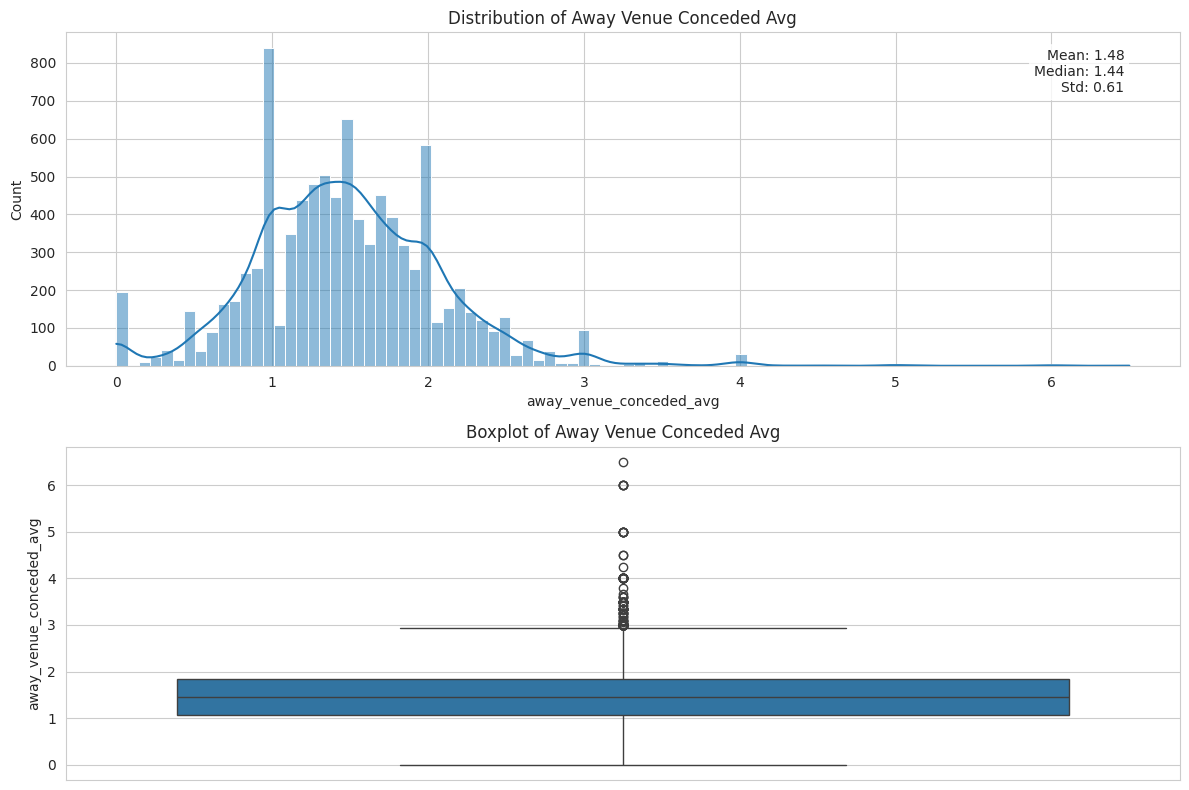


=== Analyzing Form Indicators ===
Number of features in this group: 30
Processing feature 1/30: home_goals_scored_first_half_ratio


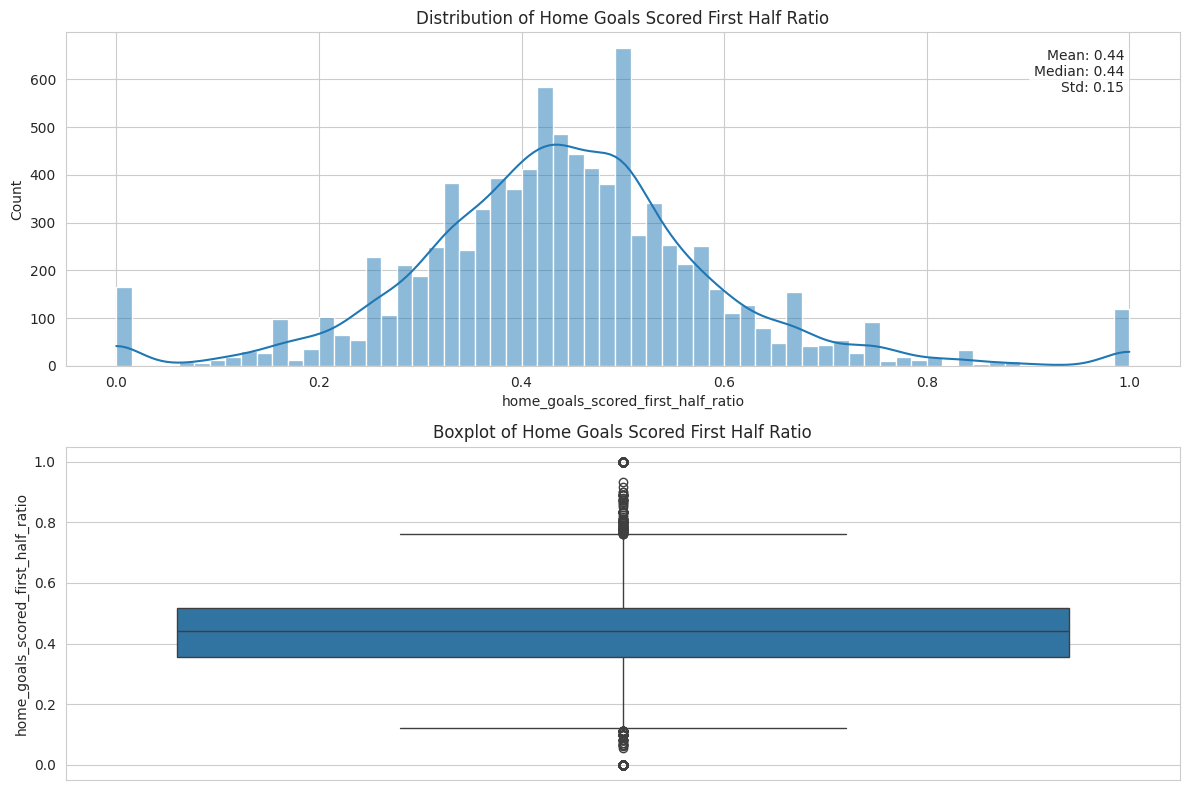

Processing feature 2/30: home_goals_conceded_first_half_ratio


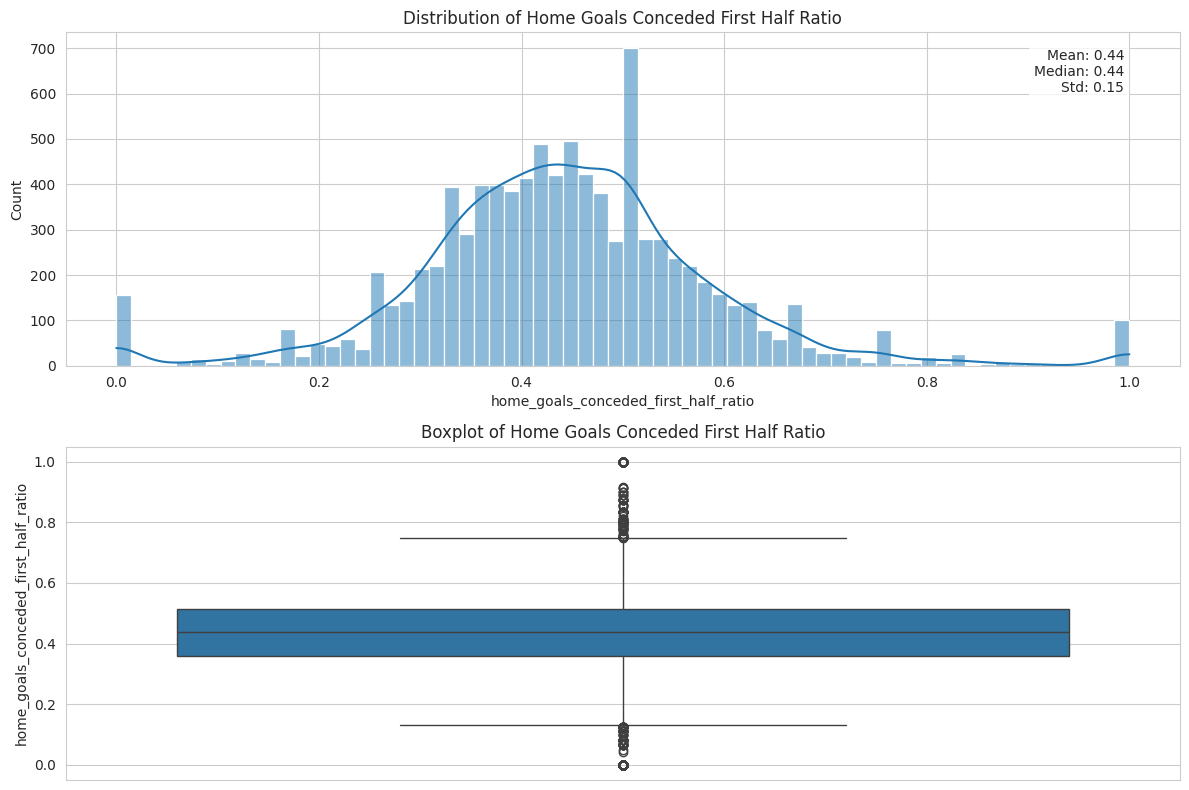

Processing feature 3/30: home_recent_goals_scored


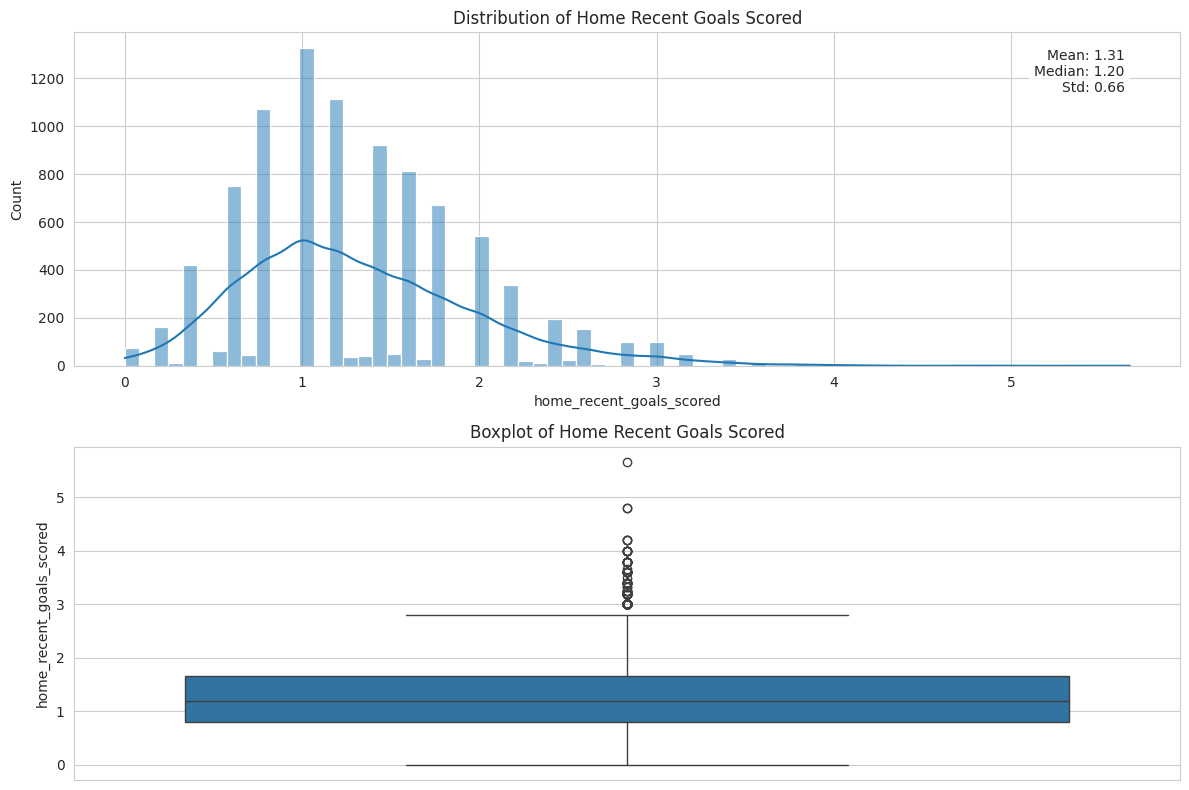

Processing feature 4/30: home_recent_goals_conceded


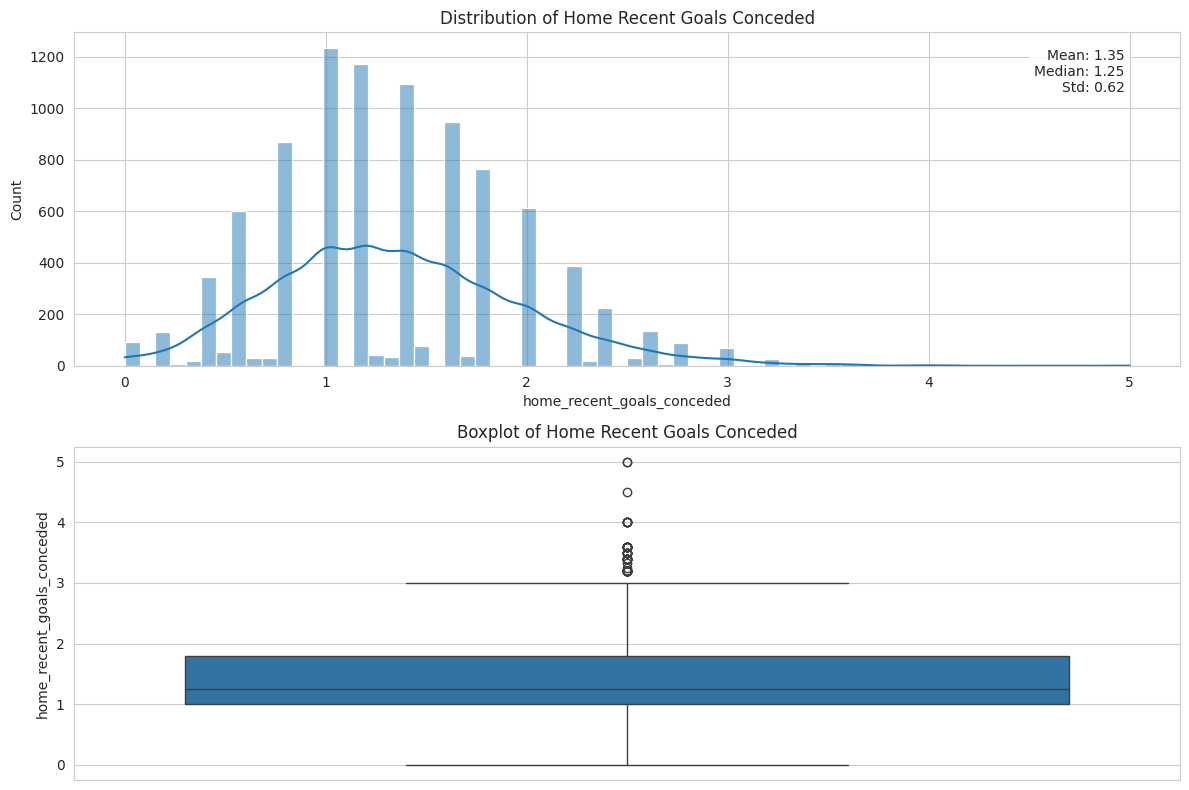

Processing feature 5/30: home_recent_points_per_game


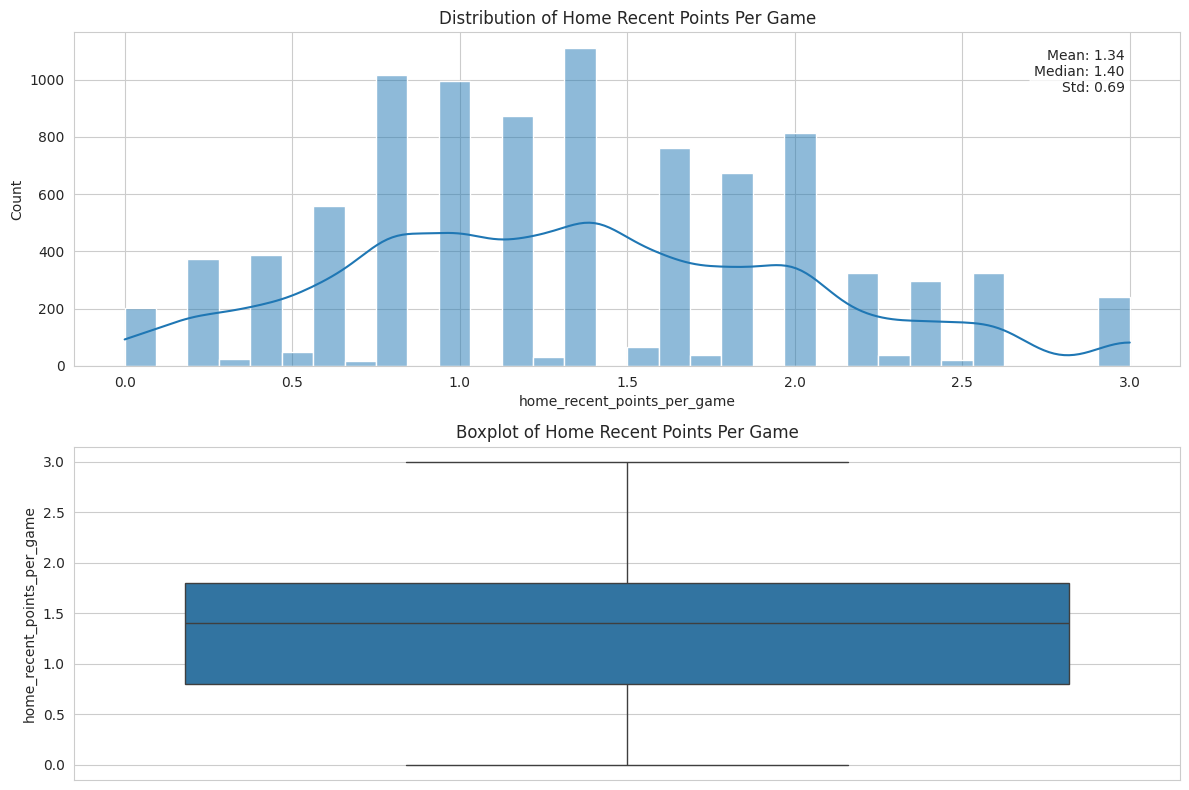

Processing feature 6/30: home_recent_clean_sheets


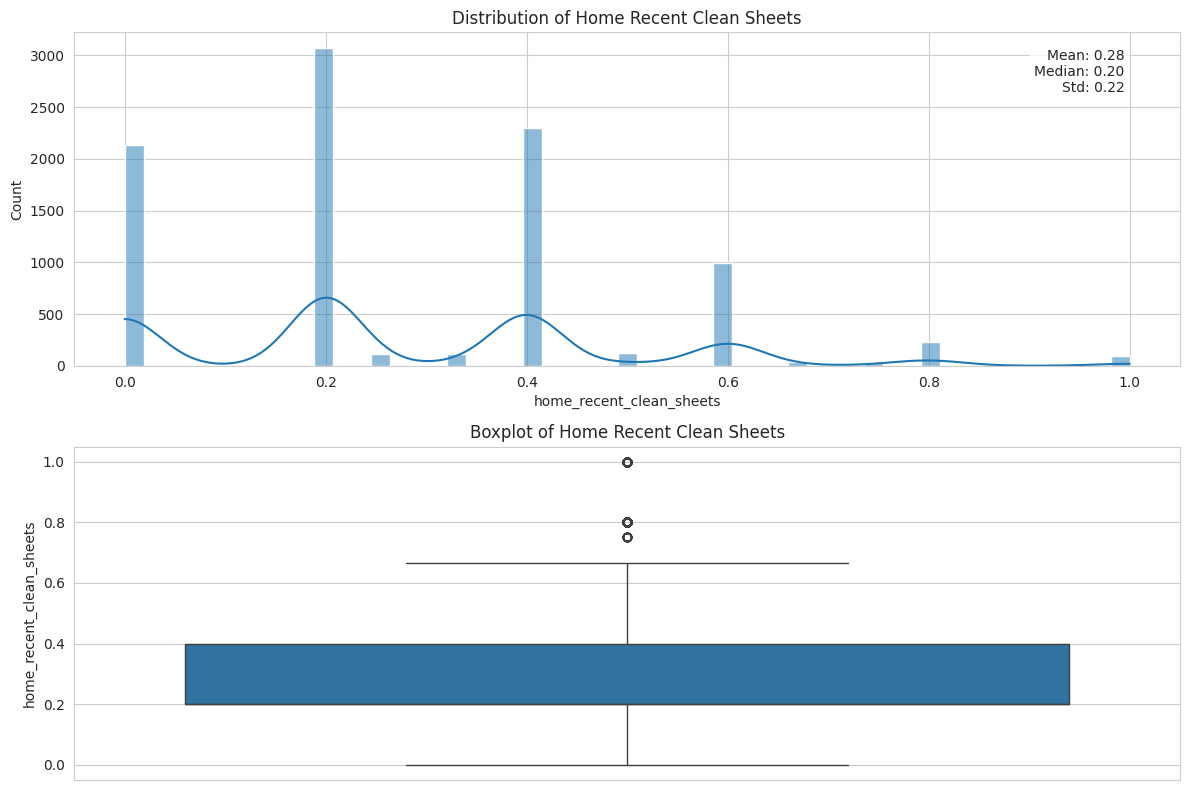

Processing feature 7/30: home_shots_on_target_ratio


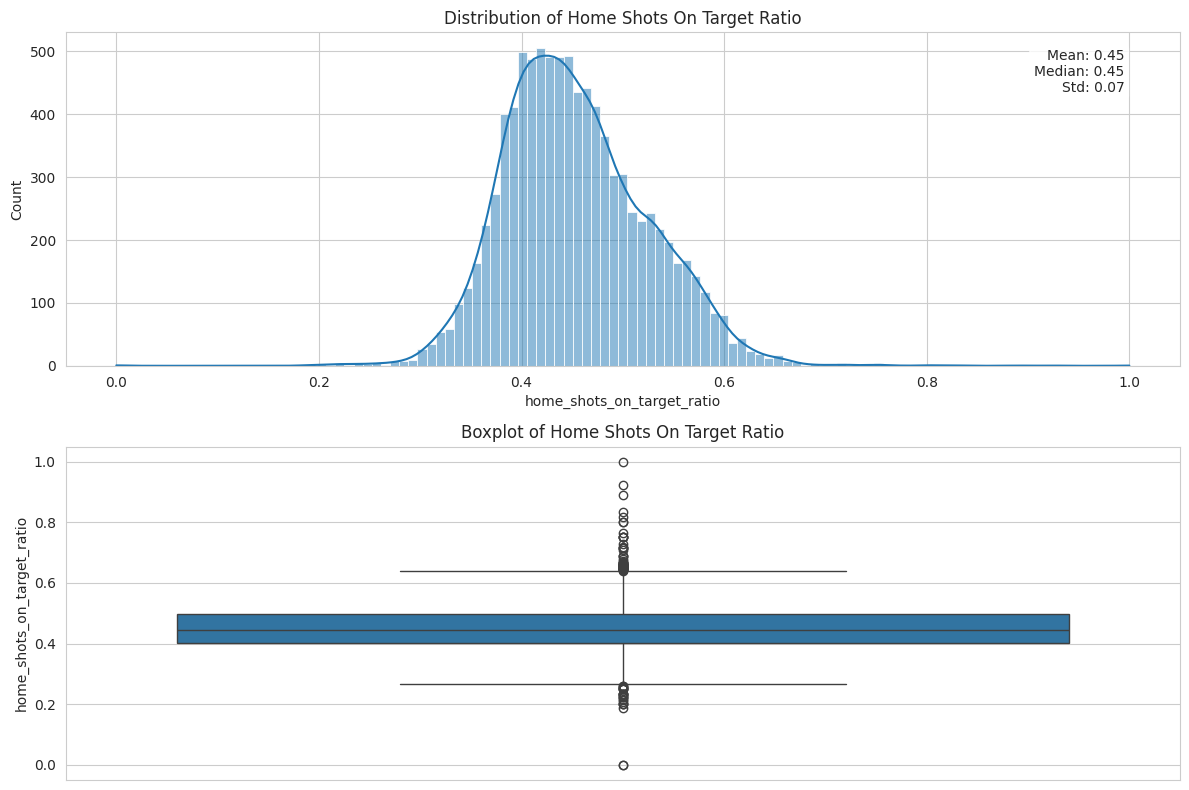

Processing feature 8/30: home_possession_efficiency


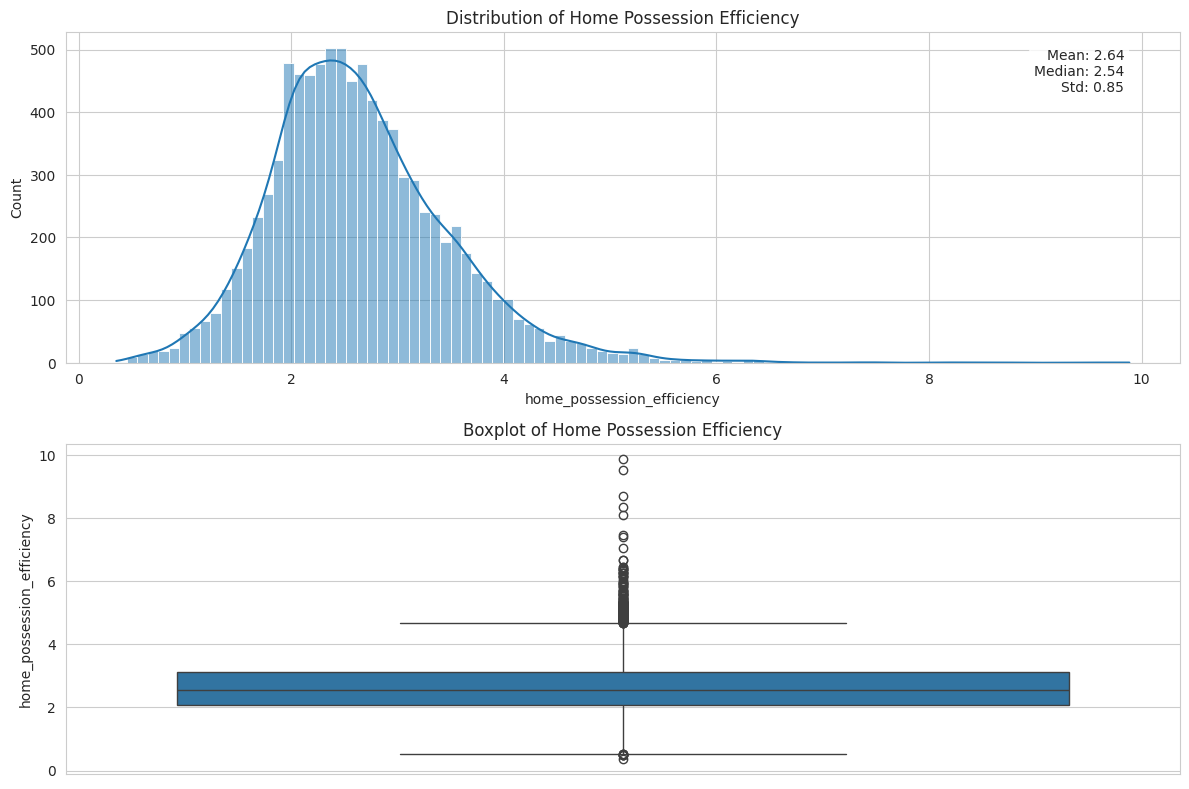

Processing feature 9/30: home_corner_efficiency


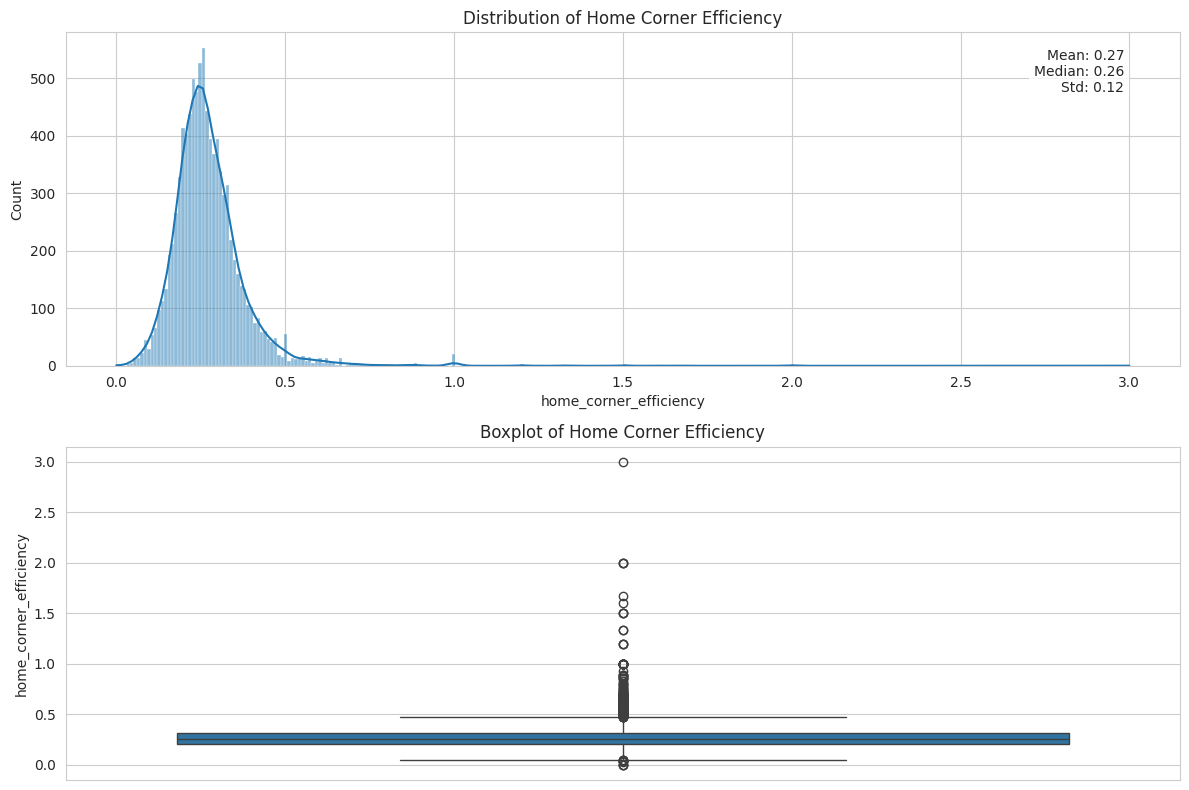

Processing feature 10/30: home_cards_first_half_ratio


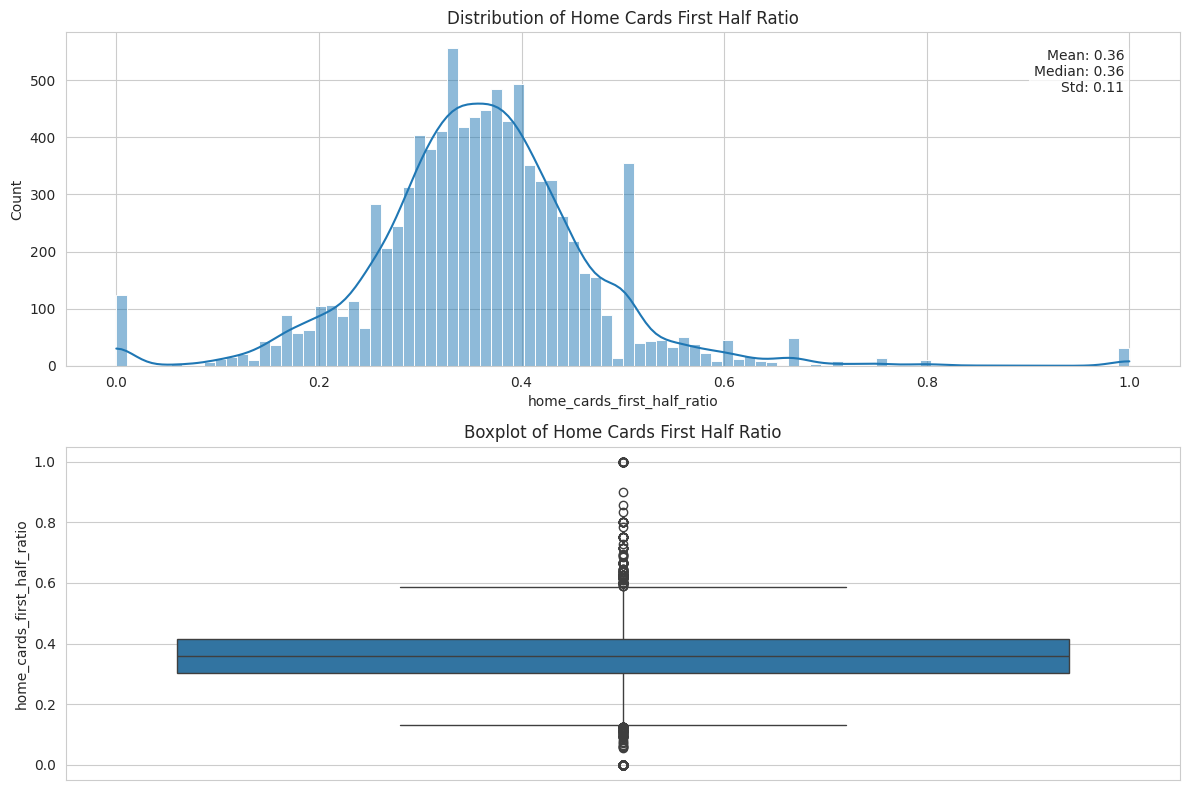

Processing feature 11/30: home_venue_win_ratio


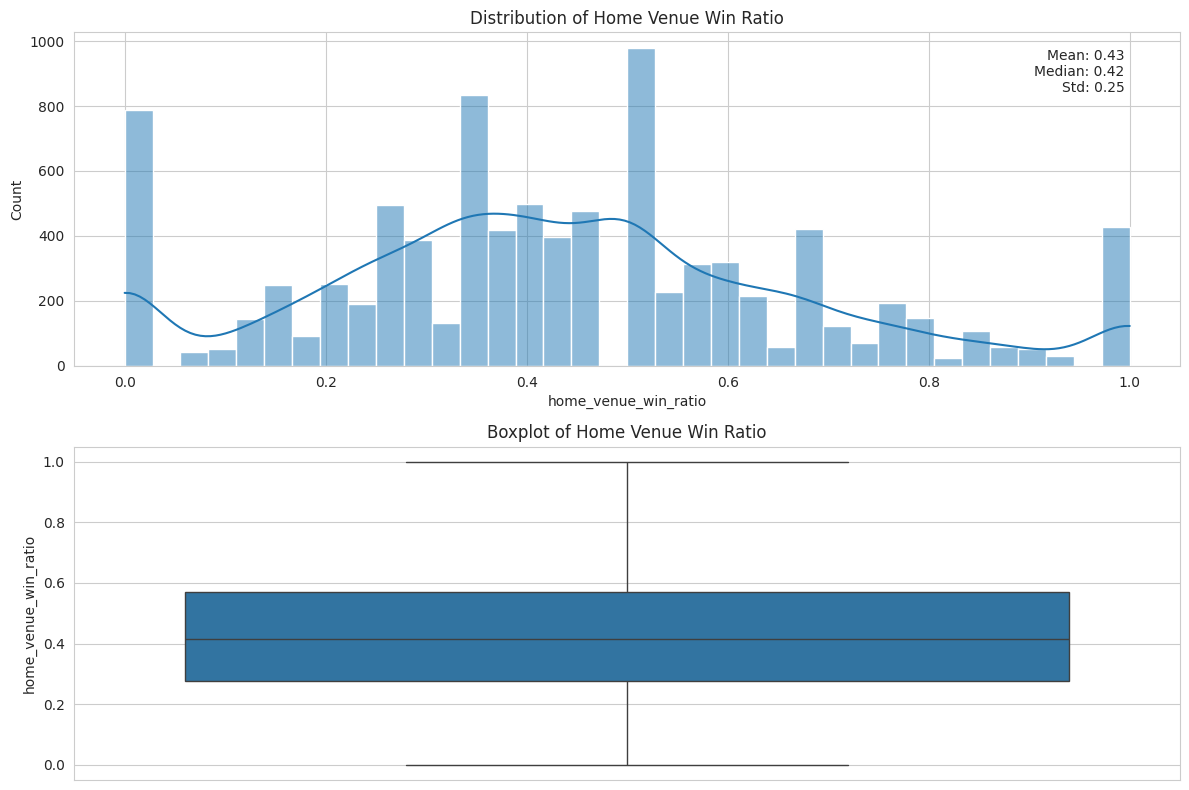

Processing feature 12/30: home_clean_sheets_ratio


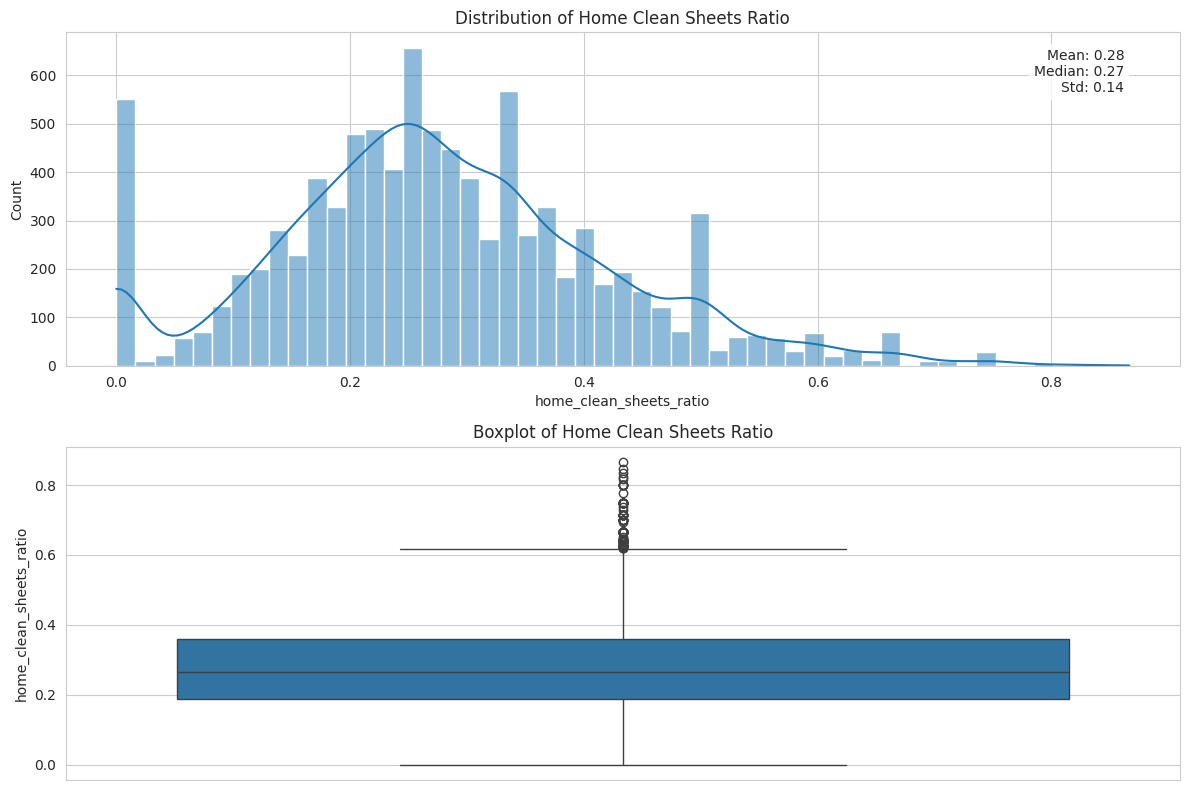

Processing feature 13/30: home_scoring_ratio


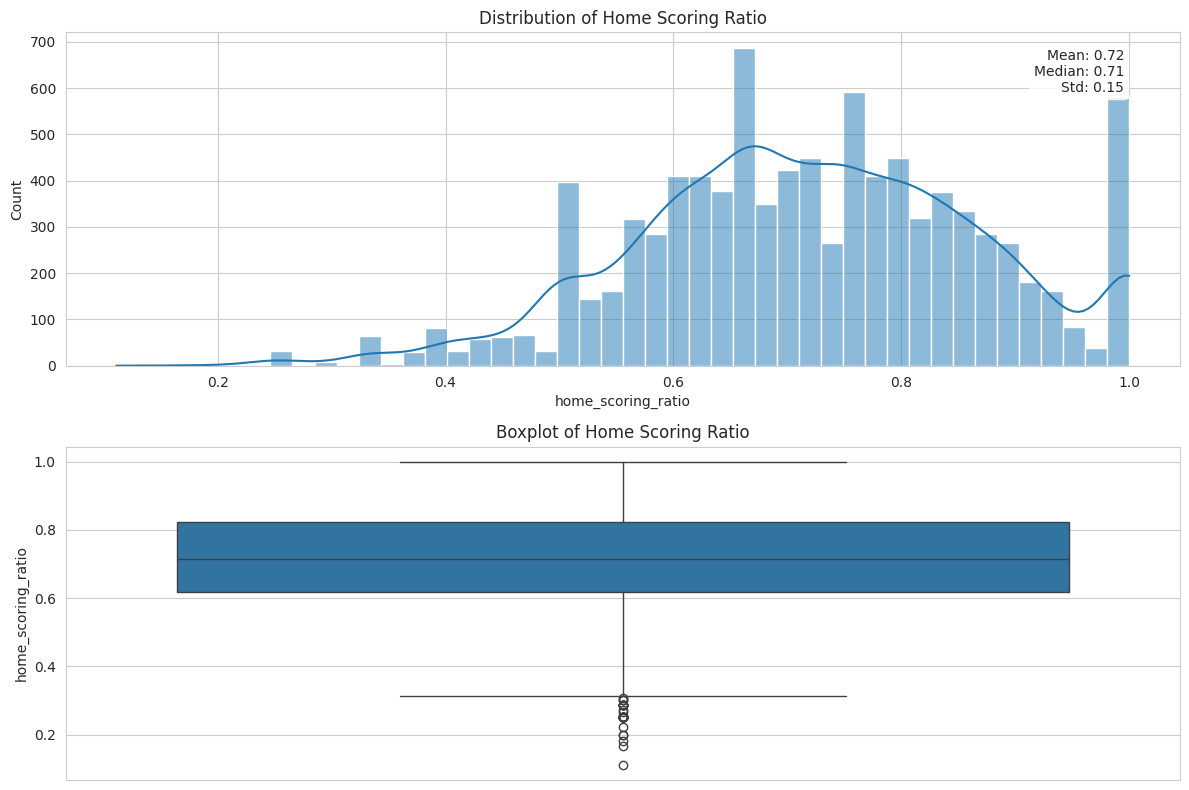

Processing feature 14/30: home_comeback_ratio


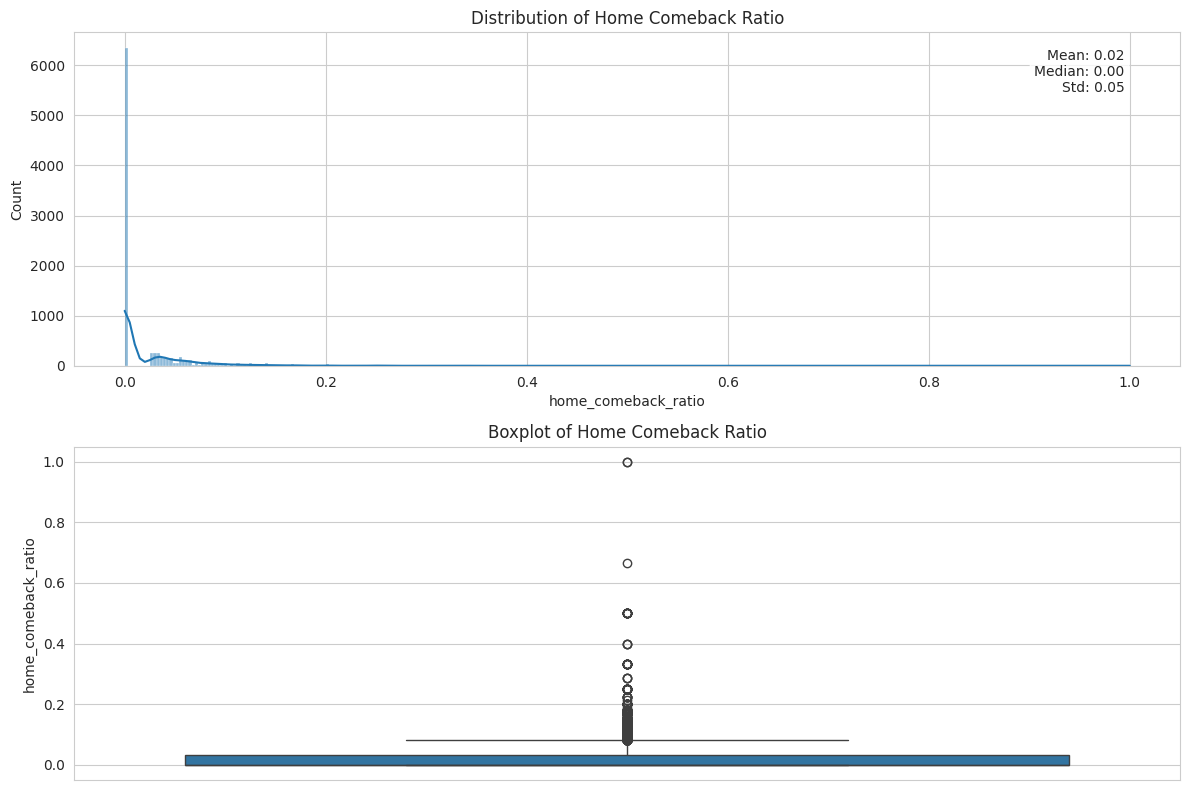

Processing feature 15/30: home_lead_loss_ratio


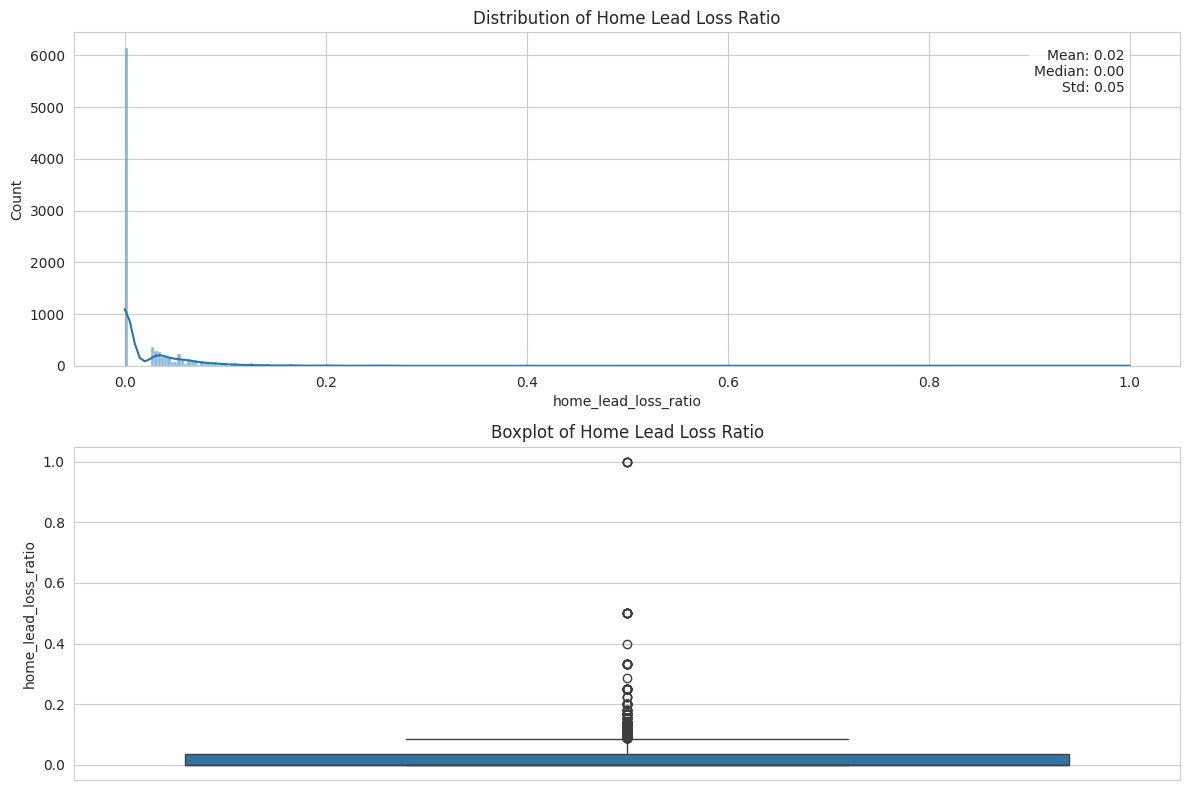

Processing feature 16/30: away_goals_scored_first_half_ratio


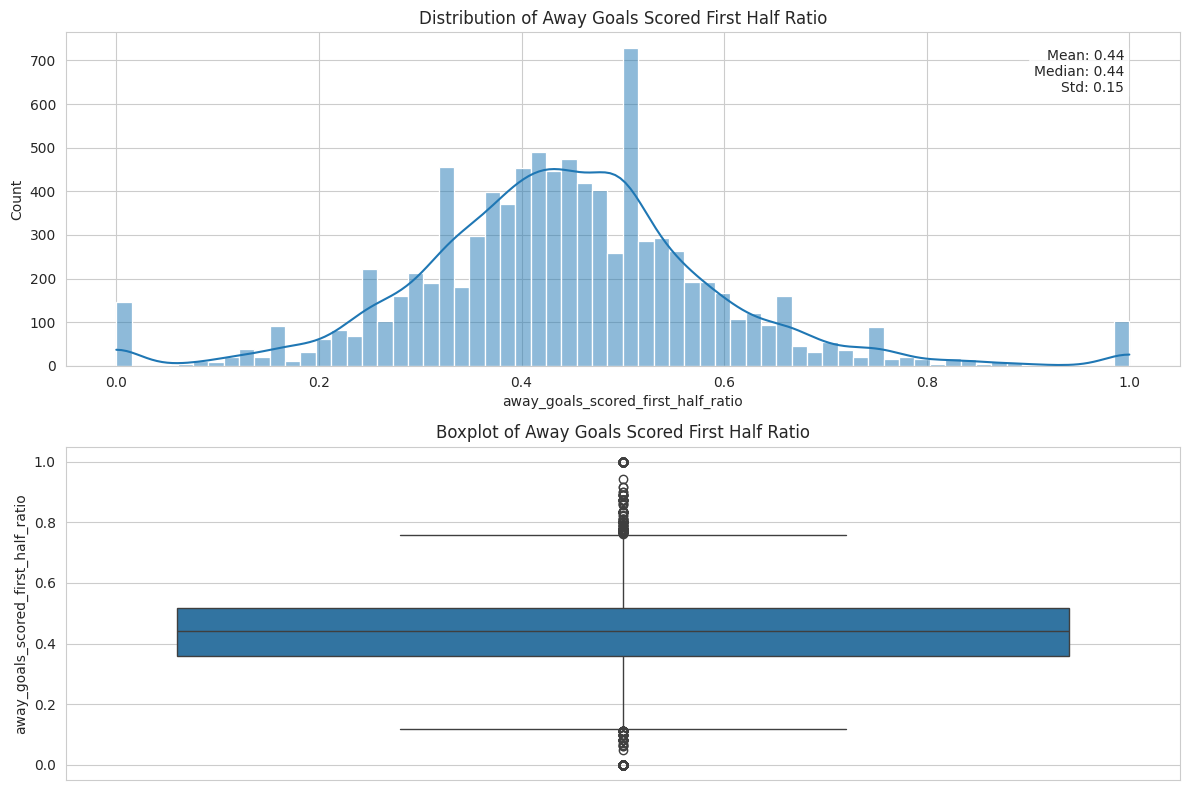

Processing feature 17/30: away_goals_conceded_first_half_ratio


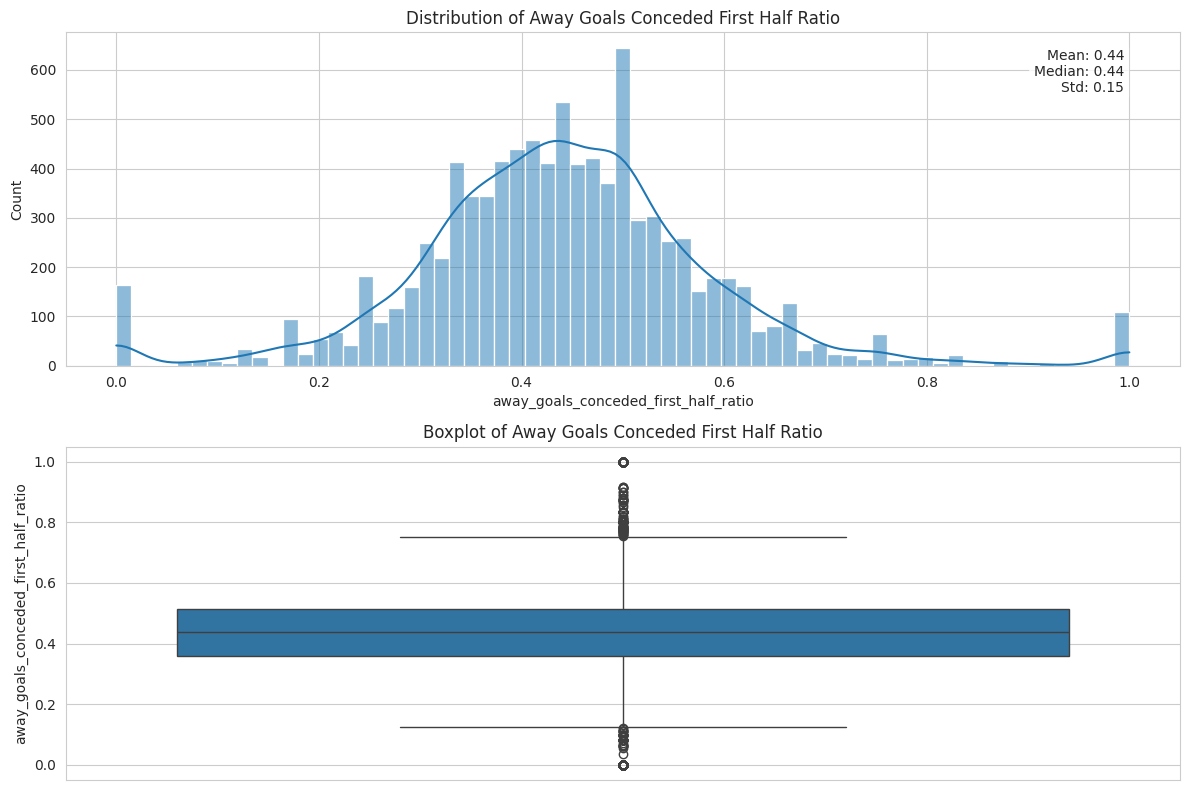

Processing feature 18/30: away_recent_goals_scored


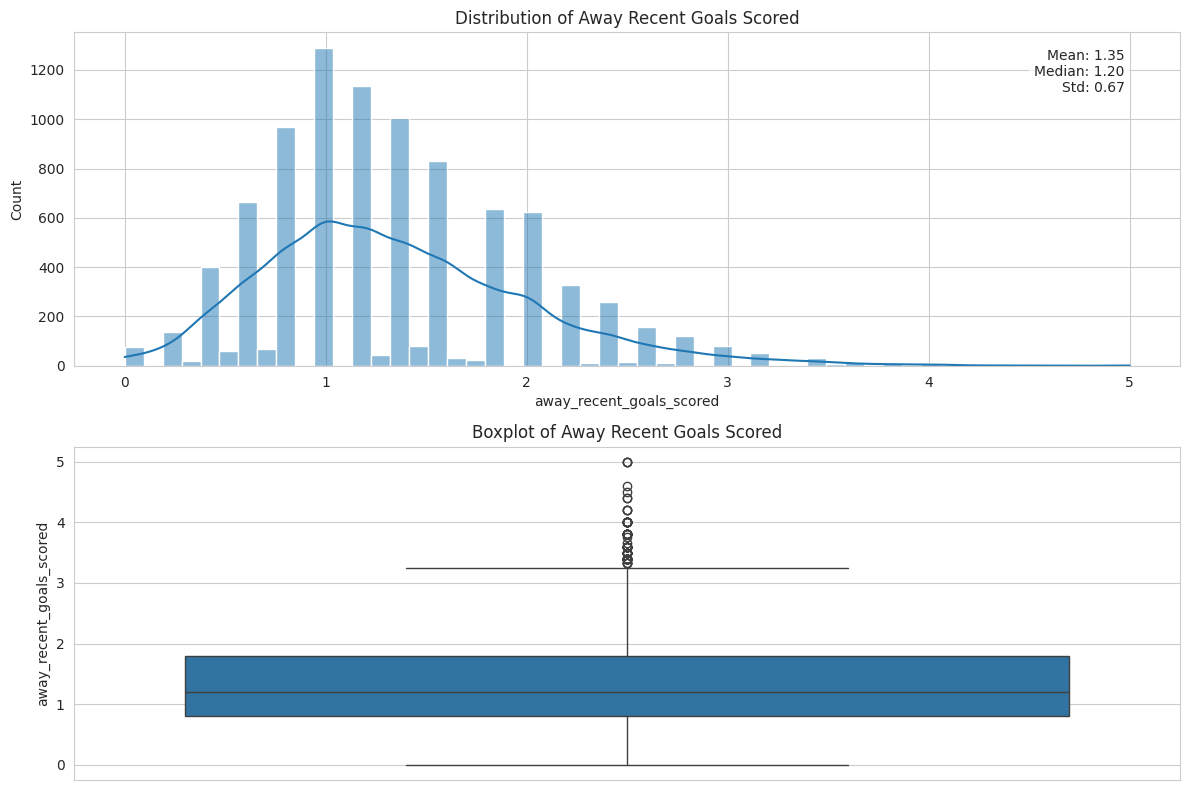

Processing feature 19/30: away_recent_goals_conceded


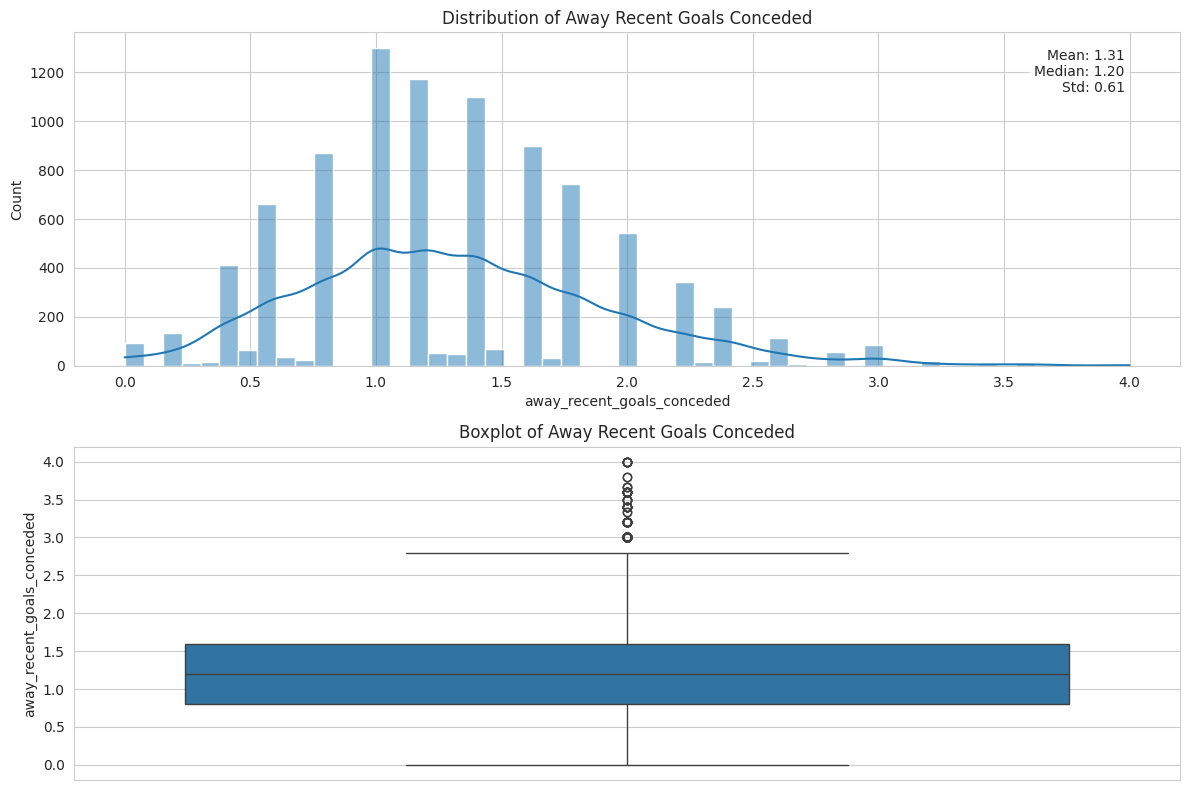

Processing feature 20/30: away_recent_points_per_game


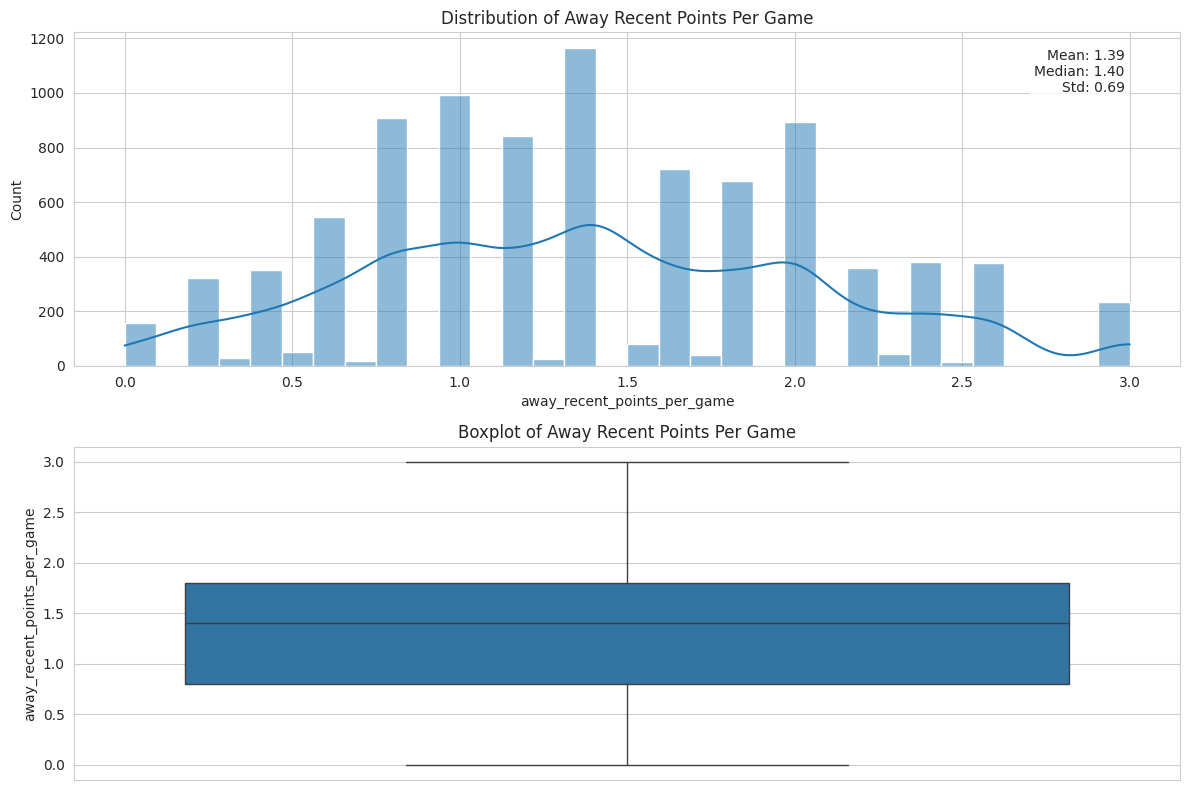

Processing feature 21/30: away_recent_clean_sheets


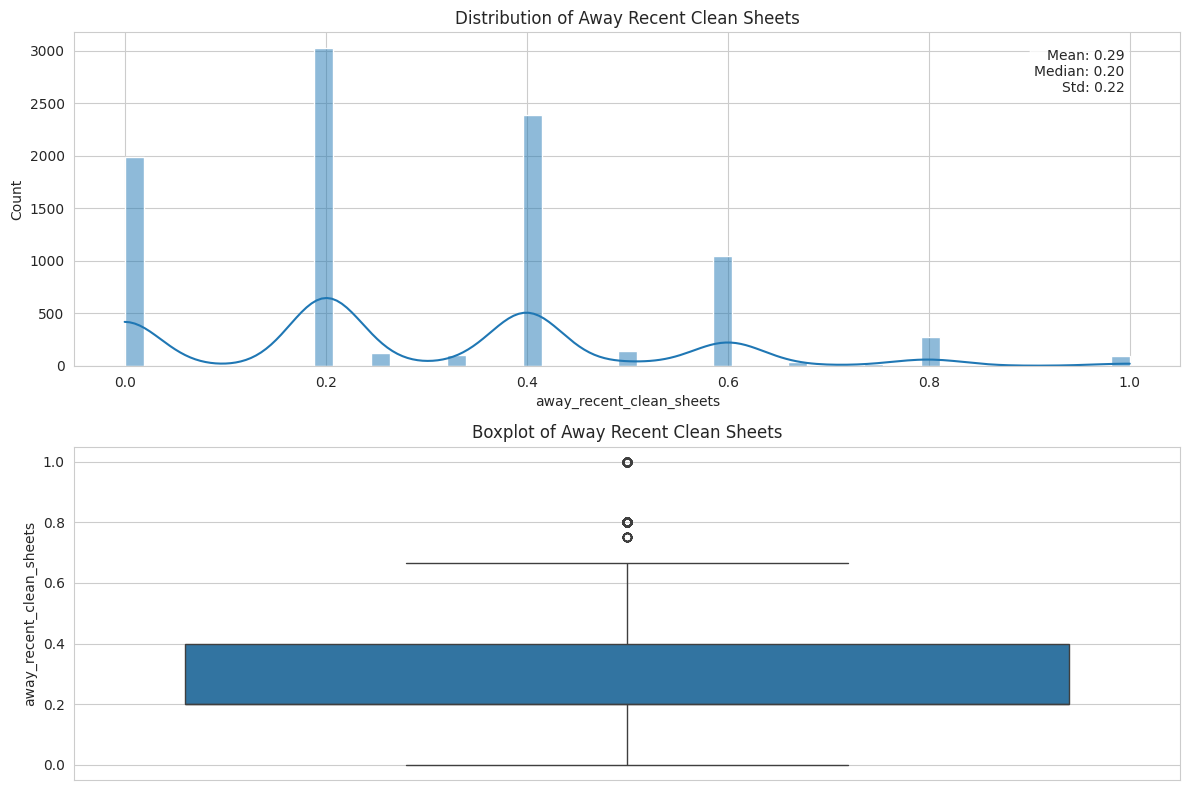

Processing feature 22/30: away_shots_on_target_ratio


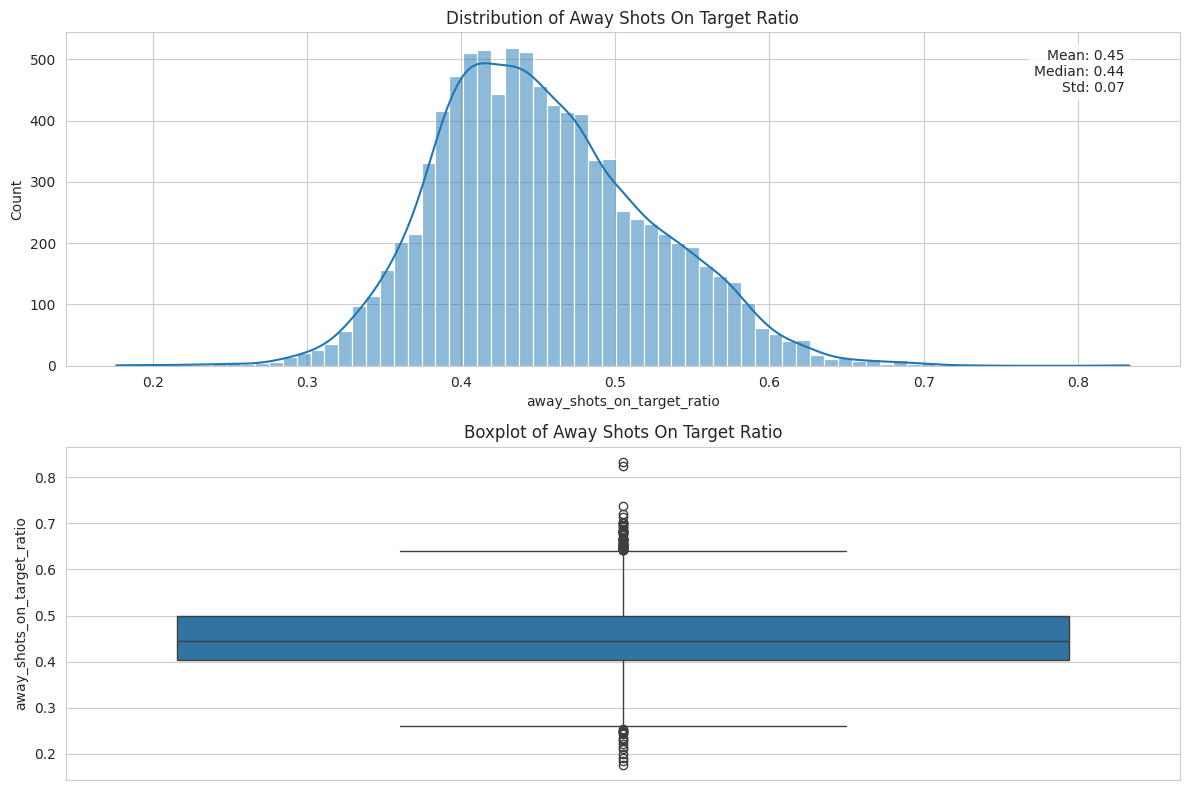

Processing feature 23/30: away_possession_efficiency


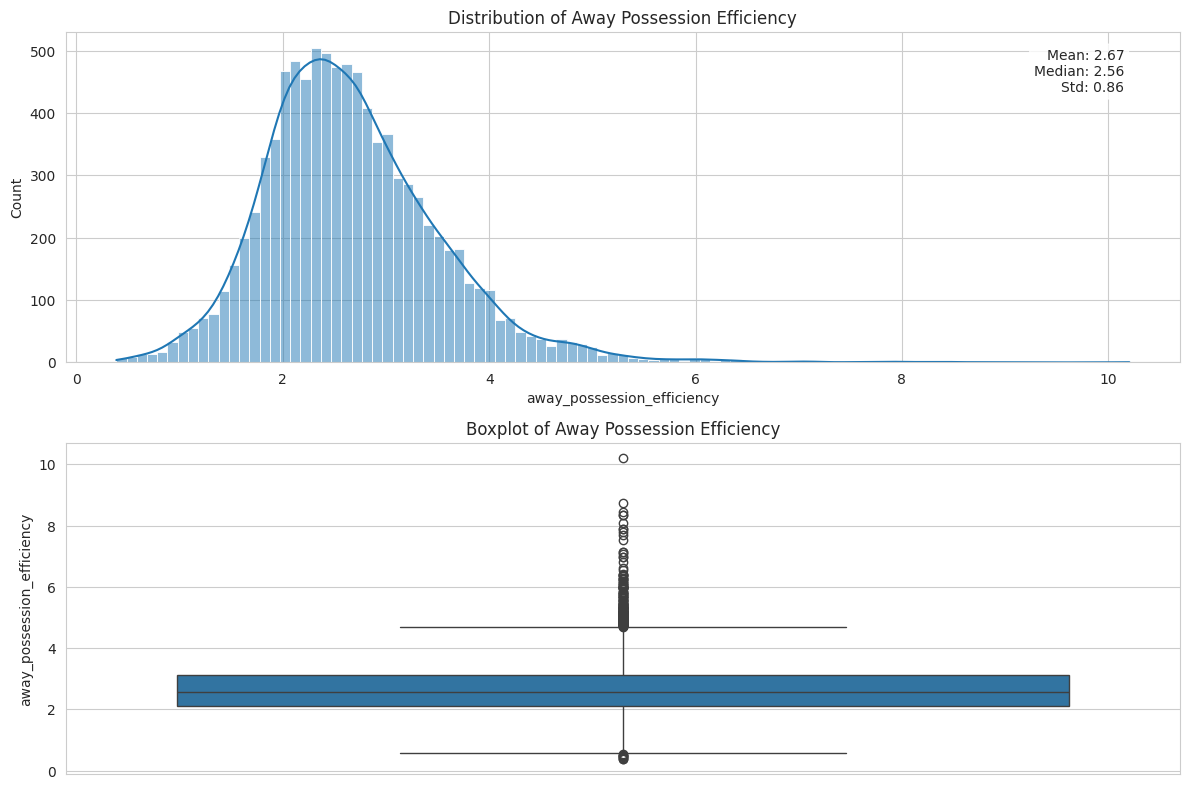

Processing feature 24/30: away_corner_efficiency


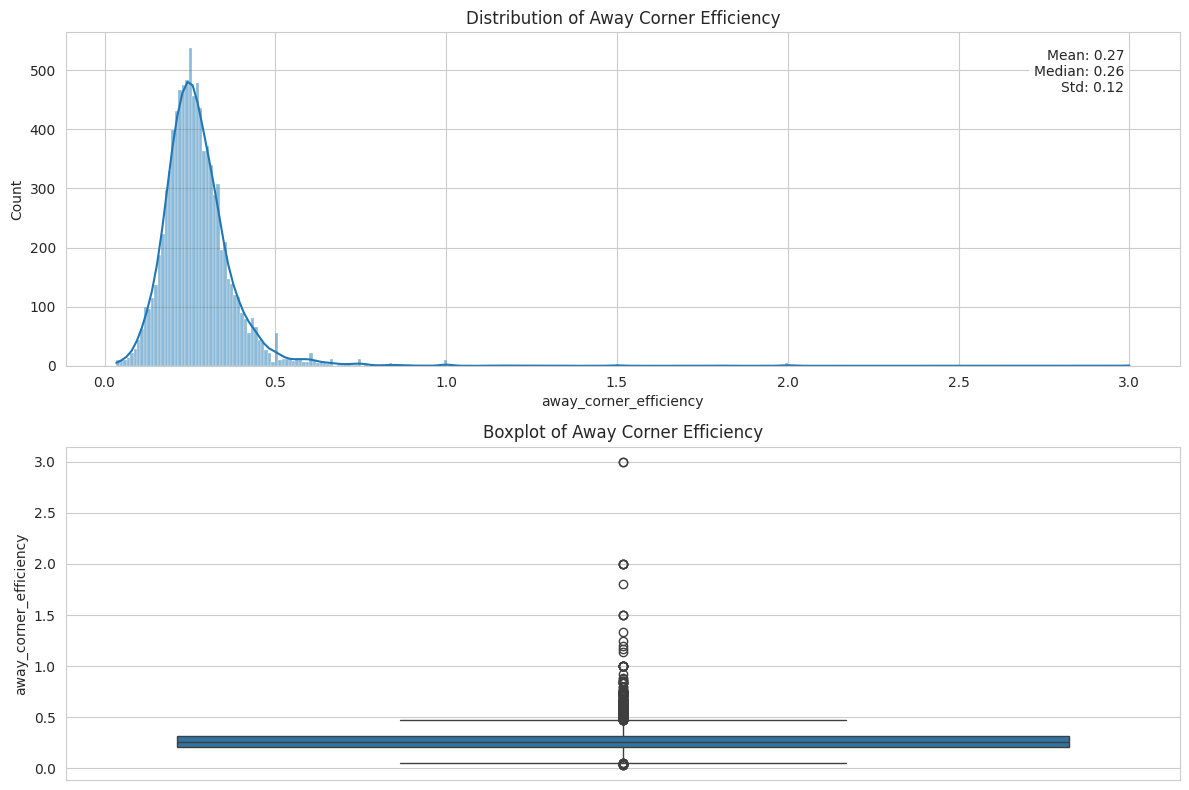

Processing feature 25/30: away_cards_first_half_ratio


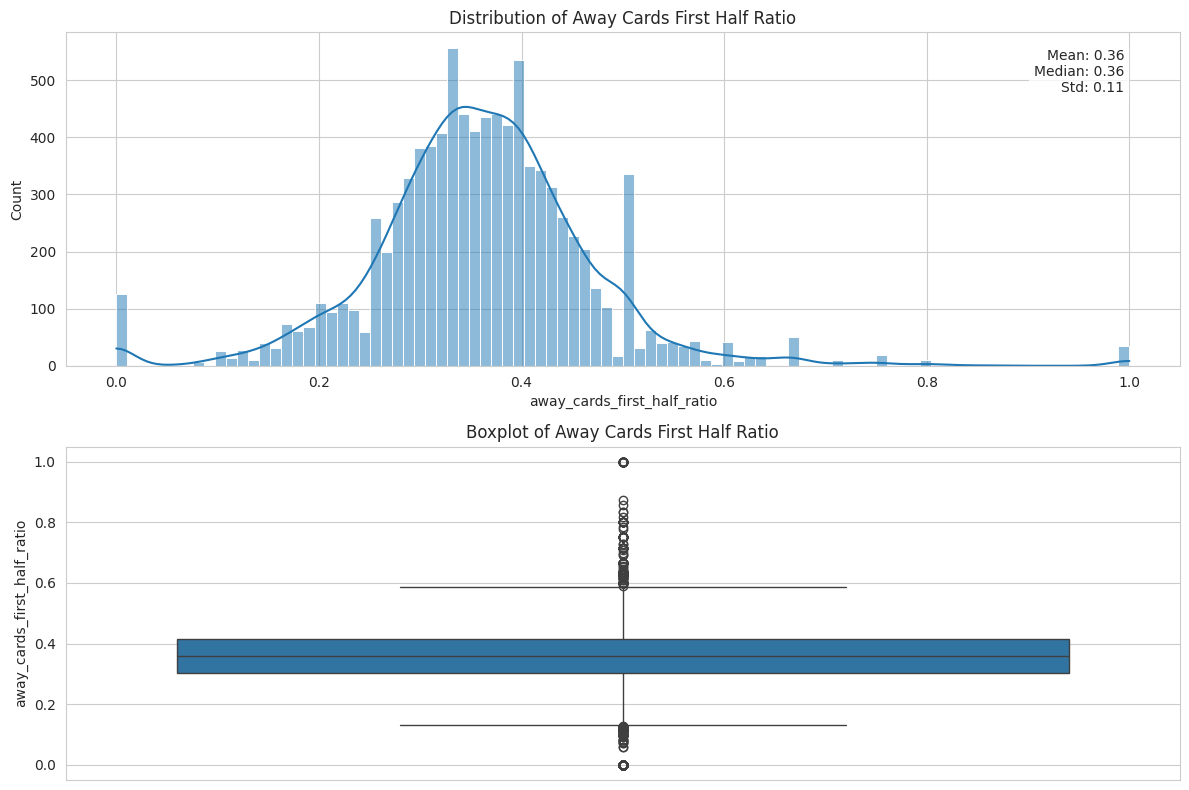

Processing feature 26/30: away_venue_win_ratio


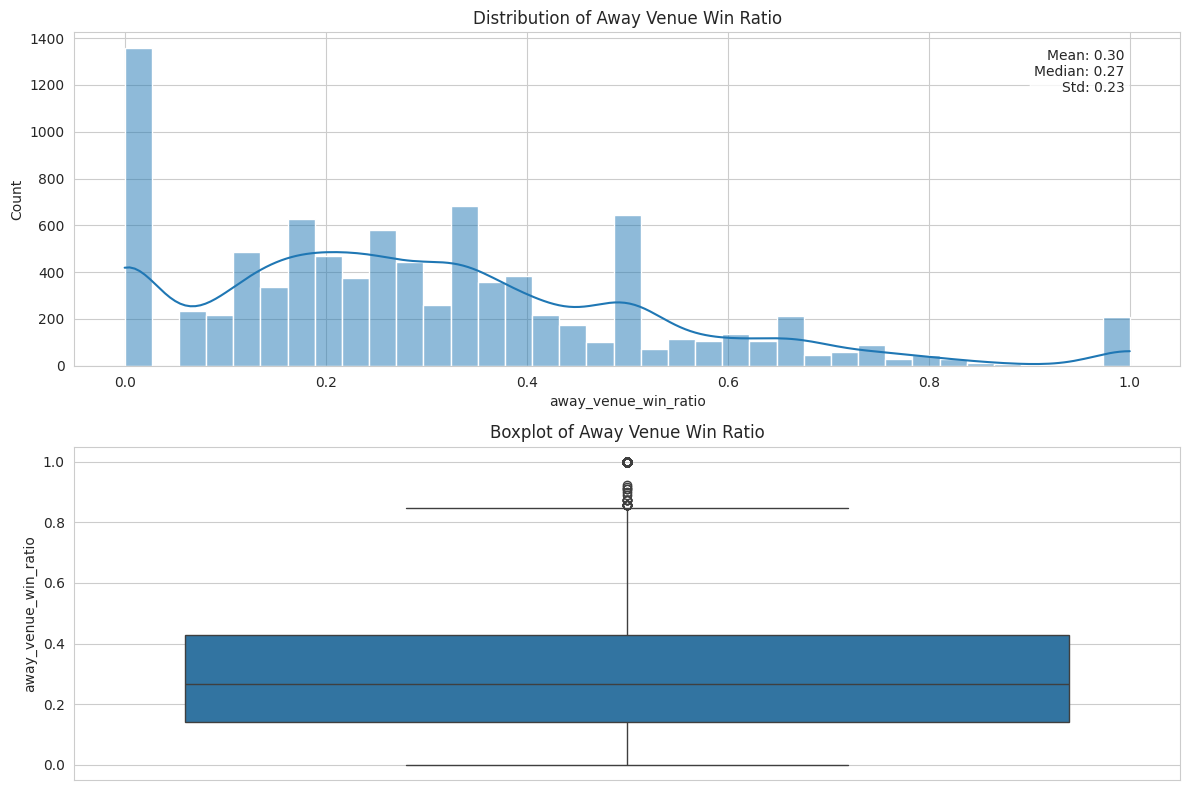

Processing feature 27/30: away_clean_sheets_ratio


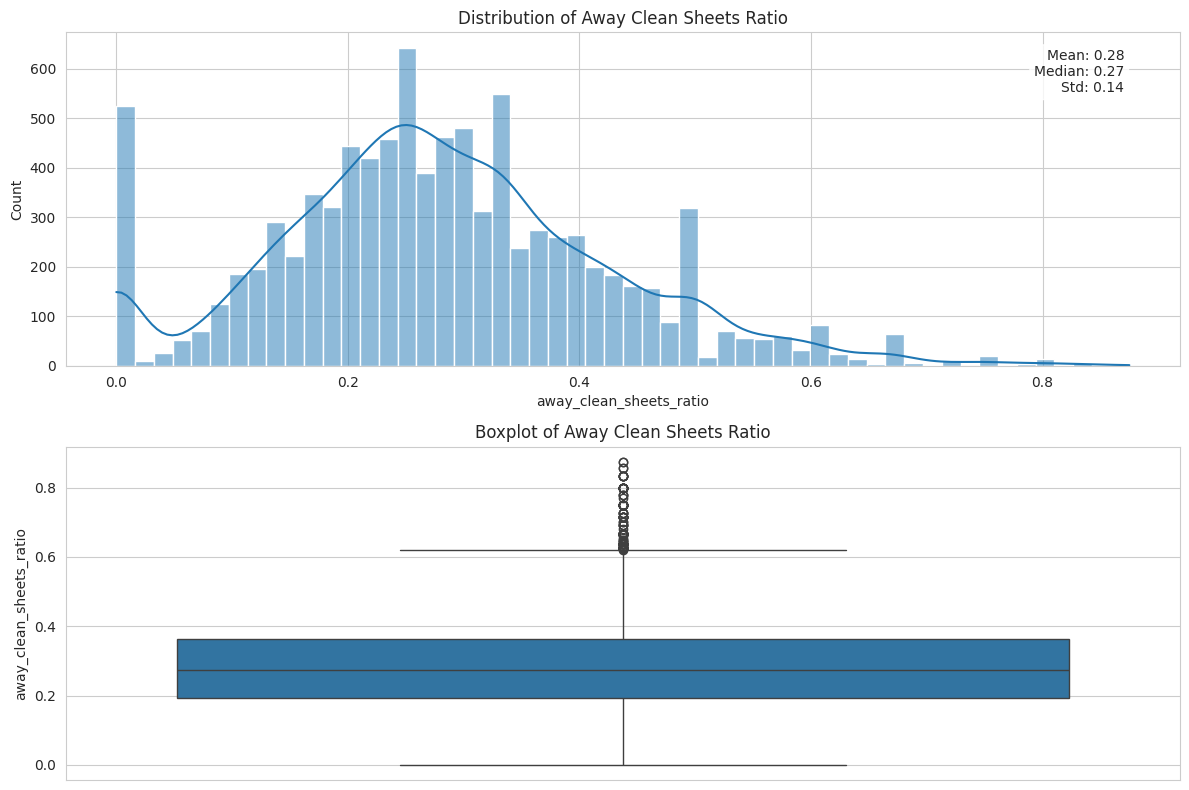

Processing feature 28/30: away_scoring_ratio


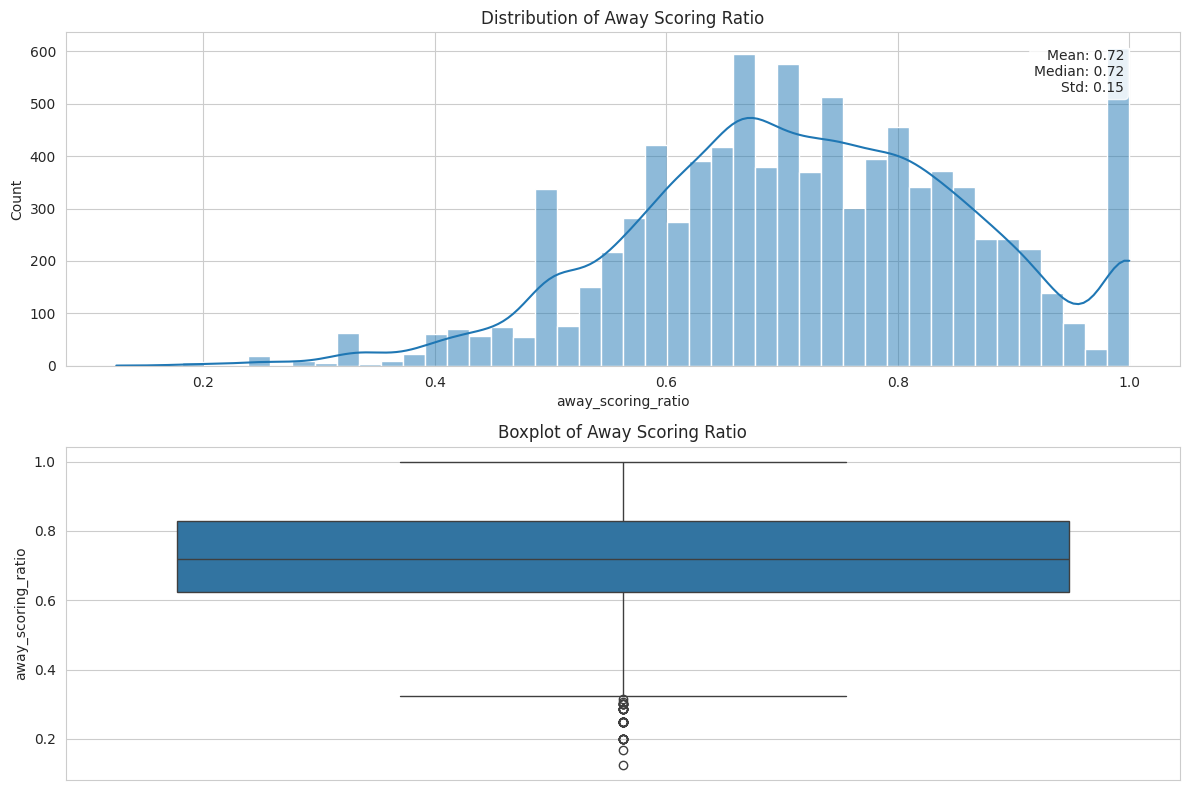

Processing feature 29/30: away_comeback_ratio


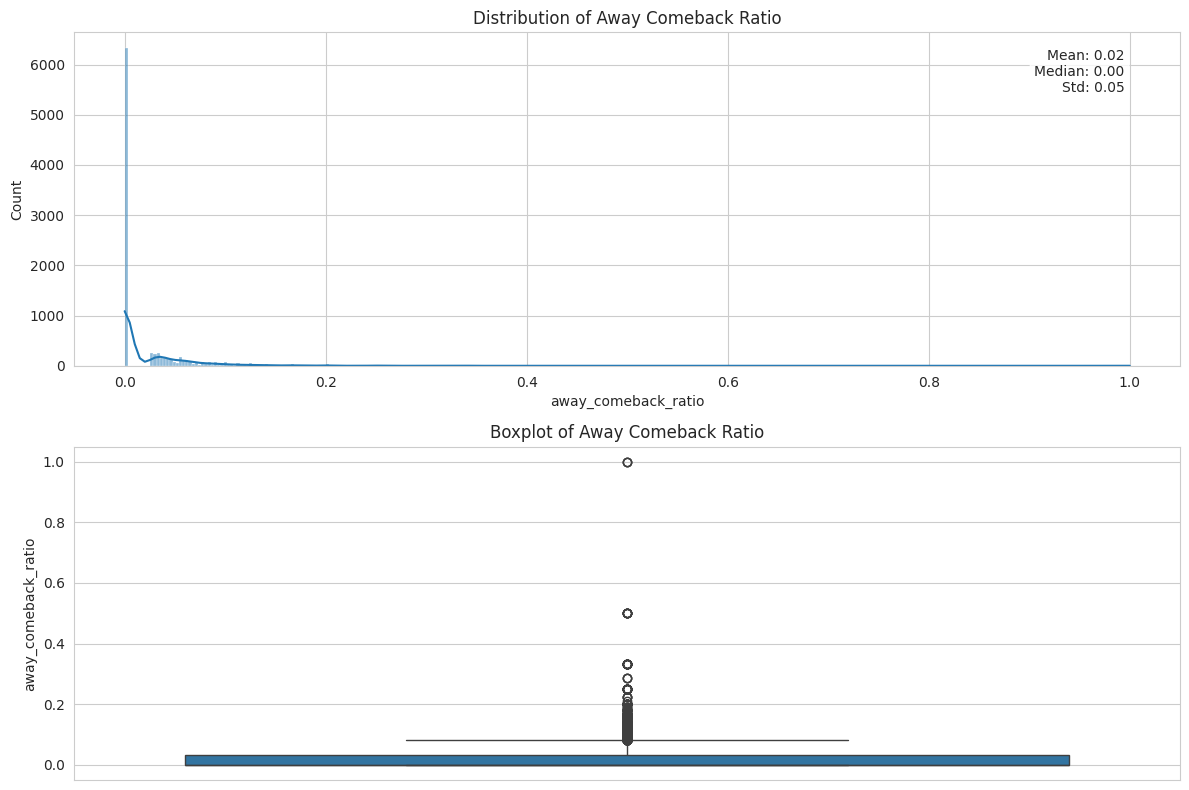

Processing feature 30/30: away_lead_loss_ratio


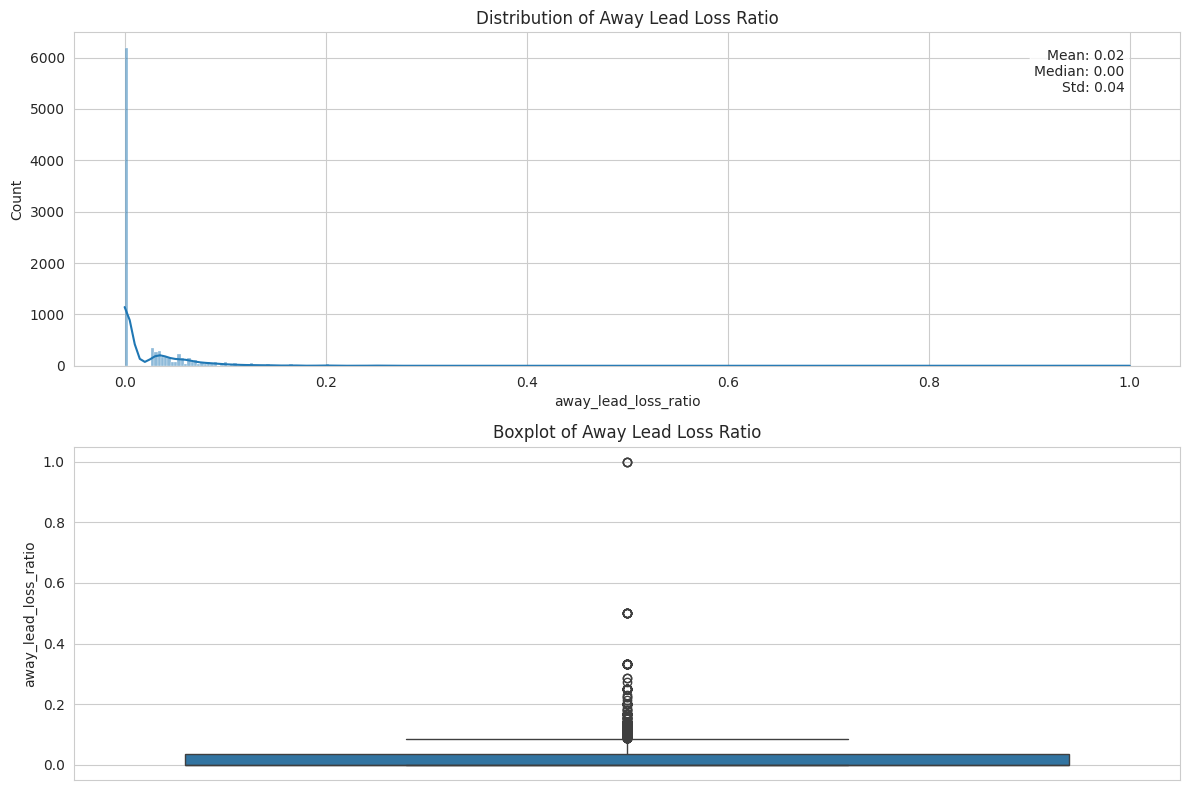


=== Summary Statistics for Numerical Features ===
       target_home_goals  target_away_goals  home_games_played    home_wins  \
count        9224.000000        9224.000000        9224.000000  9224.000000   
mean            1.490351           1.166847          19.544449     7.157741   
std             1.279330           1.157181          10.320295     5.233271   
min             0.000000           0.000000           1.000000     0.000000   
25%             1.000000           0.000000          11.000000     3.000000   
50%             1.000000           1.000000          20.000000     6.000000   
75%             2.000000           2.000000          28.000000    10.000000   
max             9.000000           9.000000          37.000000    30.000000   

        home_draws  home_losses  home_points_per_game  home_avg_goals_scored  \
count  9224.000000  9224.000000           9224.000000            9224.000000   
mean      5.160776     7.225932              1.356557               1.330668 

In [19]:
analyze_dataset(data)